In [161]:
%load_ext autoreload 
%autoreload 2
import cv2
import json, os, cv2
from pathlib import Path
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np
import xarray as xr
import seaborn as sns
import h5py as hf
from tqdm import tqdm
from tqdm import tqdm
import itertools 
from scipy.interpolate import interp1d
from scipy import signal
from matplotlib.backends.backend_pdf import PdfPages
from sklearn.cluster import KMeans
import matplotlib.colors as mcolors
import os, fnmatch
from scipy.spatial.distance import cdist

import sys
sys.path.insert(0, 'C:/Users/nlab/Documents/GitHub/obstacle_avoidance')
#sys.path.append(r'C:\Users\nlab\Documents\GitHub\obstacle_avoidance\plots') # go to parent dir 

from utils.base_functions import *
from src.utils.auxiliary import flatten_series
from src.utils.path import find
from src.base import BaseInput
from plots.plots import plot_oa
#from plots.plots import *
import warnings
warnings.filterwarnings('ignore')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [162]:
light = plot_oa(r"D:\obstacle_avoidance\metadata\compiled_data\G8CK1_G8CK_light.json",'blank')
light.gather_session_df('obstacle',6)

dark = plot_oa(r"D:\obstacle_avoidance\metadata\compiled_data\G8CK1_G8CK_dark.json",'blank')
dark.gather_session_df('obstacle',6)
light_df,dark_df = light.df, dark.df

6
6


In [3]:
def ts_postition_through_threshold(df,thresh):
    for direction, direction_frame in df.groupby(['odd']):
            for cluster, cluster_frame in direction_frame.groupby(['obstacle_cluster']):
                  for ind,row in cluster_frame.iterrows():
                        if direction == 'right':
                            if cluster == 0 or cluster == 1:
                                pos_inds =  np.where((row['ts_nose_x_cm'] >(row['gt_obstacleTR_x_cm'])) & (row['ts_nose_x_cm'] <(row['gt_obstacleTR_x_cm']+(thresh))))
                                thresh_nose_x = row['ts_nose_x_cm'][pos_inds]
                                thresh_nose_y = row['ts_nose_y_cm'][pos_inds]                                
                                df.at[ind,'ts_nose_x_cm_' + str(thresh)] = thresh_nose_x.astype(object)
                                df.at[ind,'ts_nose_y_cm_' + str(thresh)] = thresh_nose_y.astype(object)
                                df.at[ind,'thresh_ind_through_'+str(thresh)] = pos_inds[0].astype(object)
                                #df.at[ind,'angle_to_corner_' + str(thresh)] = degs.astype(object)
                            if cluster == 2 or cluster == 3:
                                   if row['start'] == 'top':
                                        pos_inds =  np.where((row['ts_nose_x_cm'] >(row['gt_obstacleTR_x_cm'])) & (row['ts_nose_x_cm'] <(row['gt_obstacleTR_x_cm']+(thresh))))                           
                                        thresh_nose_x = row['ts_nose_x_cm'][pos_inds]
                                        thresh_nose_y = row['ts_nose_y_cm'][pos_inds]
                                        df.at[ind,'ts_nose_x_cm_' + str(thresh)] = thresh_nose_x.astype(object)
                                        df.at[ind,'ts_nose_y_cm_' + str(thresh)] = thresh_nose_y.astype(object)
                                        df.at[ind,'thresh_ind_through_'+str(thresh)] = pos_inds[0].astype(object)
                                       
                                        
                                   if row['start'] == 'bottom':
                                        pos_inds =  np.where((row['ts_nose_x_cm'] >(row['gt_obstacleTR_x_cm'])) & (row['ts_nose_x_cm'] <(row['gt_obstacleTR_x_cm']+(thresh))))                    
                                        thresh_nose_x = row['ts_nose_x_cm'][pos_inds]
                                        thresh_nose_y = row['ts_nose_y_cm'][pos_inds]
                                        df.at[ind,'ts_nose_x_cm_' + str(thresh)] = thresh_nose_x.astype(object)
                                        df.at[ind,'ts_nose_y_cm_' + str(thresh)] = thresh_nose_y.astype(object)
                                        df.at[ind,'thresh_ind_through_'+str(thresh)] = pos_inds[0].astype(object)
                                       
                                        
                            if cluster == 4 or cluster == 5:
                                pos_inds =  np.where((row['ts_nose_x_cm'] >(row['gt_obstacleTR_x_cm'])) & (row['ts_nose_x_cm'] <(row['gt_obstacleTR_x_cm']+(thresh))))
                                thresh_nose_x = row['ts_nose_x_cm'][pos_inds]
                                thresh_nose_y = row['ts_nose_y_cm'][pos_inds]                                
                                df.at[ind,'ts_nose_x_cm_' + str(thresh)] = thresh_nose_x.astype(object)
                                df.at[ind,'ts_nose_y_cm_' + str(thresh)] = thresh_nose_y.astype(object)
                                df.at[ind,'thresh_ind_through_'+str(thresh)] = pos_inds[0].astype(object)
                        if direction == 'left':
                            if cluster == 0 or cluster == 1:
                                pos_inds =  np.where((row['ts_nose_x_cm'] <(row['gt_obstacleTL_x_cm'])) & (row['ts_nose_x_cm'] >(row['gt_obstacleTL_x_cm']-(thresh))))
                                thresh_nose_x = row['ts_nose_x_cm'][pos_inds]
                                thresh_nose_y = row['ts_nose_y_cm'][pos_inds]                                
                                df.at[ind,'ts_nose_x_cm_' + str(thresh)] = thresh_nose_x.astype(object)
                                df.at[ind,'ts_nose_y_cm_' + str(thresh)] = thresh_nose_y.astype(object)
                                df.at[ind,'thresh_ind_through_'+str(thresh)] = pos_inds[0].astype(object)
                                 
                            if cluster == 2 or cluster == 3:
                                 if row['start'] == 'top':
                                        pos_inds =  np.where((row['ts_nose_x_cm'] <(row['gt_obstacleTL_x_cm'])) & (row['ts_nose_x_cm'] >(row['gt_obstacleTL_x_cm']-(thresh))))
                                        thresh_nose_x = row['ts_nose_x_cm'][pos_inds]
                                        thresh_nose_y = row['ts_nose_y_cm'][pos_inds]
                                        df.at[ind,'ts_nose_x_cm_' + str(thresh)] = thresh_nose_x.astype(object)
                                        df.at[ind,'ts_nose_y_cm_' + str(thresh)] = thresh_nose_y.astype(object)
                                        df.at[ind,'thresh_ind_through_'+str(thresh)] = pos_inds[0].astype(object) 
                                       
                                 
                                        
                                 if row['start'] == 'bottom':
                                        pos_inds =   np.where((row['ts_nose_x_cm'] <(row['gt_obstacleTL_x_cm'])) & (row['ts_nose_x_cm'] >(row['gt_obstacleTL_x_cm']-(thresh))))
                                        thresh_nose_x = row['ts_nose_x_cm'][pos_inds]
                                        thresh_nose_y = row['ts_nose_y_cm'][pos_inds]
                                        df.at[ind,'ts_nose_x_cm_' + str(thresh)] = thresh_nose_x.astype(object)
                                        df.at[ind,'ts_nose_y_cm_' + str(thresh)] = thresh_nose_y.astype(object)
                                        df.at[ind,'thresh_ind_through_'+str(thresh)] = pos_inds[0].astype(object)
                                       
                                 
                            if cluster == 4 or cluster == 5:
                                pos_inds =  np.where((row['ts_nose_x_cm'] <(row['gt_obstacleTL_x_cm'])) & (row['ts_nose_x_cm'] >(row['gt_obstacleTL_x_cm']-(thresh))))
                                thresh_nose_x = row['ts_nose_x_cm'][pos_inds]
                                thresh_nose_y = row['ts_nose_y_cm'][pos_inds]                                
                                df.at[ind,'ts_nose_x_cm_' + str(thresh)] = thresh_nose_x.astype(object)
                                df.at[ind,'ts_nose_y_cm_' + str(thresh)] = thresh_nose_y.astype(object)
                                df.at[ind,'thresh_ind_through_'+str(thresh)] = pos_inds[0].astype(object)

In [500]:
def calculate_relative_distance_goal(df):
    for direction, direction_frame in df.groupby(['odd']):
        for ind,row in direction_frame.iterrows():  
            if direction == 'right':
                nose_x = row['ts_nose_x_cm'].astype(float)
                nose_y = row['ts_nose_y_cm'].astype(float)
                ear_x = np.mean([row['rightear_x_cm'],row['leftear_x_cm']],axis=0)
                ear_y = np.mean([row['rightear_y_cm'],row['leftear_y_cm']],axis=0)
                port_x = np.nanmean([np.nanmean(row['leftportB_x_cm']),row['leftportT_x_cm']])
                port_y = np.nanmean([np.nanmean(row['leftportB_y_cm']),row['leftportT_y_cm']])
                distances = []
                for i,e in enumerate(nose_x):
                  distance = np.abs(calculate_distances(nose_x[i],nose_y[i],port_x,port_y))
                  distances.append(distance)
                df.at[ind,'distance_from_target_port'] = np.array(distances).astype(object)


            else:
                nose_x = row['ts_nose_x_cm'].astype(float)
                nose_y = row['ts_nose_y_cm'].astype(float)
                ear_x = np.mean([row['rightear_x_cm'],row['leftear_x_cm']],axis=0)
                ear_y = np.mean([row['rightear_y_cm'],row['leftear_y_cm']],axis=0)
                port_x = np.nanmean([np.nanmean(row['rightportB_x_cm']),row['rightportT_x_cm']])
                port_y = np.nanmean([np.nanmean(row['rightportB_y_cm']),row['rightportT_y_cm']])
                distances = []
                for i,e in enumerate(nose_x):
                  distance = np.abs(calculate_distances(nose_x[i],nose_y[i],port_x,port_y))
                  distances.append(distance)
                df.at[ind,'distance_from_target_port'] = np.array(distances).astype(object)
                



In [501]:
calculate_relative_distance_goal(light_df)
calculate_relative_distance_goal(dark_df)

In [163]:
def calculate_relative_distance(df):
    """calculates relavtive distance of nose to point on obstacle"""
    for direction, direction_frame in df.groupby(['odd']):
        for ind,row in direction_frame.iterrows():  
            if direction == 'right':
                try:
                    nose_x = row['ts_nose_x_cm']
                    nose_y = row['ts_nose_y_cm']
                    distances = []
                    for i,e in enumerate(nose_x):
                        obstalce_x = np.mean([row['gt_obstacleTR_x_cm'],row['gt_obstacleBR_x_cm']]) 
                        if nose_y[i] > row['gt_obstacleTR_y_cm'] and nose_y[i] < row['gt_obstacleBR_y_cm'] :
                            obstalce_y = nose_y[i]
                            if nose_x[i] < obstalce_x:
                                distance = np.abs(calculate_distances(nose_x[i],nose_y[i],obstalce_x,obstalce_y)) * -1
                                distances.append(distance)
                            if nose_x[i] > obstalce_x:
                                distance = np.abs(calculate_distances(nose_x[i],nose_y[i],obstalce_x,obstalce_y)) 
                                distances.append(distance)
                            
                        else:
                            distance_to_top = np.abs(calculate_distances(nose_x[i],nose_y[i],obstalce_x,row['gt_obstacleTR_y_cm']))
                            distance_to_bottom = np.abs(calculate_distances(nose_x[i],nose_y[i],obstalce_x,row['gt_obstacleBR_y_cm']))
                            if distance_to_top < distance_to_bottom:
                                distance = distance_to_top
                                if nose_x[i] < obstalce_x:
                                    distance = distance * -1
                                    distances.append(distance)
                                if nose_x[i] > obstalce_x:
                                    distance = distance 
                                    distances.append(distance)
                            if distance_to_top > distance_to_bottom:
                                distance = distance_to_bottom
                                if nose_x[i] < obstalce_x:
                                    distance = distance * -1
                                    distances.append(distance)
                                if nose_x[i] > obstalce_x:
                                    distance = distance 
                                    distances.append(distance)
                except IndexError:
                    distances.append(np.nan)

                
                df.at[ind,'distance_from_edge'] = np.array(distances).astype(object)
                df.at[ind,'len_distance_from_edge'] = np.array(distances).astype(object).size
            if direction =='left':
                try:
                    nose_x = row['ts_nose_x_cm']
                    nose_y = row['ts_nose_y_cm']
                    distances = []
                    for i,e in enumerate(nose_x):
                        obstalce_x = np.mean([row['gt_obstacleTL_x_cm'],row['gt_obstacleBL_x_cm']]) 
                        if nose_y[i] > row['gt_obstacleTL_y_cm'] and nose_y[i] < row['gt_obstacleBL_y_cm']:
                            obstalce_y = nose_y[i]
                            if nose_x[i] > obstalce_x:
                                distance = np.abs(calculate_distances(nose_x[i],nose_y[i],obstalce_x,obstalce_y)) * -1
                                distances.append(distance)
                            if nose_x[i] < obstalce_x:
                                distance = np.abs(calculate_distances(nose_x[i],nose_y[i],obstalce_x,obstalce_y)) 
                                distances.append(distance)
                        else:
                            distance_to_top = np.abs(calculate_distances(nose_x[i],nose_y[i],obstalce_x,row['gt_obstacleTL_y_cm']))
                            distance_to_bottom = np.abs(calculate_distances(nose_x[i],nose_y[i],obstalce_x,row['gt_obstacleBL_y_cm']))
                            if distance_to_top < distance_to_bottom:
                                distance = distance_to_top
                                if nose_x[i] > obstalce_x:
                                    distance = distance * -1
                                    distances.append(distance)
                                if nose_x[i] < obstalce_x:
                                    distance = distance 
                                    distances.append(distance)
                            if distance_to_top > distance_to_bottom:
                                distance = distance_to_bottom
                                if nose_x[i] > obstalce_x:
                                    distance = distance * -1
                                    distances.append(distance)
                                if nose_x[i] < obstalce_x:
                                    distance = distance 
                                    distances.append(distance)
                except IndexError:
                    distances.append(np.nan)
            
                
                df.at[ind,'distance_from_edge'] = np.array(distances).astype(object)
                df.at[ind,'len_distance_from_edge'] = np.array(distances).astype(object).size

def calculate_distances(x_points, y_points, x_reference, y_reference):
    """
    Calculate the distances of a set of (x, y) points from a reference point.

    Args:
        x_points (array-like): Array of x-coordinates of the points.
        y_points (array-like): Array of y-coordinates of the points.
        x_reference (float): The x-coordinate of the reference point.
        y_reference (float): The y-coordinate of the reference point.

    Returns:
        list: List of distances from the reference point to each point in the set.
    """
    # Convert input arrays to NumPy arrays
    x_points = np.array(x_points)
    y_points = np.array(y_points)

    # Calculate the distances
    distances = np.sqrt((x_points - x_reference)**2 + (y_points - y_reference)**2)

    return distances


In [164]:
calculate_relative_distance(light_df)
calculate_relative_distance(dark_df)

In [7]:


def calculate_vector_between_points(point1, point2):
    """
    Calculate the vector between two (x, y) points.

    Args:
        point1 (tuple or list): The coordinates of the first point (x1, y1).
        point2 (tuple or list): The coordinates of the second point (x2, y2).

    Returns:
        np.ndarray: The vector as a NumPy array [dx, dy].
    """
    x1, y1 = point1
    x2, y2 = point2
    
    dx = x2 - x1
    dy = y2 - y1
    
    vector = np.array([dx, dy])
    
    return vector


def angle_between_vectors(vector1, vector2):
    # Convert input lists to NumPy arrays for vector operations
    vector1 = np.array(vector1)
    vector2 = np.array(vector2)
    
    # Calculate the dot product of the two vectors
    dot_product = np.dot(vector1, vector2)
    
    # Calculate the magnitudes (norms) of each vector
    magnitude1 = np.linalg.norm(vector1)
    magnitude2 = np.linalg.norm(vector2)
    
    # Calculate the cosine of the angle between the vectors
    cosine_angle = dot_product / (magnitude1 * magnitude2)
    
    # Use arccosine to calculate the angle in radians
    angle_radians = np.arccos(cosine_angle)
    
    # Calculate the angle in degrees
    angle_degrees = np.degrees(angle_radians)
    
    return angle_radians, angle_degrees


In [165]:
angle_to_open_corner(light_df)
angle_to_open_corner(dark_df)

In [352]:
np.nanmean(row['rightportT_x_cm'])

52.97216475388991

In [353]:
np.nanmean([row['rightportT_x_cm'],np.nanmean(row['rightportB_x_cm'])])

53.66040221420968

In [328]:
list_columns(light_df,['port'])

array(['leftportT_x', 'leftportT_y', 'leftportB_x', 'leftportB_y',
       'rightportT_x', 'rightportT_y', 'rightportB_x', 'rightportB_y',
       'leftportT_x_cm', 'leftportT_y_cm', 'leftportB_x_cm',
       'leftportB_y_cm', 'rightportT_x_cm', 'rightportT_y_cm',
       'rightportB_x_cm', 'rightportB_y_cm', 'angle_to_rightport',
       'angle_to_leftport', 'resample_angle_to_leftport',
       'resample_angle_to_rightport'], dtype='<U27')

In [359]:
def angle_to_target_port(df):
    for direction, direction_frame in df.groupby(['odd']):
        for ind,row in direction_frame.iterrows():
            if direction == 'right':
                nose_x = row['ts_nose_x_cm'].astype(float)
                nose_y = row['ts_nose_y_cm'].astype(float)
                ear_x = np.mean([row['rightear_x_cm'],row['leftear_x_cm']],axis=0)
                ear_y = np.mean([row['rightear_y_cm'],row['leftear_y_cm']],axis=0)
                port_x = np.nanmean([np.nanmean(row['leftportB_x_cm']),row['leftportT_x_cm']])
                port_y = np.nanmean([np.nanmean(row['leftportB_y_cm']),row['leftportT_y_cm']])
                degs = []
                #rads = []
                for i in list(range(len(nose_x))):
                    vector1 = calculate_vector_between_points((ear_x[i],ear_y[i]),(nose_x[i],nose_y[i]))# vector from ear to nose
                    vector2 = calculate_vector_between_points((nose_x[i],nose_y[i]),(port_x,port_y))# vector from nose to open corner
                    rad,deg = angle_between_vectors(vector1,vector2)
                    degs.append(deg)
                    #rads.append(rad)
                degs = np.array(degs)
                df.at[ind,'angle_to_target_port'] = degs.astype(object)
            else:
                nose_x = row['ts_nose_x_cm'].astype(float)
                nose_y = row['ts_nose_y_cm'].astype(float)
                ear_x = np.mean([row['rightear_x_cm'],row['leftear_x_cm']],axis=0)
                ear_y = np.mean([row['rightear_y_cm'],row['leftear_y_cm']],axis=0)
                port_x = np.nanmean([np.nanmean(row['rightportB_x_cm']),row['rightportT_x_cm']])
                port_y = np.nanmean([np.nanmean(row['rightportB_y_cm']),row['rightportT_y_cm']])
                degs = []
                #rads = []
                for i in list(range(len(nose_x))):
                    vector1 = calculate_vector_between_points((ear_x[i],ear_y[i]),(nose_x[i],nose_y[i]))# vector from ear to nose
                    vector2 = calculate_vector_between_points((nose_x[i],nose_y[i]),(port_x,port_y))# vector from nose to open corner
                    rad,deg = angle_between_vectors(vector1,vector2)
                    degs.append(deg)
                    #rads.append(rad)
                degs = np.array(degs)
                df.at[ind,'angle_to_target_port'] = degs.astype(object)



In [360]:
angle_to_target_port(light_df)
angle_to_target_port(dark_df)

In [142]:
def angle_to_open_corner(df):
    """get angel of nose to open corner at a hold"""
    for direction, direction_frame in df.groupby(['odd']):
            for cluster, cluster_frame in direction_frame.groupby(['obstacle_cluster']):
                  for ind,row in cluster_frame.iterrows():
                        if direction == 'right':
                            if cluster == 0 or cluster == 1:
                                nose_x = row['ts_nose_x_cm'].astype(float)
                                nose_y = row['ts_nose_y_cm'].astype(float)
                                ear_x = np.mean([row['rightear_x_cm'],row['leftear_x_cm']],axis=0)
                                ear_y = np.mean([row['rightear_y_cm'],row['leftear_y_cm']],axis=0)
                                corner_x = row['gt_obstacleBR_x_cm']
                                corner_y = row['gt_obstacleBR_y_cm']
                                degs = []
                                rads = []
                                for i in list(range(len(nose_x))):
                                    vector1 = calculate_vector_between_points((ear_x[i],ear_y[i]),(nose_x[i],nose_y[i]))# vector from ear to nose
                                    vector2 = calculate_vector_between_points((nose_x[i],nose_y[i]),(corner_x,corner_y))# vector from nose to open corner
                                    rad,deg = angle_between_vectors(vector1,vector2)
                                    degs.append(deg)
                                    rads.append(rad)
                                degs = np.array(degs)
                                #df.at[ind,'angle_to_corner_' + str()] = degs.astype(object)
                                try:
                                 df.at[ind,'angle_to_corner'] = degs.astype(object)
                                except ValueError:
                                    print(degs)
                                except IndexError:
                                    df.at[ind,'angle_to_corner'] = np.nan
                            if cluster == 2 or cluster == 3:
                                    nose_x = row['ts_nose_x_cm'].astype(float)
                                    nose_y = row['ts_nose_y_cm'].astype(float)
                                    ear_x = np.mean([row['rightear_x_cm'],row['leftear_x_cm']],axis=0)
                                    ear_y = np.mean([row['rightear_y_cm'],row['leftear_y_cm']],axis=0)
                                    obstalce_edge= np.mean([row['gt_obstacleTR_x_cm'],row['gt_obstacleBR_x_cm']])
                                    nose_near_edge = nose_x[np.nanargmin(np.abs(np.array(nose_x) - obstalce_edge))]
                                    ind_nose_near_edge = np.argwhere(nose_x==nose_near_edge)[0][0]
                                    distance_to_top = np.abs(calculate_distances(nose_x[ind_nose_near_edge],nose_y[ind_nose_near_edge],obstalce_edge,row['gt_obstacleTR_y_cm']))
                                    distance_to_bottom = np.abs(calculate_distances(nose_x[ind_nose_near_edge],nose_y[ind_nose_near_edge],obstalce_edge,row['gt_obstacleBR_y_cm']))
                                    if distance_to_top < distance_to_bottom:
                                        corner_x = row['gt_obstacleTR_x_cm']
                                        corner_y = row['gt_obstacleTR_y_cm']
                                        degs = []
                                        rads = []
                                        for i in list(range(len(nose_x))):
                                            vector1 = calculate_vector_between_points((ear_x[i],ear_y[i]),(nose_x[i],nose_y[i]))# vector from ear to nose
                                            vector2 = calculate_vector_between_points((nose_x[i],nose_y[i]),(corner_x,corner_y))# vector from nose to open corner
                                            rad,deg = angle_between_vectors(vector1,vector2)
                                            degs.append(deg)
                                            rads.append(rad)
                                        degs = np.array(degs)
                                    if distance_to_top > distance_to_bottom:
                                        corner_x = row['gt_obstacleBR_x_cm']
                                        corner_y = row['gt_obstacleBR_y_cm']
                                        degs = []
                                        rads = []
                                        for i in list(range(len(nose_x))):
                                            vector1 = calculate_vector_between_points((ear_x[i],ear_y[i]),(nose_x[i],nose_y[i]))# vector from ear to nose
                                            vector2 = calculate_vector_between_points((nose_x[i],nose_y[i]),(corner_x,corner_y))# vector from nose to open corner
                                            rad,deg = angle_between_vectors(vector1,vector2)
                                            degs.append(deg)
                                            rads.append(rad)
                                        degs = np.array(degs)
                                    #df.at[ind,'angle_to_corner_' + str()] = degs.astype(object)
                                    try:
                                        df.at[ind,'angle_to_corner'] = degs.astype(object)
                                    except IndexError:
                                        df.at[ind,'angle_to_corner'] = np.nan
                                        
                                        

                                        
                            if cluster == 4 or cluster == 5:
                                nose_x = row['ts_nose_x_cm'].astype(float)
                                nose_y = row['ts_nose_y_cm'].astype(float)
                                ear_x = np.mean([row['rightear_x_cm'],row['leftear_x_cm']],axis=0)
                                ear_y = np.mean([row['rightear_y_cm'],row['leftear_y_cm']],axis=0)
                                corner_x = row['gt_obstacleTR_x_cm']
                                corner_y = row['gt_obstacleTR_y_cm']
                                degs = []
                                rads = []
                                for i in list(range(len(nose_x))):
                                    vector1 = calculate_vector_between_points((ear_x[i],ear_y[i]),(nose_x[i],nose_y[i]))# vector from ear to nose
                                    vector2 = calculate_vector_between_points((nose_x[i],nose_y[i]),(corner_x,corner_y))# vector from nose to open corner
                                    rad,deg = angle_between_vectors(vector1,vector2)
                                    degs.append(deg)
                                    rads.append(rad)
                                degs = np.array(degs)
                                #df.at[ind,'angle_to_corner_' + str()] = degs.astype(object)
                                try:
                                    df.at[ind,'angle_to_corner'] = degs.astype(object)
                                except IndexError:
                                    df.at[ind,'angle_to_corner'] = np.nan
                                 
                        if direction == 'left':
                            if cluster == 0 or cluster == 1:
                                nose_x = row['ts_nose_x_cm'].astype(float)
                                nose_y = row['ts_nose_y_cm'].astype(float)
                                ear_x = np.mean([row['rightear_x_cm'],row['leftear_x_cm']],axis=0)
                                ear_y = np.mean([row['rightear_y_cm'],row['leftear_y_cm']],axis=0)
                                corner_x = row['gt_obstacleBL_x_cm']
                                corner_y = row['gt_obstacleBL_y_cm']
                                degs = []
                                rads = []
                                for i in list(range(len(nose_x))):
                                    vector1 = calculate_vector_between_points((ear_x[i],ear_y[i]),(nose_x[i],nose_y[i]))# vector from ear to nose
                                    vector2 = calculate_vector_between_points((nose_x[i],nose_y[i]),(corner_x,corner_y))# vector from nose to open corner
                                    rad,deg = angle_between_vectors(vector1,vector2)
                                    degs.append(deg)
                                    rads.append(rad)
                                degs = np.array(degs)
                                #df.at[ind,'angle_to_corner_' + str()] = degs.astype(object)
                                try:
                                    df.at[ind,'angle_to_corner'] = degs.astype(object)
                                except IndexError:
                                    df.at[ind,'angle_to_corner'] = np.nan
                            if cluster == 2 or cluster == 3:
                                    nose_x = row['ts_nose_x_cm'].astype(float)
                                    nose_y = row['ts_nose_y_cm'].astype(float)
                                    ear_x = np.mean([row['rightear_x_cm'],row['leftear_x_cm']],axis=0)
                                    ear_y = np.mean([row['rightear_y_cm'],row['leftear_y_cm']],axis=0)
                                    obstalce_edge= np.mean([row['gt_obstacleTL_x_cm'],row['gt_obstacleBL_x_cm']])
                                    nose_near_edge = nose_x[np.nanargmin(np.abs(np.array(nose_x) - obstalce_edge))]
                                    ind_nose_near_edge = np.argwhere(nose_x==nose_near_edge)[0][0]
                                    distance_to_top = np.abs(calculate_distances(nose_x[ind_nose_near_edge],nose_y[ind_nose_near_edge],obstalce_edge,row['gt_obstacleTL_y_cm']))
                                    distance_to_bottom = np.abs(calculate_distances(nose_x[ind_nose_near_edge],nose_y[ind_nose_near_edge],obstalce_edge,row['gt_obstacleBL_y_cm']))
                                    if distance_to_top < distance_to_bottom:
                                        corner_x = row['gt_obstacleTL_x_cm']
                                        corner_y = row['gt_obstacleTL_y_cm']
                                        degs = []
                                        rads = []
                                        for i in list(range(len(nose_x))):
                                            vector1 = calculate_vector_between_points((ear_x[i],ear_y[i]),(nose_x[i],nose_y[i]))# vector from ear to nose
                                            vector2 = calculate_vector_between_points((nose_x[i],nose_y[i]),(corner_x,corner_y))# vector from nose to open corner
                                            rad,deg = angle_between_vectors(vector1,vector2)
                                            degs.append(deg)
                                            rads.append(rad)
                                        degs = np.array(degs)
                                    if distance_to_top > distance_to_bottom:
                                        corner_x = row['gt_obstacleBL_x_cm']
                                        corner_y = row['gt_obstacleBL_y_cm']
                                        degs = []
                                        rads = []
                                        for i in list(range(len(nose_x))):
                                            vector1 = calculate_vector_between_points((ear_x[i],ear_y[i]),(nose_x[i],nose_y[i]))# vector from ear to nose
                                            vector2 = calculate_vector_between_points((nose_x[i],nose_y[i]),(corner_x,corner_y))# vector from nose to open corner
                                            rad,deg = angle_between_vectors(vector1,vector2)
                                            degs.append(deg)
                                            rads.append(rad)
                                        degs = np.array(degs)
                                    #df.at[ind,'angle_to_corner_' + str()] = degs.astype(object)
                                    try:
                                        df.at[ind,'angle_to_corner'] = degs.astype(object)
                                    except IndexError:
                                        df.at[ind,'angle_to_corner'] = np.nan
                                
                                
                            if cluster == 4 or cluster == 5:
                                nose_x = row['ts_nose_x_cm'].astype(float)
                                nose_y = row['ts_nose_y_cm'].astype(float)
                                ear_x = np.mean([row['rightear_x_cm'],row['leftear_x_cm']],axis=0)
                                ear_y = np.mean([row['rightear_y_cm'],row['leftear_y_cm']],axis=0)
                                corner_x = row['gt_obstacleTL_x_cm']
                                corner_y = row['gt_obstacleTL_y_cm']
                                degs = []
                                rads = []
                                for i in list(range(len(nose_x))):
                                    vector1 = calculate_vector_between_points((ear_x[i],ear_y[i]),(nose_x[i],nose_y[i]))# vector from ear to nose
                                    vector2 = calculate_vector_between_points((nose_x[i],nose_y[i]),(corner_x,corner_y))# vector from nose to open corner
                                    rad,deg = angle_between_vectors(vector1,vector2)
                                    degs.append(deg)
                                    rads.append(rad)
                                degs = np.array(degs)
                                #df.at[ind,'angle_to_corner_' + str()] = degs.astype(object)
                                try:
                                    df.at[ind,'angle_to_corner'] = degs.astype(object)
                                except IndexError:
                                    df.at[ind,'angle_to_corner'] = np.nan


def calculate_vector_between_points(point1, point2):
    """
    Calculate the vector between two (x, y) points.

    Args:
        point1 (tuple or list): The coordinates of the first point (x1, y1).
        point2 (tuple or list): The coordinates of the second point (x2, y2).

    Returns:
        np.ndarray: The vector as a NumPy array [dx, dy].
    """
    x1, y1 = point1
    x2, y2 = point2
    
    dx = x2 - x1
    dy = y2 - y1
    
    vector = np.array([dx, dy])
    
    return vector


def angle_between_vectors(vector1, vector2):
    # Convert input lists to NumPy arrays for vector operations
    vector1 = np.array(vector1)
    vector2 = np.array(vector2)
    
    # Calculate the dot product of the two vectors
    dot_product = np.dot(vector1, vector2)
    
    # Calculate the magnitudes (norms) of each vector
    magnitude1 = np.linalg.norm(vector1)
    magnitude2 = np.linalg.norm(vector2)
    
    # Calculate the cosine of the angle between the vectors
    cosine_angle = dot_product / (magnitude1 * magnitude2)
    
    # Use arccosine to calculate the angle in radians
    angle_radians = np.arccos(cosine_angle)
    
    # Calculate the angle in degrees
    angle_degrees = np.degrees(angle_radians)
    return angle_radians, angle_degrees
    

In [191]:
def compute_tortuosity(x_coordinates, y_coordinates):
    if len(x_coordinates) != len(y_coordinates):
        raise ValueError("Input arrays must have the same length.")

    # Calculate the path length
    path_length = 0
    for i in range(1, len(x_coordinates)):
        dx = x_coordinates[i] - x_coordinates[i-1]
        dy = y_coordinates[i] - y_coordinates[i-1]
        path_length += np.sqrt(dx**2 + dy**2)

    # Calculate the Euclidean distance
    start_point = (x_coordinates[0], y_coordinates[0])
    end_point = (x_coordinates[-1], y_coordinates[-1])
    euclidean_distance = np.sqrt((end_point[0] - start_point[0])**2 + (end_point[1] - start_point[1])**2)

    # Compute tortuosity as the ratio of path length to Euclidean distance
    tortuosity = path_length / euclidean_distance
    linearity = 1/tortuosity 

    return tortuosity,linearity
def df_tortuosity(df):
    for ind,row in df.iterrows():
        try:
            target =  np.nanmax(np.argwhere((-1< row['distance_from_edge']) ))
            tor,lin= compute_tortuosity(row['ts_nose_x_cm'][:target+1],row['ts_nose_y_cm'][:target+1])
            df.at[ind,'tortuosity']=tor
            df.at[ind,'linearity']=lin
        except ValueError:
            df.at[ind,'tortuosity']=np.nan
            df.at[ind,'linearity']=np.nan

In [ ]:
np.nanmax

In [194]:
df_tortuosity(light_df)
df_tortuosity(dark_df)

In [196]:
light_df

level_0  index    first_poke   second_poke  \
0           0      0  53211.744908  53213.829939   
1           1      1  53213.829939  53216.173107   
3           3      3  53219.183936  53221.518886   
5           5      6  53227.921459  53230.411929   
6           6      7  53230.411929  53233.246566   
...       ...    ...           ...           ...   
4064      103    118  57373.622361  57375.891724   
4065      104    119  57375.891724  57379.136204   
4066      105    120  57379.136204  57381.409510   
4067      106    123  57441.503027  57445.492864   
4069      108    126  57453.341478  57455.610918   

                                       trial_timestamps  \
0     [53211.752614, 53211.7691, 53211.785804, 53211...   
1     [53213.836569, 53213.853516, 53213.870016, 532...   
3     [53219.188428, 53219.205235, 53219.222745, 532...   
5     [53227.924672, 53227.942092, 53227.958092, 532...   
6     [53230.426547, 53230.44238, 53230.45911, 53230...   
...                                                 ...   
4064  [57373.638553, 57373.655552, 57373.671974, 573...   
4065  [57375.906022, 57375.923891, 57375.939724, 573...   
4066  [57379.141337, 57379.157209, 57379.174144, 573...   
4067  [57441.512115, 57441.529792, 57441.547251, 574...   
4069  [57453.349606, 57453.36654, 57453.383769, 5745...   

                                        trial_vidframes  \
0     [475, 476, 477, 478, 479, 480, 481, 482, 483, ...   
1     [[600, 601, 602, 603, 604, 605, 606, 607, 608,...   
3     [[921, 922, 923, 924, 925, 926, 927, 928, 929,...   
5     [1445, 1446, 1447, 1448, 1449, 1450, 1451, 145...   
6     [[1595, 1596, 1597, 1598, 1599, 1600, 1601, 16...   
...                                                 ...   
4064  [[23592, 23593, 23594, 23595, 23596, 23597, 23...   
4065  [23728, 23729, 23730, 23731, 23732, 23733, 237...   
4066  [[23922, 23923, 23924, 23925, 23926, 23927, 23...   
4067  [27663, 27664, 27665, 27666, 27667, 27668, 276...   
4069  [[28373, 28374, 28375, 28376, 28377, 28378, 28...   

                                                 nose_x  \
0     [nan, nan, nan, nan, nan, nan, nan, nan, nan, ...   
1     [nan, nan, nan, nan, nan, nan, nan, nan, nan, ...   
3     [nan, nan, nan, nan, nan, nan, nan, nan, nan, ...   
5     [nan, nan, nan, nan, nan, nan, nan, nan, nan, ...   
6     [nan, nan, nan, nan, nan, nan, nan, nan, nan, ...   
...                                                 ...   
4064  [674.3579711914062, 674.6685180664062, 674.885...   
4065  [86.62127685546875, 88.42916870117188, 89.5463...   
4066  [673.557373046875, 674.2742309570312, 674.7038...   
4067  [94.21568298339844, 94.63127899169922, 94.9186...   
4069  [668.979736328125, 668.7687377929688, 669.0208...   

                                                 nose_y  \
0     [nan, nan, nan, nan, nan, nan, nan, nan, nan, ...   
1     [nan, nan, nan, nan, nan, nan, nan, nan, nan, ...   
3     [nan, nan, nan, nan, nan, nan, nan, nan, nan, ...   
5     [nan, nan, nan, nan, nan, nan, nan, nan, nan, ...   
6     [nan, nan, nan, nan, nan, nan, nan, nan, nan, ...   
...                                                 ...   
4064  [265.2582092285156, 265.7662353515625, 265.428...   
4065  [258.9886169433594, 260.9349060058594, 261.854...   
4066  [264.0186462402344, 263.26971435546875, 263.18...   
4067  [256.60302734375, 257.7644348144531, 258.01901...   
4069  [265.79119873046875, 268.1746520996094, 267.97...   

                                              leftear_x  \
0     [121.4166259765625, 120.82239532470703, 120.37...   
1     [679.168701171875, 681.370361328125, 682.83502...   
3     [677.5716552734375, 679.3147583007812, 680.650...   
5     [121.07388305664062, 121.237060546875, 121.234...   
6     [684.9271240234375, 685.7191162109375, 685.782...   
...                                                 ...   
4064  [661.851318359375, 662.6461791992188, 662.7941...   
4065  [100.5374755859375, 101.40650939941406, 102.34...   
4066  [666.322

In [169]:
lateral_error_open_corner(light_df)
lateral_error_open_corner(dark_df)

In [168]:
def lateral_error_open_corner(df):
    """get lateral error of nose to open corner at a hold"""
    for direction, direction_frame in df.groupby(['odd']):
        for cluster, cluster_frame in direction_frame.groupby(['obstacle_cluster']):
            for ind,row in cluster_frame.iterrows():
                if direction == 'right':
                    if cluster == 0 or cluster == 1:
                        nose_y = row['ts_nose_y_cm'].astype(float)
                        corner_y = row['gt_obstacleBR_y_cm']
                        lateral_error = []
                        for i in nose_y:
                            if i > corner_y:  
                                err = np.abs(i -corner_y) 
                                lateral_error.append(err)
                            if i < corner_y: 
                                err = np.abs(i -corner_y) *-1
                                lateral_error.append(err)
                            
                        lateral_error = np.array(lateral_error)
                        
                        df.at[ind,'lateral_error'] = lateral_error.astype(object)
                        
                    if cluster == 2 or cluster == 3:
                        nose_x = row['ts_nose_x_cm'].astype(float)
                        nose_y = row['ts_nose_y_cm'].astype(float)
                        obstalce_edge= np.mean([row['gt_obstacleTR_x_cm'],row['gt_obstacleBR_x_cm']])
                        nose_near_edge = nose_x[np.nanargmin(np.abs(np.array(nose_x) - obstalce_edge))]
                        ind_nose_near_edge = np.argwhere(nose_x==nose_near_edge)[0][0]
                        distance_to_top = np.abs(calculate_distances(nose_x[ind_nose_near_edge],nose_y[ind_nose_near_edge],obstalce_edge,row['gt_obstacleTR_y_cm']))
                        distance_to_bottom = np.abs(calculate_distances(nose_x[ind_nose_near_edge],nose_y[ind_nose_near_edge],obstalce_edge,row['gt_obstacleBR_y_cm']))
                        lateral_error = []
                        if distance_to_top < distance_to_bottom:
                            corner_y = row['gt_obstacleTR_y_cm']
                            for i in nose_y:
                                if i > corner_y:  
                                    err = np.abs(i -corner_y) * -1 
                                    lateral_error.append(err)
                                if i < corner_y: 
                                    err = np.abs(i -corner_y)
                                    lateral_error.append(err)
                            lateral_error = np.array(lateral_error)
                            df.at[ind,'lateral_error'] = lateral_error.astype(object)
                        if distance_to_top > distance_to_bottom:
                            corner_y = row['gt_obstacleBR_y_cm']
                            for i in nose_y:
                                if i > corner_y:  
                                    err = np.abs(i -corner_y) 
                                    lateral_error.append(err)
                                if i < corner_y: 
                                    err = np.abs(i -corner_y)* -1 
                                    lateral_error.append(err)
                            lateral_error = np.array(lateral_error)
                            df.at[ind,'lateral_error'] = lateral_error.astype(object)
                            
                                
                    if cluster == 4 or cluster == 5:
                        nose_y = row['ts_nose_y_cm'].astype(float)
                        corner_y = row['gt_obstacleTR_y_cm']
                        lateral_error = []
                        for i in nose_y:
                            if i > corner_y:  
                                err = np.abs(i -corner_y) * -1 
                                lateral_error.append(err)
                            if i < corner_y: 
                                err = np.abs(i -corner_y)
                                lateral_error.append(err)
                            
                        lateral_error = np.array(lateral_error)
                        df.at[ind,'lateral_error'] = lateral_error.astype(object)
                        
                         
                if direction == 'left':
                    if cluster == 0 or cluster == 1:
                        nose_y = row['ts_nose_y_cm'].astype(float)
                        corner_y = row['gt_obstacleBL_y_cm']
                        lateral_error = []
                        for i in nose_y:
                            if i > corner_y:  
                                err = np.abs(i -corner_y) 
                                lateral_error.append(err)
                            if i < corner_y: 
                                err = np.abs(i -corner_y)*-1
                                lateral_error.append(err)
                            
                        lateral_error = np.array(lateral_error)
                        df.at[ind,'lateral_error'] = lateral_error.astype(object)
                    if cluster == 2 or cluster == 3:
                        nose_x = row['ts_nose_x_cm'].astype(float)
                        nose_y = row['ts_nose_y_cm'].astype(float)
                        obstalce_edge= np.mean([row['gt_obstacleTL_x_cm'],row['gt_obstacleBL_x_cm']])
                        nose_near_edge = nose_x[np.nanargmin(np.abs(np.array(nose_x) - obstalce_edge))]
                        try:
                            ind_nose_near_edge = np.argwhere(nose_x==nose_near_edge)[0][0]
                        except:
                            print(nose_x,obstalce_edge,nose_near_edge)
                        distance_to_top = np.abs(calculate_distances(nose_x[ind_nose_near_edge],nose_y[ind_nose_near_edge],obstalce_edge,row['gt_obstacleTL_y_cm']))
                        distance_to_bottom = np.abs(calculate_distances(nose_x[ind_nose_near_edge],nose_y[ind_nose_near_edge],obstalce_edge,row['gt_obstacleBL_y_cm']))
                        lateral_error = []
                        if distance_to_top < distance_to_bottom:
                            corner_y = row['gt_obstacleTL_y_cm']
                            for i in nose_y:
                                if i > corner_y:  
                                    err = np.abs(i -corner_y) * -1 
                                    lateral_error.append(err)
                                if i < corner_y: 
                                    err = np.abs(i -corner_y)
                                    lateral_error.append(err)
                            lateral_error = np.array(lateral_error)
                        if distance_to_top > distance_to_bottom:
                            corner_y = row['gt_obstacleBL_y_cm']
                            for i in nose_y:
                                if i > corner_y:  
                                    err = np.abs(i -corner_y) 
                                    lateral_error.append(err)
                                if i < corner_y: 
                                    err = np.abs(i -corner_y)* -1 
                                    lateral_error.append(err)
                            lateral_error = np.array(lateral_error)
                            df.at[ind,'lateral_error'] = lateral_error.astype(object)
                        
                    if cluster == 4 or cluster == 5:
                        nose_y = row['ts_nose_y_cm'].astype(float)
                        corner_y = row['gt_obstacleTL_y_cm']
                        lateral_error = []
                        for i in nose_y:
                            if i > corner_y:  
                                err = np.abs(i -corner_y) * -1 
                                lateral_error.append(err)
                            if i < corner_y: 
                                err = np.abs(i -corner_y) 
                                lateral_error.append(err)
                            
                        lateral_error = np.array(lateral_error)
                        df.at[ind,'lateral_error'] = lateral_error.astype(object)

In [98]:
df = light_df_long
in_x = np.zeros(len(light_df_long))
in_y = np.zeros(len(light_df_long))
in_angle = np.zeros(len(light_df_long))
in_distance = np.zeros(len(light_df_long))
#in_tor = np.zeros(len(light_df_long))
#in_lin = np.zeros(len(light_df_long))
in_error = np.zeros(len(light_df_long))
in_list = [in_x,in_y,in_angle,in_distance,in_error]
vars_list = ['nose_x_cm','nose_y_cm','angle_to_corner','distance_from_edge','lateral_error']
light_in_dict = dict(zip(vars_list, in_list))

for i in list(range(len(light_df_long))):
    for var in vars_list:
        var_val = df[var].to_numpy()[i][0]
        var_arr = light_in_dict.get(var)
        var_arr[i] = var_val
        

In [99]:
df = dark_df_long
in_x = np.zeros(len(dark_df_long))
in_y = np.zeros(len(dark_df_long))
in_angle = np.zeros(len(dark_df_long))
in_distance = np.zeros(len(dark_df_long))
#in_tor = np.zeros(len(dark_df_long))
#in_lin = np.zeros(len(dark_df_long))
in_error = np.zeros(len(dark_df_long))
in_list = [in_x,in_y,in_angle,in_distance,in_error]
vars_list = ['nose_x_cm','nose_y_cm','angle_to_corner','distance_from_edge','lateral_error']
dark_in_dict = dict(zip(vars_list, in_list))

for i in list(range(len(dark_df_long))):
    for var in vars_list:
        var_val = df[var].to_numpy()[i][0]
        var_arr = dark_in_dict.get(var)
        var_arr[i] = var_val

In [726]:
dark_df_long['lateral_error'].to_numpy()

array([array([-9.761752261551432, -9.872072711433098, -10.077429837839524,
              -10.351174226847608, -10.661138120919322, -10.974900879005673,
              -11.26311211831914, -11.50105931973945, -11.669525600529214,
              -11.755787629357037, -11.754824095182737, -11.670161088631723,
              -11.513581247733264, -11.303199914981661, -11.060037142779386,
              -10.803976419140803, -10.55045170106456, -10.308983663250386,
              -10.083783450170051, -9.87559443528685, -9.68350609301805,
              -9.50579465715926, -9.339731719123932, -9.181063081749475,
              -9.02394406900989, -8.861768386814102, -8.688516714644283,
              -8.499852829467809, -8.29318722819286, -8.066488503106013,
              -7.816417083107819, -7.5369166868563635, -7.219296673208486,
              -6.854022352488078, -6.43330946342838, -5.953178684138084,
              -5.414098099966722, -4.820246844912678, -4.178243639136177,
              -3.496354299429

(array([ 1427.,  7172.,  7521.,  5559.,  9232., 11248., 10404.,  4277.,
         1667.,   275.]),
 array([-13.00337808, -10.49927104,  -7.99516399,  -5.49105694,
         -2.98694989,  -0.48284284,   2.02126421,   4.52537126,
          7.0294783 ,   9.53358535,  12.0376924 ]),
 <BarContainer object of 10 artists>)

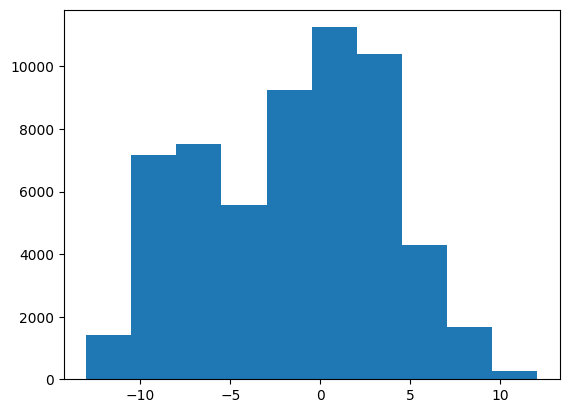

In [730]:
plt.hist(flatten_column(dark_df_long,'lateral_error'))

(array([ 1021.,  4279.,  7775.,  7779.,  7235., 16956., 16946.,  9286.,
         1672.,   223.]),
 array([-12.70264218, -10.61074101,  -8.51883985,  -6.42693868,
         -4.33503751,  -2.24313634,  -0.15123517,   1.940666  ,
          4.03256717,   6.12446834,   8.21636951]),
 <BarContainer object of 10 artists>)

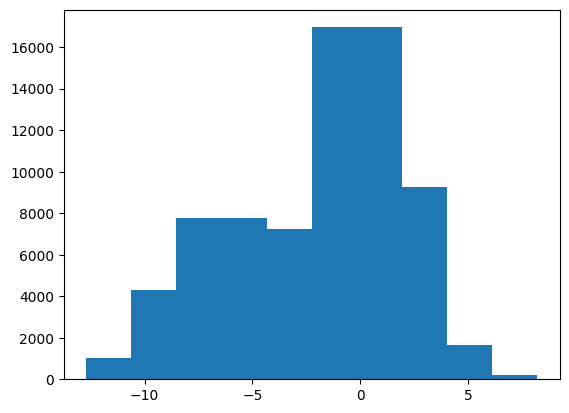

In [729]:
plt.hist(flatten_column(light_df_long,'lateral_error'))

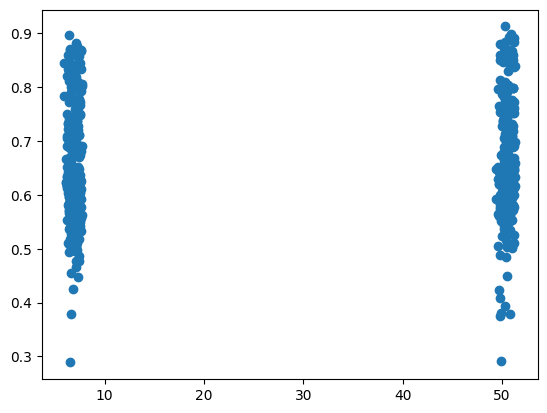

In [134]:
x = dark_in_dict.get('nose_x_cm')
y = dark_df_long['linearity'].to_numpy()
plt.scatter(x,y)

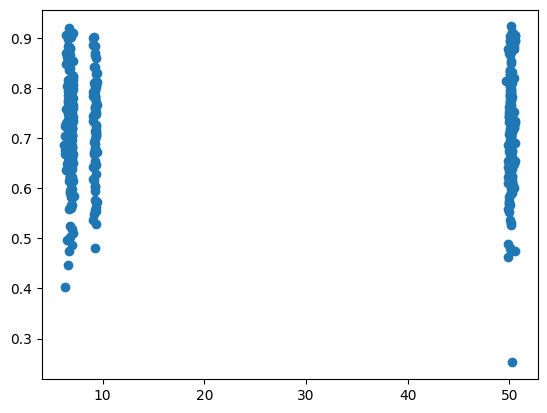

In [135]:
x = light_in_dict.get('nose_x_cm')
y = light_df_long['linearity'].to_numpy()
plt.scatter(x,y)

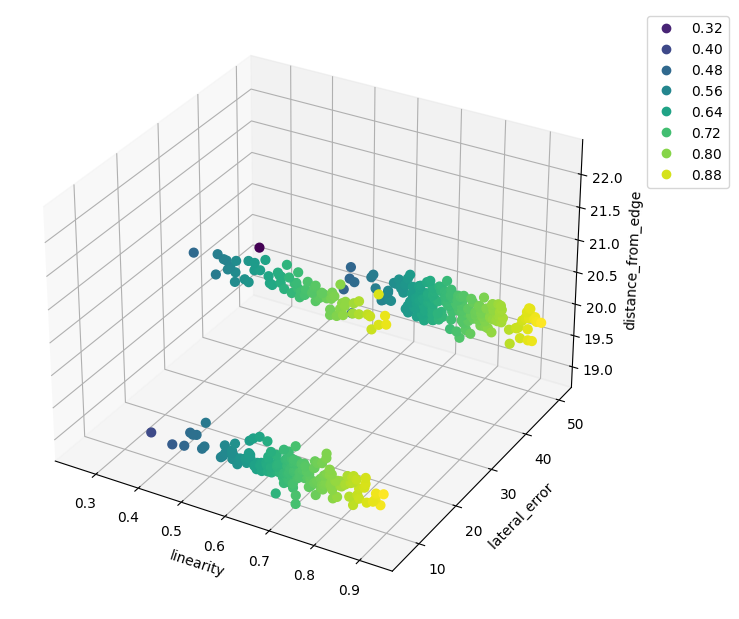

In [102]:
import re, seaborn as sns
import numpy as np
import plotly.express as px
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap
import plotly.graph_objects as go

# generate data

y = light_in_dict.get('nose_x_cm')
z = light_in_dict.get('nose_y_cm')
x = light_df_long['linearity'].to_numpy()

# axes instance
fig = plt.figure(figsize=(6,6))
ax = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)

# get colormap from seaborn
#cmap = ListedColormap(sns.color_palette("husl", 256).as_hex())

# plot
sc = ax.scatter(x, y, z, s=40, c=x, marker='o', alpha=1)
ax.set_xlabel('linearity')
ax.set_ylabel('lateral_error ')
ax.set_zlabel('distance_from_edge')

# legend
plt.legend(*sc.legend_elements(), bbox_to_anchor=(1.05, 1), loc=2)

# save
#plt.savefig("scatter_hue", bbox_inches='tight')

In [103]:
px.scatter_3d( x=x, y=y, z=z,)

In [ ]:
fig = go.Figure(data=[go.Mesh3d(x=(70*np.random.randn(N)),
                   y=(55*np.random.randn(N)),
                   z=(40*np.random.randn(N)),
                   opacity=0.5,
                   color='rgba(244,22,100,0.6)'
                  )])


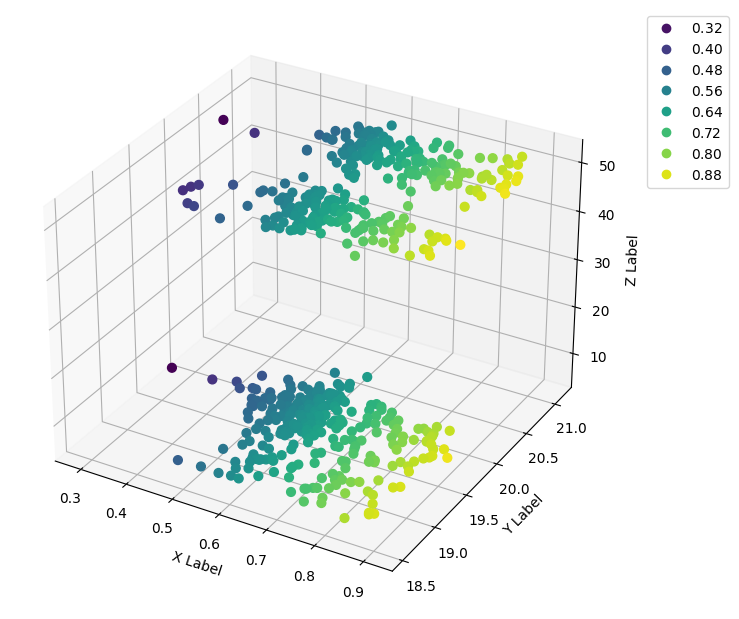

In [136]:

z = dark_in_dict.get('nose_x_cm')
y = dark_in_dict.get('nose_y_cm')
x = dark_df_long['linearity'].to_numpy()

# axes instance
fig = plt.figure(figsize=(6,6))
ax = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)

# get colormap from seaborn
#cmap = ListedColormap(sns.color_palette("husl", 256).as_hex())

# plot
sc = ax.scatter(x, y, z, s=40, c=x, marker='o', alpha=1)
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

# legend
plt.legend(*sc.legend_elements(), bbox_to_anchor=(1.05, 1), loc=2)

In [137]:
px.scatter_3d( x=x, y=y, z=z,)

In [634]:
var_val

-7.973357262000498

In [388]:
def symmetrize_y_axis(axes):
    y_max = np.abs(axes.get_ylim()).max()
    axes.set_ylim(ymin=-y_max, ymax=y_max)

In [ ]:
long_df = create_long_df(light_df)
for ind,row in long_df.iterrows():
    target =  np.argwhere((-1< row['distance_from_edge']) ).max()
    tor,lin= compute_tortuosity(row['ts_nose_x_cm'][:target+1],row['ts_nose_y_cm'][:target+1])
    long_df.at[ind,'tortuosity']=tor
    long_df.at[ind,'linearity']=lin

In [392]:
df

level_0  index    first_poke   second_poke  \
2226       79     84  52545.873766  52548.040588   

                                       trial_timestamps  \
2226  [52545.880166, 52545.896972, 52545.914432, 525...   

                                        trial_vidframes  \
2226  [12684, 12685, 12686, 12687, 12688, 12689, 126...   

                                                 nose_x  \
2226  [nan, nan, nan, nan, nan, nan, nan, nan, nan, ...   

                                                 nose_y  \
2226  [nan, nan, nan, nan, nan, nan, nan, nan, nan, ...   

                                              leftear_x  \
2226  [126.30406188964844, 125.3091812133789, 124.94...   

                                              leftear_y  ...  \
2226  [275.4827575683594, 274.5050048828125, 274.268...  ...   

                           date_mad_interp_ts_nose_y_cm  \
2226  [1.05482105011769, 1.05482105011769, 1.0548210...   

                                     distance_from_edge  \
2226  [18.095446108634654, 17.923351983973642, 17.59...   

     len_distance_from_edge  \
2226                   61.0   

                                        angle_to_corner  \
2226  [47.769274675610156, 47.45892851603638, 46.920...   

                                               ts_speed  \
2226  [9.569290736661983, 21.646153904192136, 28.010...   

                                            ts_distance total_ts_distance  \
2226  [0.20627654248603555, 0.3985490925863502, 0.56...         53.949368   

                               zero_out_angle_to_corner consecutive  \
2226  [47.769274675610156, 47.45892851603638, 46.920...         1.0   

                                          lateral_error  
2226  [-4.588995878692735, -4.623178296517757, -4.69...  

[1 rows x 190 columns]

1.597961723254444 0.6257972174473478


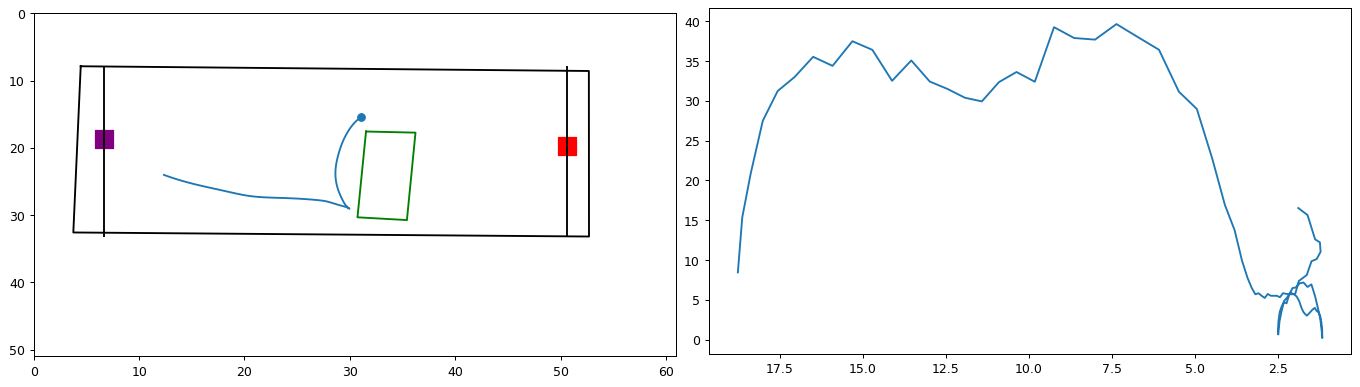

In [425]:
test =dark_long_df.loc[2806    ]
fig = plt.figure(constrained_layout=False, figsize=(15, 8),dpi=90)

spec2 = gridspec.GridSpec(ncols=2, nrows=1, figure=fig)
panel_1 = gridspec.GridSpecFromSubplotSpec(2,1,subplot_spec=spec2[0])
panel_2 = gridspec.GridSpecFromSubplotSpec(2,1,subplot_spec=spec2[1])

ax1 = fig.add_subplot(panel_1[0,0])
ax2 = fig.add_subplot(panel_2[0,0])
plot_arena(test,ax1)
length = np.argwhere(test['distance_from_edge']>1).max()
target =   target =  np.argwhere((-1< test['distance_from_edge']) ).max()
ax1.plot([test['gt_obstacleTL_x_cm'], test['gt_obstacleTR_x_cm'], test['gt_obstacleBR_x_cm'], test['gt_obstacleBL_x_cm'],test['gt_obstacleTL_x_cm']],
                            [test['gt_obstacleTL_y_cm'], test['gt_obstacleTR_y_cm'], test['gt_obstacleBR_y_cm'], test['gt_obstacleBL_y_cm'],test['gt_obstacleTL_y_cm']],color='green')
 
   





ax1.plot(test['ts_nose_x_cm'][:target],test['ts_nose_y_cm'][:target])
ax2.plot(test['distance_from_edge'][:target],test['ts_speed'][:target])
ax1.scatter(test['ts_nose_x_cm'][target],test['ts_nose_y_cm'][target])
ax2.invert_xaxis()
tor,lin= compute_tortuosity(test['ts_nose_x_cm'][:target+1],test['ts_nose_y_cm'][:target+1])
print(tor,lin)

1.000383095159174 0.9996170515465248


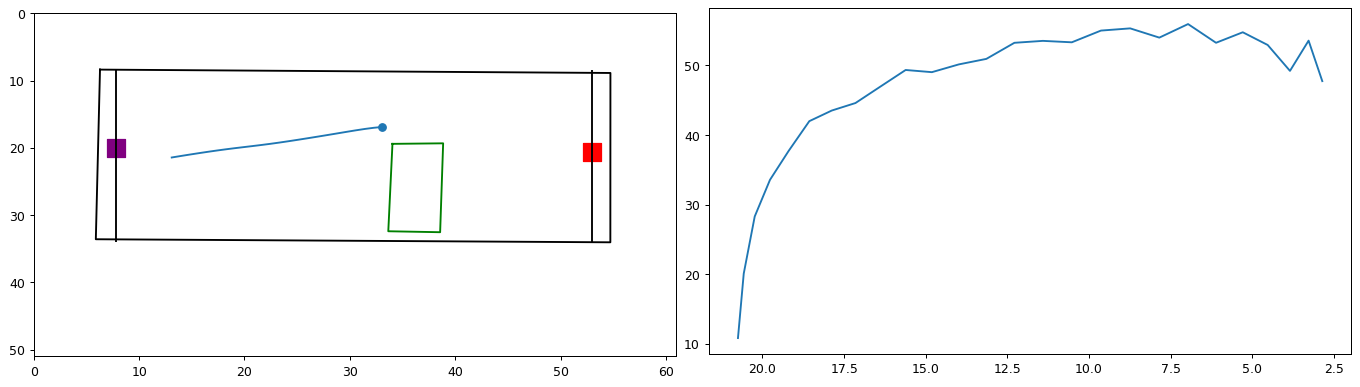

In [429]:
test =long_df.loc[3563]
fig = plt.figure(constrained_layout=False, figsize=(15, 8),dpi=90)

spec2 = gridspec.GridSpec(ncols=2, nrows=1, figure=fig)
panel_1 = gridspec.GridSpecFromSubplotSpec(2,1,subplot_spec=spec2[0])
panel_2 = gridspec.GridSpecFromSubplotSpec(2,1,subplot_spec=spec2[1])

ax1 = fig.add_subplot(panel_1[0,0])
ax2 = fig.add_subplot(panel_2[0,0])
plot_arena(test,ax1)
length = np.argwhere(test['distance_from_edge']>1).max()
target =   target =  np.argwhere((-1< test['distance_from_edge']) ).max()
ax1.plot([test['gt_obstacleTL_x_cm'], test['gt_obstacleTR_x_cm'], test['gt_obstacleBR_x_cm'], test['gt_obstacleBL_x_cm'],test['gt_obstacleTL_x_cm']],
                            [test['gt_obstacleTL_y_cm'], test['gt_obstacleTR_y_cm'], test['gt_obstacleBR_y_cm'], test['gt_obstacleBL_y_cm'],test['gt_obstacleTL_y_cm']],color='green')
 
   





ax1.plot(test['ts_nose_x_cm'][:target+1],test['ts_nose_y_cm'][:target+1])
ax2.plot(test['distance_from_edge'][:target],test['ts_speed'][:target])
ax1.scatter(test['ts_nose_x_cm'][target],test['ts_nose_y_cm'][target])
ax2.invert_xaxis()
tor,lin= compute_tortuosity(test['ts_nose_x_cm'][:target+1],test['ts_nose_y_cm'][:target+1])
print(tor,lin)

1.1211215992378503 0.891963905324641


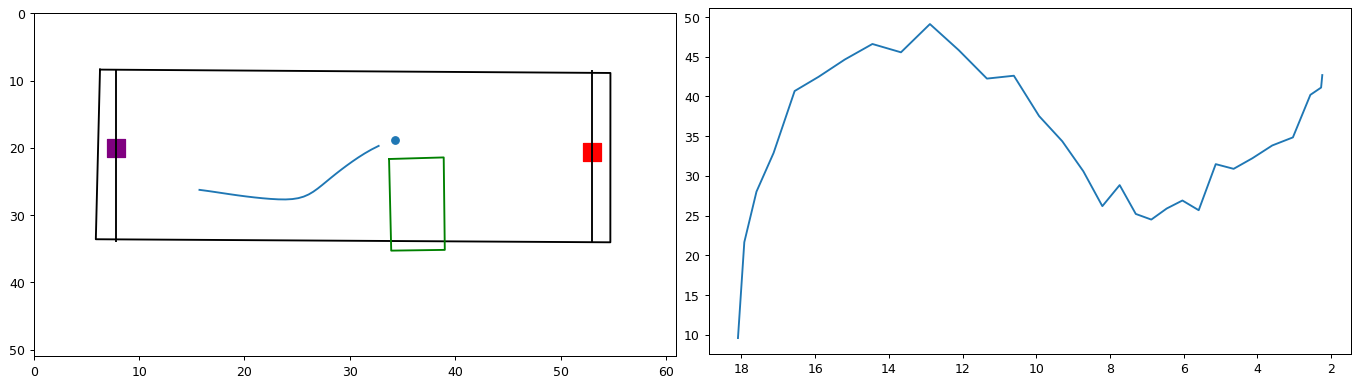

In [404]:
for ind,row in df.iterrows():
    fig = plt.figure(constrained_layout=False, figsize=(15, 8),dpi=90)

    spec2 = gridspec.GridSpec(ncols=2, nrows=1, figure=fig)
    panel_1 = gridspec.GridSpecFromSubplotSpec(2,1,subplot_spec=spec2[0])
    panel_2 = gridspec.GridSpecFromSubplotSpec(2,1,subplot_spec=spec2[1])

    ax1 = fig.add_subplot(panel_1[0,0])
    ax2 = fig.add_subplot(panel_2[0,0])
    plot_arena(row,ax1)
    length = np.argwhere(row['distance_from_edge']>1).max()
    target =   target =  np.argwhere((-1< row['distance_from_edge']) ).max()
    ax1.plot([row['gt_obstacleTL_x_cm'], row['gt_obstacleTR_x_cm'], row['gt_obstacleBR_x_cm'], row['gt_obstacleBL_x_cm'],row['gt_obstacleTL_x_cm']],
                                [row['gt_obstacleTL_y_cm'], row['gt_obstacleTR_y_cm'], row['gt_obstacleBR_y_cm'], row['gt_obstacleBL_y_cm'],row['gt_obstacleTL_y_cm']],color='green')
    
   





    ax1.plot(row['ts_nose_x_cm'][:target],row['ts_nose_y_cm'][:target])
    ax2.plot(row['distance_from_edge'][:length],row['ts_speed'][:length])
    ax1.scatter(row['ts_nose_x_cm'][target+1],row['ts_nose_y_cm'][target+1])
    ax2.invert_xaxis()
    tor,lin= compute_tortuosity(row['ts_nose_x_cm'][:target+1],row['ts_nose_y_cm'][:target+1])
    print(tor,lin)


In [ ]:
corner = row['gt_obstacleBL_y_cm']
lateral_error = 
for i in row['ts_nose_y_cm'][:length]:
    value = np.abs(i - corner) 
    if i<corner:

    

In [193]:
def lateral_error_open_corner(df):
    """get angel of nose to open corner at a hold"""
    for direction, direction_frame in df.groupby(['odd']):
        for cluster, cluster_frame in direction_frame.groupby(['obstacle_cluster']):
            for ind,row in cluster_frame.iterrows():
                if direction == 'right':
                    if cluster == 0 or cluster == 1:
                        nose_y = row['ts_nose_y_cm'].astype(float)
                        corner_y = row['gt_obstacleBR_y_cm']
                        lateral_error = []
                        for i in nose_y:
                            if i > corner_y:  
                                err = np.abs(i -corner_y) 
                                lateral_error.append(err)
                            if i < corner_y: 
                                err = np.abs(i -corner_y) *-1
                                lateral_error.append(err)
                            
                        lateral_error = np.array(lateral_error)
                        
                        df.at[ind,'lateral_error'] = lateral_error.astype(object)
                        
                    if cluster == 2 or cluster == 3:
                        nose_x = row['ts_nose_x_cm'].astype(float)
                        nose_y = row['ts_nose_y_cm'].astype(float)
                        obstalce_edge= np.mean([row['gt_obstacleTR_x_cm'],row['gt_obstacleBR_x_cm']])
                        nose_near_edge = nose_x[np.abs(np.array(nose_x) - obstalce_edge).argmin()]
                        ind_nose_near_edge = np.argwhere(nose_x==nose_near_edge)[0][0]
                        distance_to_top = np.abs(calculate_distances(nose_x[ind_nose_near_edge],nose_y[ind_nose_near_edge],obstalce_edge,row['gt_obstacleTR_y_cm']))
                        distance_to_bottom = np.abs(calculate_distances(nose_x[ind_nose_near_edge],nose_y[ind_nose_near_edge],obstalce_edge,row['gt_obstacleBR_y_cm']))
                        lateral_error = []
                        if distance_to_top < distance_to_bottom:
                            corner_y = row['gt_obstacleTR_y_cm']
                            for i in nose_y:
                                if i > corner_y:  
                                    err = np.abs(i -corner_y) * -1 
                                    lateral_error.append(err)
                                if i < corner_y: 
                                    err = np.abs(i -corner_y)
                                    lateral_error.append(err)
                            lateral_error = np.array(lateral_error)
                            df.at[ind,'lateral_error'] = lateral_error.astype(object)
                        if distance_to_top > distance_to_bottom:
                            corner_y = row['gt_obstacleBR_y_cm']
                            for i in nose_y:
                                if i > corner_y:  
                                    err = np.abs(i -corner_y) 
                                    lateral_error.append(err)
                                if i < corner_y: 
                                    err = np.abs(i -corner_y)* -1 
                                    lateral_error.append(err)
                            lateral_error = np.array(lateral_error)
                            df.at[ind,'lateral_error'] = lateral_error.astype(object)
                            
                                
                    if cluster == 4 or cluster == 5:
                        nose_y = row['ts_nose_y_cm'].astype(float)
                        corner_y = row['gt_obstacleTR_y_cm']
                        lateral_error = []
                        for i in nose_y:
                            if i > corner_y:  
                                err = np.abs(i -corner_y) * -1 
                                lateral_error.append(err)
                            if i < corner_y: 
                                err = np.abs(i -corner_y)
                                lateral_error.append(err)
                            
                        lateral_error = np.array(lateral_error)
                        df.at[ind,'lateral_error'] = lateral_error.astype(object)
                        
                         
                if direction == 'left':
                    if cluster == 0 or cluster == 1:
                        nose_y = row['ts_nose_y_cm'].astype(float)
                        corner_y = row['gt_obstacleBL_y_cm']
                        lateral_error = []
                        for i in nose_y:
                            if i > corner_y:  
                                err = np.abs(i -corner_y) 
                                lateral_error.append(err)
                            if i < corner_y: 
                                err = np.abs(i -corner_y)*-1
                                lateral_error.append(err)
                            
                        lateral_error = np.array(lateral_error)
                        df.at[ind,'lateral_error'] = lateral_error.astype(object)
                    if cluster == 2 or cluster == 3:
                        nose_x = row['ts_nose_x_cm'].astype(float)
                        nose_y = row['ts_nose_y_cm'].astype(float)
                        obstalce_edge= np.mean([row['gt_obstacleTL_x_cm'],row['gt_obstacleBL_x_cm']])
                        nose_near_edge = nose_x[np.abs(np.array(nose_x) - obstalce_edge).argmin()]
                        ind_nose_near_edge = np.argwhere(nose_x==nose_near_edge)[0][0]
                        distance_to_top = np.abs(calculate_distances(nose_x[ind_nose_near_edge],nose_y[ind_nose_near_edge],obstalce_edge,row['gt_obstacleTL_y_cm']))
                        distance_to_bottom = np.abs(calculate_distances(nose_x[ind_nose_near_edge],nose_y[ind_nose_near_edge],obstalce_edge,row['gt_obstacleBL_y_cm']))
                        lateral_error = []
                        if distance_to_top < distance_to_bottom:
                            corner_y = row['gt_obstacleTL_y_cm']
                            for i in nose_y:
                                if i > corner_y:  
                                    err = np.abs(i -corner_y) * -1 
                                    lateral_error.append(err)
                                if i < corner_y: 
                                    err = np.abs(i -corner_y)
                                    lateral_error.append(err)
                            lateral_error = np.array(lateral_error)
                        if distance_to_top > distance_to_bottom:
                            corner_y = row['gt_obstacleBL_y_cm']
                            for i in nose_y:
                                if i > corner_y:  
                                    err = np.abs(i -corner_y) 
                                    lateral_error.append(err)
                                if i < corner_y: 
                                    err = np.abs(i -corner_y)* -1 
                                    lateral_error.append(err)
                            lateral_error = np.array(lateral_error)
                            df.at[ind,'lateral_error'] = lateral_error.astype(object)
                        
                    if cluster == 4 or cluster == 5:
                        nose_y = row['ts_nose_y_cm'].astype(float)
                        corner_y = row['gt_obstacleTL_y_cm']
                        lateral_error = []
                        for i in nose_y:
                            if i > corner_y:  
                                err = np.abs(i -corner_y) * -1 
                                lateral_error.append(err)
                            if i < corner_y: 
                                err = np.abs(i -corner_y) 
                                lateral_error.append(err)
                            
                        lateral_error = np.array(lateral_error)
                        df.at[ind,'lateral_error'] = lateral_error.astype(object)

In [446]:
lateral_error_open_corner(light_df)
lateral_error_open_corner(dark_df)

In [39]:
def symmetrize_y_axis(axes):
    y_max = np.abs(axes.get_ylim()).max()
    axes.set_ylim(ymin=-y_max, ymax=y_max)

In [44]:
def find_consective_trials(df):
    by_animal = df.groupby(['animal'])
    for animal,animal_frame in by_animal:
        by_date = animal_frame.groupby(['date'])
        for date,date_frame in by_date:
            by_cluster = date_frame.groupby(['obstacle_cluster'])
            for cluster,cluster_frame in by_cluster:
                by_direction = cluster_frame.groupby(['odd'])
                for direction, direction_frame in by_direction:
                    by_start = direction_frame.groupby(['start'])
                    for start,start_frame in by_start:
                        for num,row in enumerate(start_frame.iterrows()):
                            if num == 0:
                                df.at[row[0],'consecutive'] = int(1) 
                            else:
                                try:
                                    if (row[1]['index']) - (df.at[row[0]-2,'index' ]) == 2:
                                        df.at[row[0],'consecutive'] = int(2) 
                                    else:
                                        df.at[row[0],'consecutive'] = int(1)
                                except KeyError:
                                    df.at[row[0],'consecutive'] = int(1)


In [171]:
find_consective_trials(light_df)
find_consective_trials(dark_df)

In [148]:
def calculate_speed(df):
    for ind, row in df.iterrows():
        if row['odd'] == 'left': 
            nose_list = row['nose_x_cm'] 
            odd_ind = np.argmax(nose_list>(df.leftportT_x_cm.unique()+5))
            temp_time = np.diff(row['trial_timestamps'][odd_ind:])
        if row['odd'] == 'right':
            nose_list = row['nose_x_cm'] 
            even_ind = np.argmax(nose_list<(df.rightportT_x_cm.unique()-5))
            temp_time = np.diff(row['trial_timestamps'][even_ind:])
            #temp_time = np.diff(row['trial_timestamps'])
        x = np.diff(row['nose_x_cm']); y = np.diff(row['nose_y_cm'])
        if len(x) == len(temp_time):
            xspeed = list((x/temp_time)**2)
        elif len(x) > len(temp_time):
            xspeed = list((x[:len(temp_time)]/temp_time)**2)
        elif len(x) < len(temp_time):
            xspeed = list((x/temp_time[:len(x)])**2)
        if len(y) == len(temp_time):
            yspeed = list((y/temp_time)**2)
        elif len(y) > len(temp_time):
            yspeed = list((y[:len(temp_time)]/temp_time)**2)
        elif len(y) < len(temp_time):
            yspeed = list((y/temp_time[:len(y)])**2)
        df.at[ind, 'speed']  = np.sqrt(xspeed + yspeed).astype(object)
        distance = np.sqrt((x.astype(float))**2) + np.sqrt((y.astype(float))**2)
        df.at[ind, 'distance'] = distance.astype(object)
        df.at[ind, 'total_distance'] = np.nansum(distance).astype(object)

In [149]:
def create_long_df(df):
    cluster_0 = df[(df['obstacle_cluster']==0)&(df['start']=='top')&(df['odd']== 'right')]
    cluster_1 = df[(df['obstacle_cluster']==1)&(df['start']=='top')&(df['odd']== 'left')]
    cluster_4 = df[(df['obstacle_cluster']==4)&(df['start']=='bottom')&(df['odd']== 'right')]
    cluster_5 = df[(df['obstacle_cluster']==5)&(df['start']=='bottom')&(df['odd']== 'left')]

    long_df = pd.concat([cluster_0,cluster_1,cluster_4,cluster_5])
    return long_df


In [175]:
import copy
def zero_out_angle(df):
    for ind, row in df.iterrows():
        angle_array = copy.deepcopy(row['angle_to_corner'])
        zero = angle_array[np.nanargmin(np.abs(angle_array - 0))]
        zero_ind = np.where(angle_array == zero)[0][0]
        angle_array[zero_ind:] = 0 
        df.at[ind,'zero_out_angle_to_corner'] = angle_array.astype(object)
zero_out_angle(light_df)
zero_out_angle(dark_df)

In [516]:
import copy
def zero_out_angle_target_port(df):
    for ind, row in df.iterrows():
        angle_array = copy.deepcopy(row['angle_to_target_port'])
        zero = angle_array[np.nanargmax(np.abs(angle_array - 0))]
        zero_ind = np.where(angle_array == zero)[0][0]
        angle_array[zero_ind:] = 0 
        df.at[ind,'zero_out_angle_to_target_port'] = angle_array.astype(object)
zero_out_angle_target_port(light_df)
zero_out_angle_target_port(dark_df)

In [532]:
angle_array.item()

ValueError: can only convert an array of size 1 to a Python scalar

In [530]:
sample = create_long_df(light_df).sample(1)
angle_array = copy.deepcopy(sample['angle_to_target_port']).item()
zero = angle_array[np.nanargmax(np.abs(angle_array - 0))]
zero_ind = np.where(angle_array == zero)[0][0]
angle_array[zero_ind:] = 0 


In [531]:
angle_array

array([52.41977114771757, 51.75852537792368, 50.2802354343105,
       49.05438703045446, 48.24329551604876, 47.29765809347544,
       46.54433771311943, 45.80987477619524, 44.89518546912607,
       44.09826239174659, 42.85665737474015, 41.34966316143092,
       39.624090837241, 37.67079609484031, 35.62308816511603,
       33.426766389180514, 31.171376175257976, 28.60739555486153,
       26.019964258890568, 23.432174199402482, 20.766142112312625,
       17.98526087517703, 15.329881038508917, 12.689585827118078,
       9.911626451741212, 7.1744871877093574, 4.441061155583751,
       1.6543883101317225, 1.1592838733397444, 3.989981542649419,
       6.766946320923039, 9.598319445522025, 12.364015886839837,
       14.720761517548777, 17.029022011651904, 19.26470731638654,
       20.37677149553603, 21.477788504577628, 22.94274467600962,
       24.6043744203387, 25.77405571038764, 27.101816022690194,
       28.75207426239863, 30.849194141013964, 32.09328669409642,
       33.34259813774953, 34

(573, 50) (573, 50)
nan
(325, 50) (325, 50)
(248, 50) (248, 50)


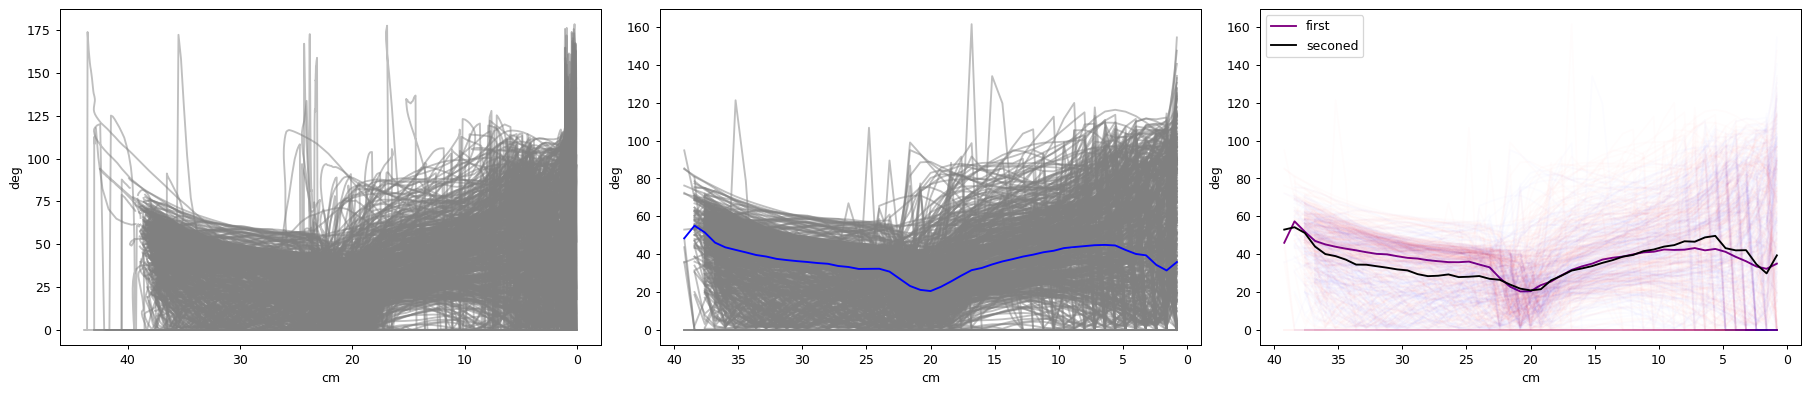

In [533]:
long_df = create_long_df(dark_df)


fig = plt.figure(constrained_layout=False, figsize=(20, 8),dpi=90)
spec2 = gridspec.GridSpec(ncols=3, nrows=1, figure=fig)
panel_1 = gridspec.GridSpecFromSubplotSpec(2,1,subplot_spec=spec2[0])
panel_2 = gridspec.GridSpecFromSubplotSpec(2,1,subplot_spec=spec2[1])
panel_3 = gridspec.GridSpecFromSubplotSpec(2,1,subplot_spec=spec2[2])

ax1 = fig.add_subplot(panel_1[0,0])
ax2 = fig.add_subplot(panel_2[0,0])
ax3 = fig.add_subplot(panel_3[0,0])

ax1.set_ylabel('deg')
ax1.set_xlabel('cm')
ax2.set_ylabel('deg')
ax2.set_xlabel('cm')
ax3.set_ylabel('deg')
ax3.set_xlabel('cm')

for ind,row in long_df.iterrows():
    #length = int(row['len_facing_corner'])
    length = np.argwhere(row['distance_from_target_port']>-3).max()
    ax1.plot(row['distance_from_target_port'],row['zero_out_angle_to_target_port'],c = 'grey',alpha = .5)
ax1.invert_xaxis()
rows = long_df.shape[0]
angle_array = np.empty([rows,50])
angle_array[:] =np.nan 
distance_array = np.empty([rows,50])
distance_array[:] =np.nan 

for i,row in enumerate(long_df.iterrows()):
    
    #length = int(row[1]['len_facing_corner'])
    #length = np.argwhere(row[1]['distance_from_target_port']>-3).max()
    interpolater = interp1d(row[1]['distance_from_target_port'],row[1]['zero_out_angle_to_target_port'],fill_value=np.nan,bounds_error=False)
    xnew =  np.arange(0, 40, .8)
    ynew = interpolater(xnew)
    distance_array[i] = xnew
    angle_array[i] = ynew
    ax2.plot(xnew,ynew,c = 'grey',alpha = .5)
ax2.invert_xaxis()
print(distance_array.shape,angle_array.shape)
ax2.plot(np.nanmedian(distance_array,axis = 0),np.nanmedian(angle_array,axis = 0),c = 'blue')
print(np.nanmedian(angle_array,axis = 0).max())
by_consecutive = long_df.groupby(['consecutive'])
for con,con_df in by_consecutive:
    if con == 1:
        first_df = con_df
    if con ==2:
        sec_df = con_df
rows = first_df.shape[0]
angle_array = np.empty([rows,50])
angle_array[:] =np.nan 
distance_array = np.empty([rows,50])
distance_array[:] =np.nan 
for i,row in enumerate(first_df.iterrows()):
    
    #length = int(row[1]['len_facing_corner'])
    #length = np.argwhere(row[1]['distance_from_target_port']>-3).max()
    interpolater = interp1d(row[1]['distance_from_target_port'],row[1]['zero_out_angle_to_target_port'],fill_value=np.nan,bounds_error=False)
    xnew =  np.arange(0, 40, .8)
    ynew = interpolater(xnew)
    distance_array[i] = xnew
    angle_array[i] = ynew
    ax3.plot(xnew,ynew,c = 'red',alpha = .01)
ax3.plot(np.nanmedian(distance_array,axis = 0),np.nanmedian(angle_array,axis = 0),c = 'purple',label = 'first')
print(distance_array.shape,angle_array.shape)
rows = sec_df.shape[0]
angle_array_sec = np.empty([rows,50])
angle_array_sec[:] =np.nan 
distance_array_sec = np.empty([rows,50])
distance_array_sec[:] =np.nan 
for i,row in enumerate(sec_df.iterrows()):
    
    #length = int(row[1]['len_facing_corner'])
    #length = np.argwhere(row[1]['distance_from_target_port']>-3).max()
    interpolater = interp1d(row[1]['distance_from_target_port'],row[1]['zero_out_angle_to_target_port'],fill_value=np.nan,bounds_error=False)
    xnew =  np.arange(0, 40, .8)
    ynew = interpolater(xnew)
    distance_array_sec[i] = xnew
    angle_array_sec[i] = ynew
    ax3.plot(xnew,ynew,c = 'blue',alpha = .01)
ax3.plot(np.nanmedian(distance_array_sec,axis = 0),np.nanmedian(angle_array_sec,axis = 0),c = 'black',label = 'seconed')
print(distance_array_sec.shape,angle_array_sec.shape)
ax3.invert_xaxis()
ax3.legend()


(874, 50) (874, 50)
nan
(459, 50) (459, 50)
(415, 50) (415, 50)


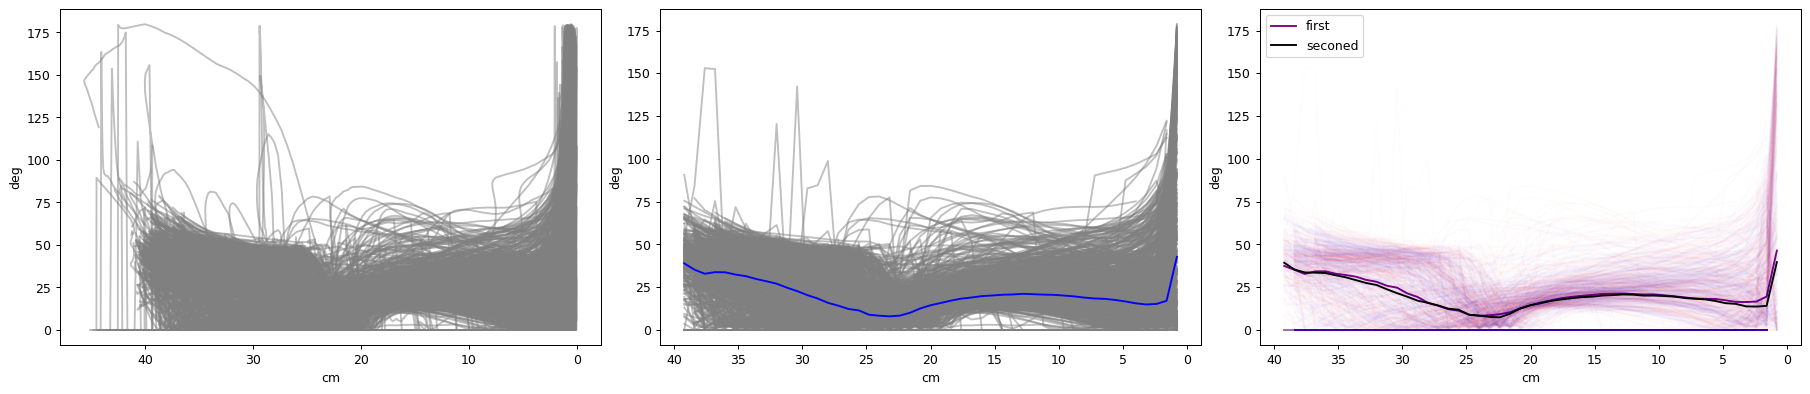

In [517]:
long_df = create_long_df(light_df)


fig = plt.figure(constrained_layout=False, figsize=(20, 8),dpi=90)
spec2 = gridspec.GridSpec(ncols=3, nrows=1, figure=fig)
panel_1 = gridspec.GridSpecFromSubplotSpec(2,1,subplot_spec=spec2[0])
panel_2 = gridspec.GridSpecFromSubplotSpec(2,1,subplot_spec=spec2[1])
panel_3 = gridspec.GridSpecFromSubplotSpec(2,1,subplot_spec=spec2[2])

ax1 = fig.add_subplot(panel_1[0,0])
ax2 = fig.add_subplot(panel_2[0,0])
ax3 = fig.add_subplot(panel_3[0,0])

ax1.set_ylabel('deg')
ax1.set_xlabel('cm')
ax2.set_ylabel('deg')
ax2.set_xlabel('cm')
ax3.set_ylabel('deg')
ax3.set_xlabel('cm')

for ind,row in long_df.iterrows():
    #length = int(row['len_facing_corner'])
    length = np.argwhere(row['distance_from_target_port']>-3).max()
    ax1.plot(row['distance_from_target_port'],row['zero_out_angle_to_target_port'],c = 'grey',alpha = .5)
ax1.invert_xaxis()
rows = long_df.shape[0]
angle_array = np.empty([rows,50])
angle_array[:] =np.nan 
distance_array = np.empty([rows,50])
distance_array[:] =np.nan 

for i,row in enumerate(long_df.iterrows()):
    
    #length = int(row[1]['len_facing_corner'])
    #length = np.argwhere(row[1]['distance_from_target_port']>-3).max()
    interpolater = interp1d(row[1]['distance_from_target_port'],row[1]['zero_out_angle_to_target_port'],fill_value=np.nan,bounds_error=False)
    xnew =  np.arange(0, 40, .8)
    try:
        ynew = interpolater(xnew)
        distance_array[i] = xnew
        angle_array[i] = ynew
        ax2.plot(xnew,ynew,c = 'grey',alpha = .5)
    except:
        continue
ax2.invert_xaxis()
print(distance_array.shape,angle_array.shape)
ax2.plot(np.nanmedian(distance_array,axis = 0),np.nanmedian(angle_array,axis = 0),c = 'blue')
print(np.nanmedian(angle_array,axis = 0).max())
by_consecutive = long_df.groupby(['consecutive'])
for con,con_df in by_consecutive:
    if con == 1:
        first_df = con_df
    if con ==2:
        sec_df = con_df
rows = first_df.shape[0]
angle_array = np.empty([rows,50])
angle_array[:] =np.nan 
distance_array = np.empty([rows,50])
distance_array[:] =np.nan 
for i,row in enumerate(first_df.iterrows()):
    
    #length = int(row[1]['len_facing_corner'])
    #length = np.argwhere(row[1]['distance_from_target_port']>-3).max()
    interpolater = interp1d(row[1]['distance_from_target_port'],row[1]['zero_out_angle_to_target_port'],fill_value=np.nan,bounds_error=False)
    xnew =  np.arange(0, 40, .8)
    try:
        ynew = interpolater(xnew)
        distance_array[i] = xnew
        angle_array[i] = ynew
        ax3.plot(xnew,ynew,c = 'red',alpha = .01)
    except:
        continue
ax3.plot(np.nanmedian(distance_array,axis = 0),np.nanmedian(angle_array,axis = 0),c = 'purple',label = 'first')
print(distance_array.shape,angle_array.shape)
rows = sec_df.shape[0]
angle_array_sec = np.empty([rows,50])
angle_array_sec[:] =np.nan 
distance_array_sec = np.empty([rows,50])
distance_array_sec[:] =np.nan 
for i,row in enumerate(sec_df.iterrows()):
    
    #length = int(row[1]['len_facing_corner'])
    #length = np.argwhere(row[1]['distance_from_target_port']>-3).max()
    interpolater = interp1d(row[1]['distance_from_target_port'],row[1]['zero_out_angle_to_target_port'],fill_value=np.nan,bounds_error=False)
    xnew =  np.arange(0, 40, .8)
    try:
        ynew = interpolater(xnew)
        distance_array_sec[i] = xnew
        angle_array_sec[i] = ynew
        ax3.plot(xnew,ynew,c = 'blue',alpha = .01)
    except:
        continue
ax3.plot(np.nanmedian(distance_array_sec,axis = 0),np.nanmedian(angle_array_sec,axis = 0),c = 'black',label = 'seconed')
print(distance_array_sec.shape,angle_array_sec.shape)
ax3.invert_xaxis()
ax3.legend()


(874, 50) (874, 50)
nan
(459, 50) (459, 50)
(415, 50) (415, 50)


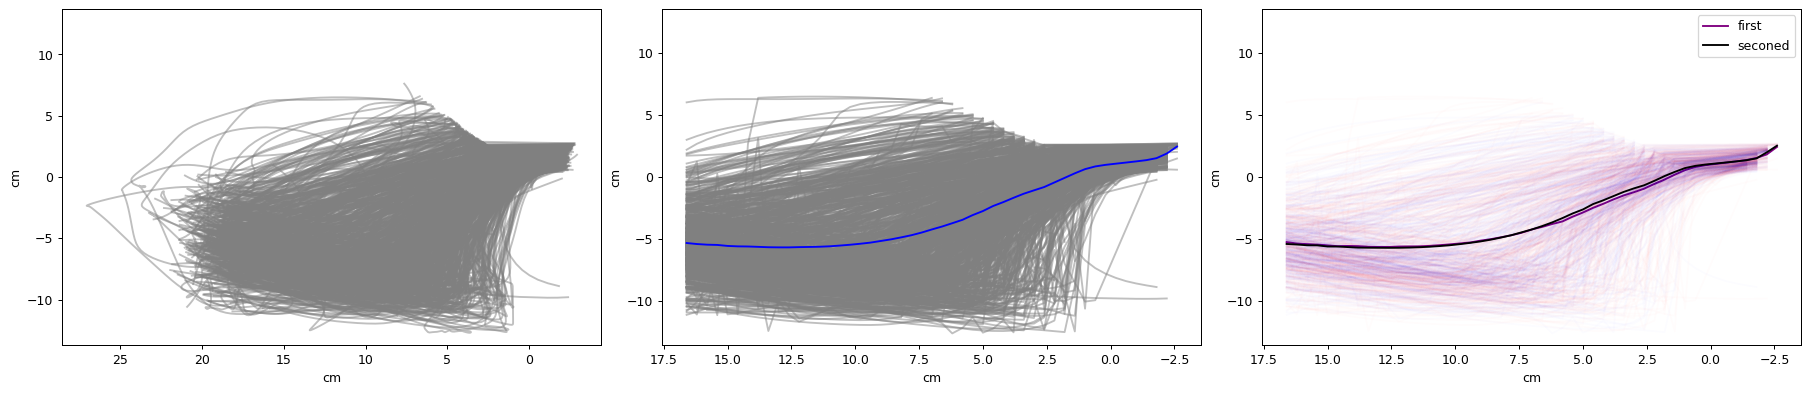

In [172]:
long_df = create_long_df(light_df)


fig = plt.figure(constrained_layout=False, figsize=(20, 8),dpi=90)
spec2 = gridspec.GridSpec(ncols=3, nrows=1, figure=fig)
panel_1 = gridspec.GridSpecFromSubplotSpec(2,1,subplot_spec=spec2[0])
panel_2 = gridspec.GridSpecFromSubplotSpec(2,1,subplot_spec=spec2[1])
panel_3 = gridspec.GridSpecFromSubplotSpec(2,1,subplot_spec=spec2[2])

ax1 = fig.add_subplot(panel_1[0,0])
ax2 = fig.add_subplot(panel_2[0,0])
ax3 = fig.add_subplot(panel_3[0,0])

ax1.set_ylabel('cm')
ax1.set_xlabel('cm')
ax2.set_ylabel('cm')
ax2.set_xlabel('cm')
ax3.set_ylabel('cm')
ax3.set_xlabel('cm')

for ind,row in long_df.iterrows():
    #length = int(row['len_facing_corner'])
    length = np.argwhere(row['distance_from_edge']>-3).max()
    ax1.plot(row['distance_from_edge'][:length],row['lateral_error'][:length],c = 'grey',alpha = .5)
ax1.invert_xaxis()
rows = long_df.shape[0]
angle_array = np.empty([rows,50])
angle_array[:] =np.nan 
distance_array = np.empty([rows,50])
distance_array[:] =np.nan 

for i,row in enumerate(long_df.iterrows()):
    
    #length = int(row[1]['len_facing_corner'])
    length = np.argwhere(row[1]['distance_from_edge']>-3).max()
    interpolater = interp1d(row[1]['distance_from_edge'][:length],row[1]['lateral_error'][:length],fill_value=np.nan,bounds_error=False)
    xnew =  np.arange(-3, 17, .4)
    ynew = interpolater(xnew)
    distance_array[i] = xnew
    angle_array[i] = ynew
    ax2.plot(xnew,ynew,c = 'grey',alpha = .5)
ax2.invert_xaxis()
print(distance_array.shape,angle_array.shape)
ax2.plot(np.nanmean(distance_array,axis = 0),np.nanmean(angle_array,axis = 0),c = 'blue')
print(np.nanmean(angle_array,axis = 0).max())
by_consecutive = long_df.groupby(['consecutive'])
for con,con_df in by_consecutive:
    if con == 1:
        first_df = con_df
    if con ==2:
        sec_df = con_df
rows = first_df.shape[0]
angle_array = np.empty([rows,50])
angle_array[:] =np.nan 
distance_array = np.empty([rows,50])
distance_array[:] =np.nan 
for i,row in enumerate(first_df.iterrows()):
    
    #length = int(row[1]['len_facing_corner'])
    length = np.argwhere(row[1]['distance_from_edge']>-3).max()
    interpolater = interp1d(row[1]['distance_from_edge'][:length],row[1]['lateral_error'][:length],fill_value=np.nan,bounds_error=False)
    xnew =  np.arange(-3, 17, .4)
    ynew = interpolater(xnew)
    distance_array[i] = xnew
    angle_array[i] = ynew
    ax3.plot(xnew,ynew,c = 'red',alpha = .01)
ax3.plot(np.nanmean(distance_array,axis = 0),np.nanmean(angle_array,axis = 0),c = 'purple',label = 'first')
print(distance_array.shape,angle_array.shape)
rows = sec_df.shape[0]
angle_array_sec = np.empty([rows,50])
angle_array_sec[:] =np.nan 
distance_array_sec = np.empty([rows,50])
distance_array_sec[:] =np.nan 
for i,row in enumerate(sec_df.iterrows()):
    
    #length = int(row[1]['len_facing_corner'])
    length = np.argwhere(row[1]['distance_from_edge']>-3).max()
    interpolater = interp1d(row[1]['distance_from_edge'][:length],row[1]['lateral_error'][:length],fill_value=np.nan,bounds_error=False)
    xnew =  np.arange(-3, 17, .4)
    ynew = interpolater(xnew)
    distance_array_sec[i] = xnew
    angle_array_sec[i] = ynew
    ax3.plot(xnew,ynew,c = 'blue',alpha = .01)
ax3.plot(np.nanmean(distance_array_sec,axis = 0),np.nanmean(angle_array_sec,axis = 0),c = 'black',label = 'seconed')
print(distance_array_sec.shape,angle_array_sec.shape)
ax3.invert_xaxis()
ax3.legend()
symmetrize_y_axis(ax1)
symmetrize_y_axis(ax2)
symmetrize_y_axis(ax3)

(573, 50) (573, 50)
(325, 50) (325, 50)
(248, 50) (248, 50)


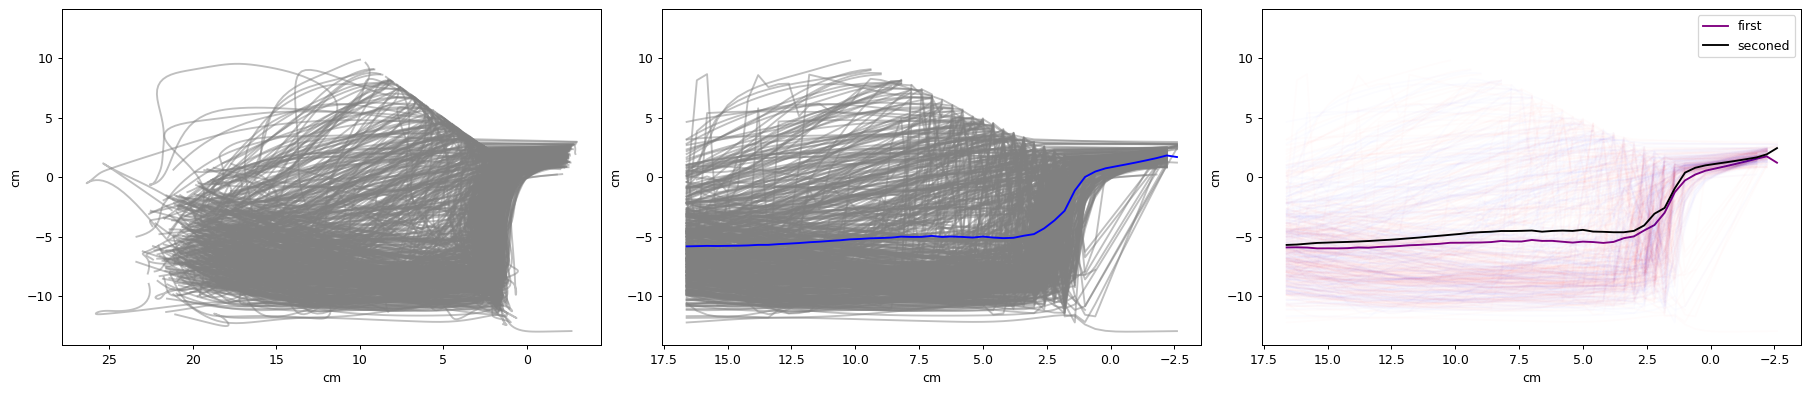

In [173]:
long_df = create_long_df(dark_df)


fig = plt.figure(constrained_layout=False, figsize=(20, 8),dpi=90)
spec2 = gridspec.GridSpec(ncols=3, nrows=1, figure=fig)
panel_1 = gridspec.GridSpecFromSubplotSpec(2,1,subplot_spec=spec2[0])
panel_2 = gridspec.GridSpecFromSubplotSpec(2,1,subplot_spec=spec2[1])
panel_3 = gridspec.GridSpecFromSubplotSpec(2,1,subplot_spec=spec2[2])

ax1 = fig.add_subplot(panel_1[0,0])
ax2 = fig.add_subplot(panel_2[0,0])
ax3 = fig.add_subplot(panel_3[0,0])

ax1.set_ylabel('cm')
ax1.set_xlabel('cm')
ax2.set_ylabel('cm')
ax2.set_xlabel('cm')
ax3.set_ylabel('cm')
ax3.set_xlabel('cm')

for ind,row in long_df.iterrows():
    #length = int(row['len_facing_corner'])
    length = np.argwhere(row['distance_from_edge']>-3).max()
    ax1.plot(row['distance_from_edge'][:length],row['lateral_error'][:length],c = 'grey',alpha = .5)
ax1.invert_xaxis()
rows = long_df.shape[0]
angle_array = np.empty([rows,50])
angle_array[:] =np.nan 
distance_array = np.empty([rows,50])
distance_array[:] =np.nan 

for i,row in enumerate(long_df.iterrows()):
    
    #length = int(row[1]['len_facing_corner'])
    length = np.argwhere(row[1]['distance_from_edge']>-3).max()
    interpolater = interp1d(row[1]['distance_from_edge'][:length],row[1]['lateral_error'][:length],fill_value=np.nan,bounds_error=False)
    xnew =  np.arange(-3, 17, .4)
    ynew = interpolater(xnew)
    distance_array[i] = xnew
    angle_array[i] = ynew
    ax2.plot(xnew,ynew,c = 'grey',alpha = .5)
ax2.invert_xaxis()
print(distance_array.shape,angle_array.shape)
ax2.plot(np.nanmean(distance_array,axis = 0),np.nanmean(angle_array,axis = 0),c = 'blue')
by_consecutive = long_df.groupby(['consecutive'])
for con,con_df in by_consecutive:
    if con == 1:
        first_df = con_df
    if con ==2:
        sec_df = con_df
rows = first_df.shape[0]
angle_array = np.empty([rows,50])
angle_array[:] =np.nan 
distance_array = np.empty([rows,50])
distance_array[:] =np.nan 
for i,row in enumerate(first_df.iterrows()):
    
    #length = int(row[1]['len_facing_corner'])
    length = np.argwhere(row[1]['distance_from_edge']>-3).max()
    interpolater = interp1d(row[1]['distance_from_edge'][:length],row[1]['lateral_error'][:length],fill_value=np.nan,bounds_error=False)
    xnew =  np.arange(-3, 17, .4)
    ynew = interpolater(xnew)
    distance_array[i] = xnew
    angle_array[i] = ynew
    ax3.plot(xnew,ynew,c = 'red',alpha = .01)
ax3.plot(np.nanmean(distance_array,axis = 0),np.nanmean(angle_array,axis = 0),c = 'purple',label = 'first')
print(distance_array.shape,angle_array.shape)
rows = sec_df.shape[0]
angle_array_sec = np.empty([rows,50])
angle_array_sec[:] =np.nan 
distance_array_sec = np.empty([rows,50])
distance_array_sec[:] =np.nan 
for i,row in enumerate(sec_df.iterrows()):
    
    #length = int(row[1]['len_facing_corner'])
    length = np.argwhere(row[1]['distance_from_edge']>-3).max()
    interpolater = interp1d(row[1]['distance_from_edge'][:length],row[1]['lateral_error'][:length],fill_value=np.nan,bounds_error=False)
    xnew =  np.arange(-3, 17, .4)
    ynew = interpolater(xnew)
    distance_array_sec[i] = xnew
    angle_array_sec[i] = ynew
    ax3.plot(xnew,ynew,c = 'blue',alpha = .01)
ax3.plot(np.nanmean(distance_array_sec,axis = 0),np.nanmean(angle_array_sec,axis = 0),c = 'black',label = 'seconed')
print(distance_array_sec.shape,angle_array_sec.shape)
ax3.invert_xaxis()
ax3.legend()
symmetrize_y_axis(ax1)
symmetrize_y_axis(ax2)
symmetrize_y_axis(ax3)

In [153]:
test = light_df.sample(1)

In [154]:
test.distance_from_edge.item()

array([7.433451474849356, 7.34099188512775, 7.161071808298402,
       6.902711181584003, 6.577292361286823, 6.196697758794123,
       5.7716437279534105, 5.31049065213368, 4.818668461309045,
       4.298767107563101, 3.751310975224053, 3.187009219816523,
       2.6207988356027188, 2.0709787294877473, 1.5787107819618291,
       1.2440109649551412, -1.2358681386349204, -1.5862638036644368,
       -2.1469145788252257, -2.8111085708821526, -3.532884551185752,
       -4.291214519351818, -5.074366470087717, -5.874397548593494,
       -6.685340521845852, -7.502972580592444, -8.325041780275026,
       -9.151149742764387, -9.981935746831114, -10.817902414423493,
       -11.658495391614407, -12.501926710266506, -13.345786053959214,
       -14.187998048356878, -15.027523028706293, -15.864378763430715,
       -16.698984765809662, -17.53121849054483, -18.359625491751117,
       -19.179525660953555, -19.98654936503496, -20.776734312416963,
       -21.546148316525187, -22.291604081713647, -23.0111129

In [156]:
len(test.distance_from_edge.item())

66

(874, 50) (874, 50)
(459, 50) (459, 50)
(415, 50) (415, 50)


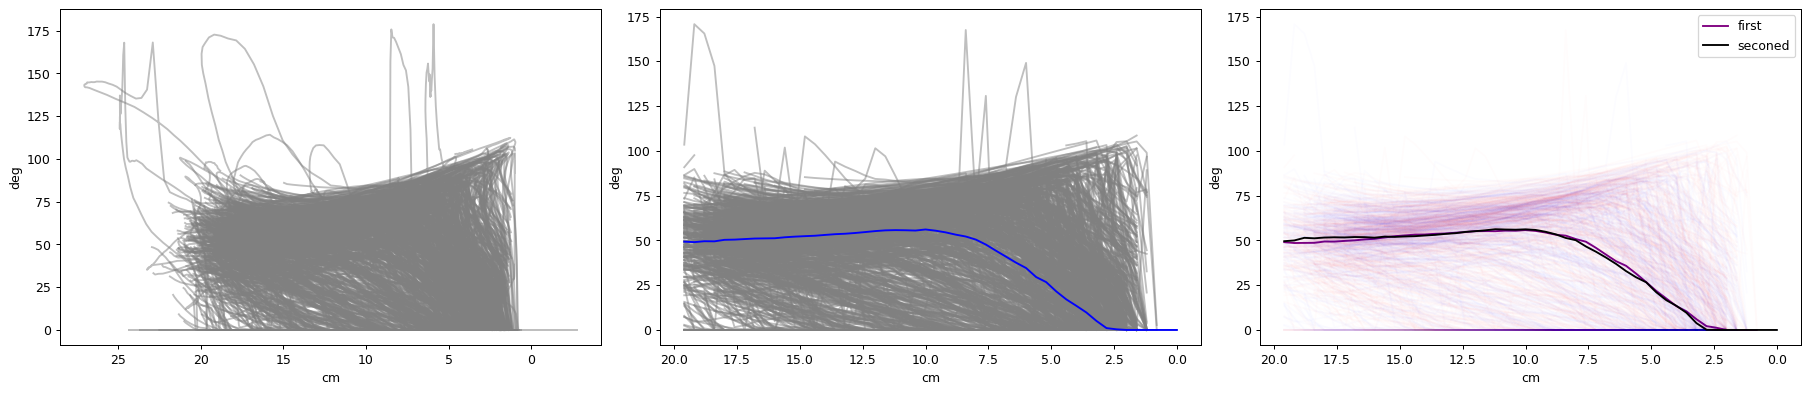

In [176]:
long_df = create_long_df(light_df)

fig = plt.figure(constrained_layout=False, figsize=(20, 8),dpi=90)
spec2 = gridspec.GridSpec(ncols=3, nrows=1, figure=fig)
panel_1 = gridspec.GridSpecFromSubplotSpec(2,1,subplot_spec=spec2[0])
panel_2 = gridspec.GridSpecFromSubplotSpec(2,1,subplot_spec=spec2[1])
panel_3 = gridspec.GridSpecFromSubplotSpec(2,1,subplot_spec=spec2[2])

ax1 = fig.add_subplot(panel_1[0,0])
ax2 = fig.add_subplot(panel_2[0,0])
ax3 = fig.add_subplot(panel_3[0,0])

ax1.set_ylabel('deg')
ax1.set_xlabel('cm')
ax2.set_ylabel('deg')
ax2.set_xlabel('cm')
ax3.set_ylabel('deg')
ax3.set_xlabel('cm')

for ind,row in long_df.iterrows():
    #length = int(row['len_facing_corner'])
    length = np.argwhere(row['distance_from_edge']>1).max()
    ax1.plot(row['distance_from_edge'][:length],row['zero_out_angle_to_corner'][:length],c = 'grey',alpha = .5)
ax1.invert_xaxis()
rows = long_df.shape[0]
angle_array = np.empty([rows,50])
angle_array[:] =np.nan 
distance_array = np.empty([rows,50])
distance_array[:] =np.nan 

for i,row in enumerate(long_df.iterrows()):
    
    #length = int(row[1]['len_facing_corner'])
    length = np.argwhere(row[1]['distance_from_edge']>1).max()
    interpolater = interp1d(row[1]['distance_from_edge'][:length],row[1]['zero_out_angle_to_corner'][:length],fill_value=np.nan,bounds_error=False)
    xnew =  np.arange(0, 20, .4)
    ynew = interpolater(xnew)
    distance_array[i] = xnew
    angle_array[i] = ynew
    ax2.plot(xnew,ynew,c = 'grey',alpha = .5)
ax2.invert_xaxis()
print(distance_array.shape,angle_array.shape)
ax2.plot(np.nanmedian(distance_array,axis = 0),np.nanmedian(angle_array,axis = 0),c = 'blue')
by_consecutive = long_df.groupby(['consecutive'])
for con,con_df in by_consecutive:
    if con == 1:
        first_df = con_df
    if con ==2:
        sec_df = con_df
rows = first_df.shape[0]
angle_array = np.empty([rows,50])
angle_array[:] =np.nan 
distance_array = np.empty([rows,50])
distance_array[:] =np.nan 
for i,row in enumerate(first_df.iterrows()):
    
    #length = int(row[1]['len_facing_corner'])
    length = np.argwhere(row[1]['distance_from_edge']>1).max()
    interpolater = interp1d(row[1]['distance_from_edge'][:length],row[1]['zero_out_angle_to_corner'][:length],fill_value=np.nan,bounds_error=False)
    xnew =  np.arange(0, 20, .4)
    ynew = interpolater(xnew)
    distance_array[i] = xnew
    angle_array[i] = ynew
    ax3.plot(xnew,ynew,c = 'red',alpha = .01)
ax3.plot(np.nanmedian(distance_array,axis = 0),np.nanmedian(angle_array,axis = 0),c = 'purple',label = 'first')
print(distance_array.shape,angle_array.shape)
rows = sec_df.shape[0]
angle_array_sec = np.empty([rows,50])
angle_array_sec[:] =np.nan 
distance_array_sec = np.empty([rows,50])
distance_array_sec[:] =np.nan 
for i,row in enumerate(sec_df.iterrows()):
    
    #length = int(row[1]['len_facing_corner'])
    length = np.argwhere(row[1]['distance_from_edge']>1).max()
    interpolater = interp1d(row[1]['distance_from_edge'][:length],row[1]['zero_out_angle_to_corner'][:length],fill_value=np.nan,bounds_error=False)
    xnew =  np.arange(0, 20, .4)
    ynew = interpolater(xnew)
    distance_array_sec[i] = xnew
    angle_array_sec[i] = ynew
    ax3.plot(xnew,ynew,c = 'blue',alpha = .01)
ax3.plot(np.nanmedian(distance_array_sec,axis = 0),np.nanmedian(angle_array_sec,axis = 0),c = 'black',label = 'seconed')
print(distance_array_sec.shape,angle_array_sec.shape)
ax3.invert_xaxis()
ax3.legend()

(573, 50) (573, 50)
(325, 50) (325, 50)
(248, 50) (248, 50)


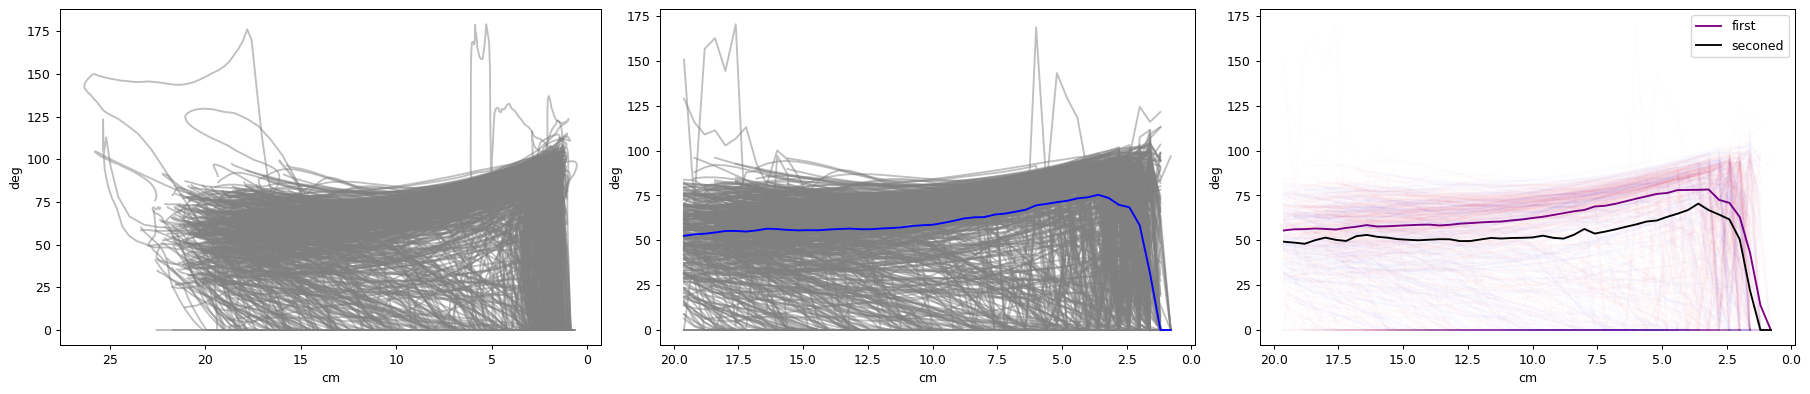

In [177]:
long_df = create_long_df(dark_df)

fig = plt.figure(constrained_layout=False, figsize=(20, 8),dpi=90)
spec2 = gridspec.GridSpec(ncols=3, nrows=1, figure=fig)
panel_1 = gridspec.GridSpecFromSubplotSpec(2,1,subplot_spec=spec2[0])
panel_2 = gridspec.GridSpecFromSubplotSpec(2,1,subplot_spec=spec2[1])
panel_3 = gridspec.GridSpecFromSubplotSpec(2,1,subplot_spec=spec2[2])

ax1 = fig.add_subplot(panel_1[0,0])
ax2 = fig.add_subplot(panel_2[0,0])
ax3 = fig.add_subplot(panel_3[0,0])

ax1.set_ylabel('deg')
ax1.set_xlabel('cm')
ax2.set_ylabel('deg')
ax2.set_xlabel('cm')
ax3.set_ylabel('deg')
ax3.set_xlabel('cm')

for ind,row in long_df.iterrows():
    #length = int(row['len_facing_corner'])
    length = np.argwhere(row['distance_from_edge']>1).max()
    ax1.plot(row['distance_from_edge'][:length],row['zero_out_angle_to_corner'][:length],c = 'grey',alpha = .5)
ax1.invert_xaxis()
rows = long_df.shape[0]
angle_array = np.empty([rows,50])
angle_array[:] =np.nan 
distance_array = np.empty([rows,50])
distance_array[:] =np.nan 

for i,row in enumerate(long_df.iterrows()):
    
    #length = int(row[1]['len_facing_corner'])
    length = np.argwhere(row[1]['distance_from_edge']>1).max()
    interpolater = interp1d(row[1]['distance_from_edge'][:length],row[1]['zero_out_angle_to_corner'][:length],fill_value=np.nan,bounds_error=False)
    xnew =  np.arange(0, 20, .4)
    ynew = interpolater(xnew)
    distance_array[i] = xnew
    angle_array[i] = ynew
    ax2.plot(xnew,ynew,c = 'grey',alpha = .5)
ax2.invert_xaxis()
print(distance_array.shape,angle_array.shape)
ax2.plot(np.nanmedian(distance_array,axis = 0),np.nanmedian(angle_array,axis = 0),c = 'blue')
by_consecutive = long_df.groupby(['consecutive'])
for con,con_df in by_consecutive:
    if con == 1:
        first_df = con_df
    if con ==2:
        sec_df = con_df
rows = first_df.shape[0]
angle_array = np.empty([rows,50])
angle_array[:] =np.nan 
distance_array = np.empty([rows,50])
distance_array[:] =np.nan 
for i,row in enumerate(first_df.iterrows()):
    
    #length = int(row[1]['len_facing_corner'])
    length = np.argwhere(row[1]['distance_from_edge']>1).max()
    interpolater = interp1d(row[1]['distance_from_edge'][:length],row[1]['zero_out_angle_to_corner'][:length],fill_value=np.nan,bounds_error=False)
    xnew =  np.arange(0, 20, .4)
    ynew = interpolater(xnew)
    distance_array[i] = xnew
    angle_array[i] = ynew
    ax3.plot(xnew,ynew,c = 'red',alpha = .01)
ax3.plot(np.nanmedian(distance_array,axis = 0),np.nanmedian(angle_array,axis = 0),c = 'purple',label = 'first')
print(distance_array.shape,angle_array.shape)
rows = sec_df.shape[0]
angle_array_sec = np.empty([rows,50])
angle_array_sec[:] =np.nan 
distance_array_sec = np.empty([rows,50])
distance_array_sec[:] =np.nan 
for i,row in enumerate(sec_df.iterrows()):
    
    #length = int(row[1]['len_facing_corner'])
    length = np.argwhere(row[1]['distance_from_edge']>1).max()
    interpolater = interp1d(row[1]['distance_from_edge'][:length],row[1]['zero_out_angle_to_corner'][:length],fill_value=np.nan,bounds_error=False)
    xnew =  np.arange(0, 20, .4)
    ynew = interpolater(xnew)
    distance_array_sec[i] = xnew
    angle_array_sec[i] = ynew
    ax3.plot(xnew,ynew,c = 'blue',alpha = .01)
ax3.plot(np.nanmedian(distance_array_sec,axis = 0),np.nanmedian(angle_array_sec,axis = 0),c = 'black',label = 'seconed')
print(distance_array_sec.shape,angle_array_sec.shape)
ax3.invert_xaxis()
ax3.legend()

KeyError: 'speed'

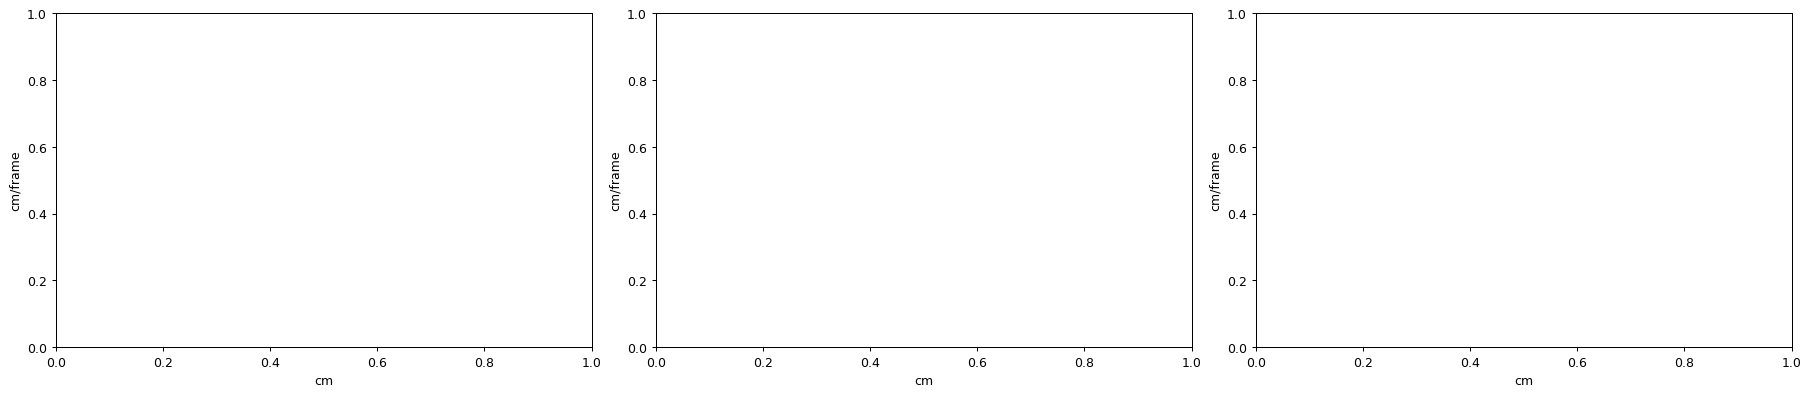

In [178]:
long_df = create_long_df(light_df)

fig = plt.figure(constrained_layout=False, figsize=(20, 8),dpi=90)
spec2 = gridspec.GridSpec(ncols=3, nrows=1, figure=fig)
panel_1 = gridspec.GridSpecFromSubplotSpec(2,1,subplot_spec=spec2[0])
panel_2 = gridspec.GridSpecFromSubplotSpec(2,1,subplot_spec=spec2[1])
panel_3 = gridspec.GridSpecFromSubplotSpec(2,1,subplot_spec=spec2[2])

ax1 = fig.add_subplot(panel_1[0,0])
ax2 = fig.add_subplot(panel_2[0,0])
ax3 = fig.add_subplot(panel_3[0,0])

ax1.set_ylabel('cm/frame')
ax1.set_xlabel('cm')
ax2.set_ylabel('cm/frame')
ax2.set_xlabel('cm')
ax3.set_ylabel('cm/frame')
ax3.set_xlabel('cm')

for ind,row in long_df.iterrows():
    #length = int(row['len_facing_corner'])
    length = np.argwhere(row['distance_from_edge']>2).max()
    ax1.plot(row['distance_from_edge'][:length],row['speed'][:length],c = 'grey',alpha = .5)
ax1.invert_xaxis()
rows = long_df.shape[0]
angle_array = np.empty([rows,50])
angle_array[:] =np.nan 
distance_array = np.empty([rows,50])
distance_array[:] =np.nan 

for i,row in enumerate(long_df.iterrows()):
    
    #length = int(row[1]['len_facing_corner'])
    length = np.argwhere(row[1]['distance_from_edge']>2).max()
    interpolater = interp1d(row[1]['distance_from_edge'][:length],row[1]['speed'][:length],fill_value=np.nan,bounds_error=False)
    xnew =  np.arange(2, 20, .36)
    ynew = interpolater(xnew)
    distance_array[i] = xnew
    angle_array[i] = ynew
    ax2.plot(xnew,ynew,c = 'grey',alpha = .5)
ax2.invert_xaxis()
print(distance_array.shape,angle_array.shape)
ax2.plot(np.nanmedian(distance_array,axis = 0),np.nanmedian(angle_array,axis = 0),c = 'blue')
by_consecutive = long_df.groupby(['consecutive'])
for con,con_df in by_consecutive:
    if con == 1:
        first_df = con_df
    if con ==2:
        sec_df = con_df
rows = first_df.shape[0]
angle_array = np.empty([rows,50])
angle_array[:] =np.nan 
distance_array = np.empty([rows,50])
distance_array[:] =np.nan 
for i,row in enumerate(first_df.iterrows()):
    
    #length = int(row[1]['len_facing_corner'])
    length = np.argwhere(row[1]['distance_from_edge']>2).max()
    interpolater = interp1d(row[1]['distance_from_edge'][:length],row[1]['speed'][:length],fill_value=np.nan,bounds_error=False)
    xnew =  np.arange(2, 20, .36)
    ynew = interpolater(xnew)
    distance_array[i] = xnew
    angle_array[i] = ynew
    ax3.plot(xnew,ynew,c = 'red',alpha = .01)
ax3.plot(np.nanmedian(distance_array,axis = 0),np.nanmedian(angle_array,axis = 0),c = 'purple',label = 'first')
print(distance_array.shape,angle_array.shape)
rows = sec_df.shape[0]
angle_array_sec = np.empty([rows,50])
angle_array_sec[:] =np.nan 
distance_array_sec = np.empty([rows,50])
distance_array_sec[:] =np.nan 
for i,row in enumerate(sec_df.iterrows()):
    
    #length = int(row[1]['len_facing_corner'])
    length = np.argwhere(row[1]['distance_from_edge']>2).max()
    interpolater = interp1d(row[1]['distance_from_edge'][:length],row[1]['speed'][:length],fill_value=np.nan,bounds_error=False)
    xnew =  np.arange(2, 20, .36)
    ynew = interpolater(xnew)
    distance_array_sec[i] = xnew
    angle_array_sec[i] = ynew
    ax3.plot(xnew,ynew,c = 'blue',alpha = .01)
ax3.plot(np.nanmedian(distance_array_sec,axis = 0),np.nanmedian(angle_array_sec,axis = 0),c = 'black',label = 'seconed')
print(distance_array_sec.shape,angle_array_sec.shape)
ax3.invert_xaxis()
ax3.legend()

(573, 50) (573, 50)
(325, 50) (325, 50)
(248, 50) (248, 50)


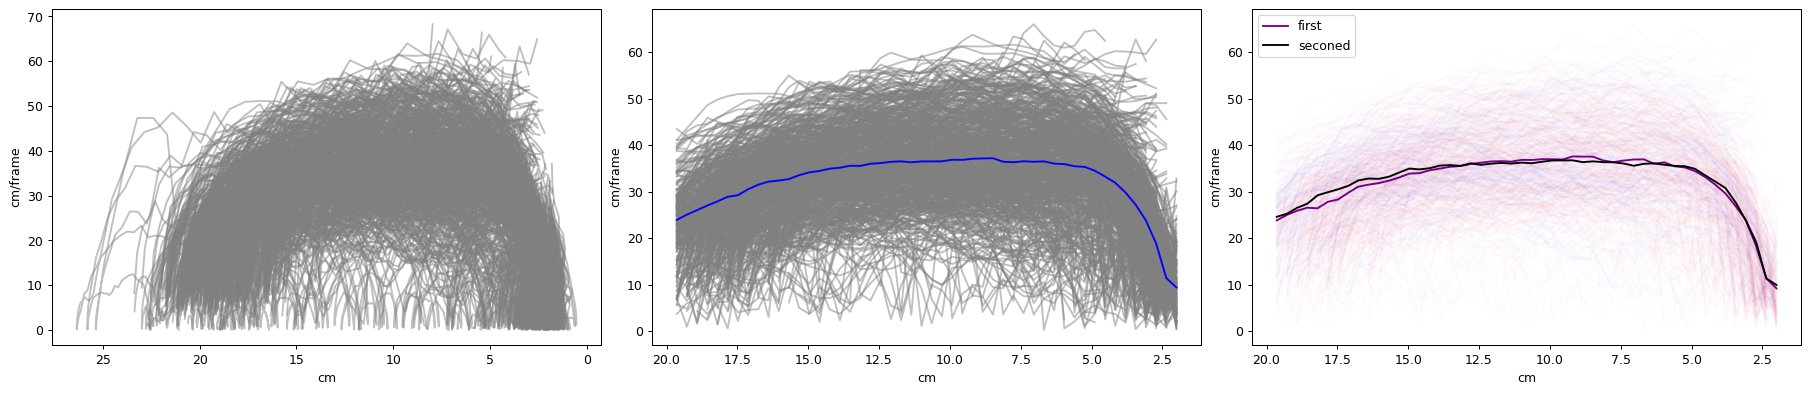

In [298]:
long_df = create_long_df(dark_df)

fig = plt.figure(constrained_layout=False, figsize=(20, 8),dpi=90)
spec2 = gridspec.GridSpec(ncols=3, nrows=1, figure=fig)
panel_1 = gridspec.GridSpecFromSubplotSpec(2,1,subplot_spec=spec2[0])
panel_2 = gridspec.GridSpecFromSubplotSpec(2,1,subplot_spec=spec2[1])
panel_3 = gridspec.GridSpecFromSubplotSpec(2,1,subplot_spec=spec2[2])

ax1 = fig.add_subplot(panel_1[0,0])
ax2 = fig.add_subplot(panel_2[0,0])
ax3 = fig.add_subplot(panel_3[0,0])

ax1.set_ylabel('cm/frame')
ax1.set_xlabel('cm')
ax2.set_ylabel('cm/frame')
ax2.set_xlabel('cm')
ax3.set_ylabel('cm/frame')
ax3.set_xlabel('cm')

for ind,row in long_df.iterrows():
    #length = int(row['len_facing_corner'])
    length = np.argwhere(row['distance_from_edge']>2).max()
    ax1.plot(row['distance_from_edge'][:length],row['ts_speed'][:length],c = 'grey',alpha = .5)
ax1.invert_xaxis()
rows = long_df.shape[0]
angle_array = np.empty([rows,50])
angle_array[:] =np.nan 
distance_array = np.empty([rows,50])
distance_array[:] =np.nan 

for i,row in enumerate(long_df.iterrows()):
    
    #length = int(row[1]['len_facing_corner'])
    length = np.argwhere(row[1]['distance_from_edge']>2).max()
    interpolater = interp1d(row[1]['distance_from_edge'][:length],row[1]['ts_speed'][:length],fill_value=np.nan,bounds_error=False)
    xnew =  np.arange(2, 20, .36)
    ynew = interpolater(xnew)
    distance_array[i] = xnew
    angle_array[i] = ynew
    ax2.plot(xnew,ynew,c = 'grey',alpha = .5)
ax2.invert_xaxis()
print(distance_array.shape,angle_array.shape)
ax2.plot(np.nanmedian(distance_array,axis = 0),np.nanmedian(angle_array,axis = 0),c = 'blue')
by_consecutive = long_df.groupby(['consecutive'])
for con,con_df in by_consecutive:
    if con == 1:
        first_df = con_df
    if con ==2:
        sec_df = con_df
rows = first_df.shape[0]
angle_array = np.empty([rows,50])
angle_array[:] =np.nan 
distance_array = np.empty([rows,50])
distance_array[:] =np.nan 
for i,row in enumerate(first_df.iterrows()):
    
    #length = int(row[1]['len_facing_corner'])
    length = np.argwhere(row[1]['distance_from_edge']>2).max()
    interpolater = interp1d(row[1]['distance_from_edge'][:length],row[1]['ts_speed'][:length],fill_value=np.nan,bounds_error=False)
    xnew =  np.arange(2, 20, .36)
    ynew = interpolater(xnew)
    distance_array[i] = xnew
    angle_array[i] = ynew
    ax3.plot(xnew,ynew,c = 'red',alpha = .01)
ax3.plot(np.nanmedian(distance_array,axis = 0),np.nanmedian(angle_array,axis = 0),c = 'purple',label = 'first')
print(distance_array.shape,angle_array.shape)
rows = sec_df.shape[0]
angle_array_sec = np.empty([rows,50])
angle_array_sec[:] =np.nan 
distance_array_sec = np.empty([rows,50])
distance_array_sec[:] =np.nan 
for i,row in enumerate(sec_df.iterrows()):
    
    #length = int(row[1]['len_facing_corner'])
    length = np.argwhere(row[1]['distance_from_edge']>2).max()
    interpolater = interp1d(row[1]['distance_from_edge'][:length],row[1]['ts_speed'][:length],fill_value=np.nan,bounds_error=False)
    xnew =  np.arange(2, 20, .36)
    ynew = interpolater(xnew)
    distance_array_sec[i] = xnew
    angle_array_sec[i] = ynew
    ax3.plot(xnew,ynew,c = 'blue',alpha = .01)
ax3.plot(np.nanmedian(distance_array_sec,axis = 0),np.nanmedian(angle_array_sec,axis = 0),c = 'black',label = 'seconed')
print(distance_array_sec.shape,angle_array_sec.shape)
ax3.invert_xaxis()
ax3.legend()

In [300]:
long_df = create_long_df(light_df)
for ind,row in long_df.iterrows():
    target =  np.argwhere((-1< row['distance_from_edge']) ).max()
    tor,lin= compute_tortuosity(row['ts_nose_x_cm'][:target+1],row['ts_nose_y_cm'][:target+1])
    long_df.at[ind,'tortuosity']=tor
    long_df.at[ind,'linearity']=lin

In [301]:
dark_long_df = create_long_df(dark_df)
for ind,row in dark_long_df.iterrows():
    target =  np.argwhere((-1< row['distance_from_edge']) ).max()
    tor,lin= compute_tortuosity(row['ts_nose_x_cm'][:target+1],row['ts_nose_y_cm'][:target+1])
    dark_long_df.at[ind,'tortuosity']=tor
    dark_long_df.at[ind,'linearity']=lin

In [303]:
print(long_df.tortuosity.mean(),dark_long_df.tortuosity.mean())
print(long_df.linearity.mean(),dark_long_df.linearity.mean())

1.2076560438626767 1.3104881499747316
0.8487213716878516 0.7863701654221893


In [305]:
long_df.tortuosity

15      1.487454
33      1.325652
35      1.276777
45      1.020855
47      1.003180
          ...   
3823    1.152628
3860    1.007757
3942    1.004716
3950    1.011172
3973    1.408652
Name: tortuosity, Length: 874, dtype: float64

In [321]:
dark.rename(columns = {'tortuosity':'light'})

light
0    1.264674
1    1.332999
2    1.097872
3    1.529001
4    1.257388
..        ...
568  1.422382
569  1.510221
570  1.597962
571  1.388918
572  1.078334

[573 rows x 1 columns]

In [340]:
reject_outliers(light['light'],m=2)

1      1.325652
2      1.276777
3      1.020855
4      1.003180
5      1.282325
         ...   
868    1.040884
869    1.152628
870    1.007757
871    1.004716
872    1.011172
Name: light, Length: 744, dtype: float64

In [ ]:
eject_outliers(dark_df['time'][(dark_df['obstacle_cluster']==cluster)  & (dark_df['odd']== direction) & (dark_df['start']== start)],m=1)

In [109]:
long_df

level_0  index    first_poke   second_poke  \
15         16     17  53254.613145  53256.952128   
33         39     41  53313.989644  53316.283686   
35         41     43  53319.036377  53321.383539   
45         56     61  53363.793049  53366.119680   
47         58     63  53368.659430  53370.916556   
...       ...    ...           ...           ...   
3823        4      6  56069.835993  56073.366937   
3860       45     50  56215.313689  56218.250880   
3942      137    150  56526.595417  56529.200768   
3950      145    160  56557.064166  56559.951987   
3973        7     13  57041.859008  57044.935270   

                                       trial_timestamps  \
15    [53254.617344, 53254.63488, 53254.650662, 5325...   
33    [53314.005196, 53314.021644, 53314.037952, 533...   
35    [53319.03959, 53319.056537, 53319.073075, 5331...   
45    [53363.805094, 53363.821772, 53363.838489, 533...   
47    [53368.673536, 53368.69111, 53368.706803, 5336...   
...                                                 ...   
3823  [56069.844505, 56069.86222, 56069.877875, 5606...   
3860  [56215.328409, 56215.345523, 56215.363084, 562...   
3942  [56526.603148, 56526.61984, 56526.636633, 5652...   
3950  [56557.080934, 56557.097254, 56557.113779, 565...   
3973  [57041.874124, 57041.890342, 57041.906931, 570...   

                                        trial_vidframes  \
15    [[3046, 3047, 3048, 3049, 3050, 3051, 3052, 30...   
33    [[6608, 6609, 6610, 6611, 6612, 6613, 6614, 66...   
35    [[6910, 6911, 6912, 6913, 6914, 6915, 6916, 69...   
45    [[9595, 9596, 9597, 9598, 9599, 9600, 9601, 96...   
47    [[9887, 9888, 9889, 9890, 9891, 9892, 9893, 98...   
...                                                 ...   
3823  [1702, 1703, 1704, 1705, 1706, 1707, 1708, 170...   
3860  [10428, 10429, 10430, 10431, 10432, 10433, 104...   
3942  [29098, 29099, 29100, 29101, 29102, 29103, 291...   
3950  [30926, 30927, 30928, 30929, 30930, 30931, 309...   
3973  [3693, 3694, 3695, 3696, 3697, 3698, 3699, 370...   

                                                 nose_x  \
15    [nan, nan, nan, nan, nan, nan, nan, nan, nan, ...   
33    [nan, nan, nan, nan, nan, nan, nan, nan, nan, ...   
35    [nan, nan, nan, nan, nan, nan, nan, nan, nan, ...   
45    [nan, nan, nan, nan, nan, nan, nan, nan, nan, ...   
47    [nan, nan, nan, nan, nan, nan, nan, nan, nan, ...   
...                                                 ...   
3823  [88.99079132080078, 88.86106872558594, 89.6174...   
3860  [89.77569580078125, 89.28216552734375, 89.3076...   
3942  [90.00463104248047, 89.25779724121094, 89.2131...   
3950  [88.9548568725586, 88.80934143066406, 88.71128...   
3973  [91.15277862548828, 90.50054168701172, 90.8794...   

                                                 nose_y  \
15    [nan, nan, nan, nan, nan, nan, nan, nan, nan, ...   
33    [nan, nan, nan, nan, nan, nan, nan, nan, nan, ...   
35    [nan, nan, nan, nan, nan, nan, nan, nan, nan, ...   
45    [nan, nan, nan, nan, nan, nan, nan, nan, nan, ...   
47    [nan, nan, nan, nan, nan, nan, nan, nan, nan, ...   
...                                                 ...   
3823  [259.3994445800781, 260.13232421875, 260.66830...   
3860  [260.3761291503906, 260.0107727050781, 259.649...   
3942  [260.19158935546875, 260.1805114746094, 260.24...   
3950  [259.7483215332031, 260.32177734375, 261.15960...   
3973  [266.4710388183594, 266.0921630859375, 266.454...   

                                              leftear_x  \
15    [678.582275390625, 679.883056640625, 680.53289...   
33    [679.5838623046875, 680.9609985351562, 681.452...   
35    [680.60107421875, 682.1679077148438, 682.99499...   
45    [683.1581420898438, 684.21337890625, 684.04870...   
47    [681.9724731445312, 682.2361450195312, 682.795...   
...                                                 ...   
3823  [105.51414489746094, 104.71525573730469, 104.2...   
3860  [103.46563720703125, 102.87943267822266, 102.2...   
3942  [106.482

In [204]:
long_df = create_long_df(light_df)
dark_long_df = create_long_df(dark_df)

In [121]:
long_df

level_0  index    first_poke   second_poke  \
15         16     17  53254.613145  53256.952128   
33         39     41  53313.989644  53316.283686   
35         41     43  53319.036377  53321.383539   
45         56     61  53363.793049  53366.119680   
47         58     63  53368.659430  53370.916556   
...       ...    ...           ...           ...   
3823        4      6  56069.835993  56073.366937   
3860       45     50  56215.313689  56218.250880   
3942      137    150  56526.595417  56529.200768   
3950      145    160  56557.064166  56559.951987   
3973        7     13  57041.859008  57044.935270   

                                       trial_timestamps  \
15    [53254.617344, 53254.63488, 53254.650662, 5325...   
33    [53314.005196, 53314.021644, 53314.037952, 533...   
35    [53319.03959, 53319.056537, 53319.073075, 5331...   
45    [53363.805094, 53363.821772, 53363.838489, 533...   
47    [53368.673536, 53368.69111, 53368.706803, 5336...   
...                                                 ...   
3823  [56069.844505, 56069.86222, 56069.877875, 5606...   
3860  [56215.328409, 56215.345523, 56215.363084, 562...   
3942  [56526.603148, 56526.61984, 56526.636633, 5652...   
3950  [56557.080934, 56557.097254, 56557.113779, 565...   
3973  [57041.874124, 57041.890342, 57041.906931, 570...   

                                        trial_vidframes  \
15    [[3046, 3047, 3048, 3049, 3050, 3051, 3052, 30...   
33    [[6608, 6609, 6610, 6611, 6612, 6613, 6614, 66...   
35    [[6910, 6911, 6912, 6913, 6914, 6915, 6916, 69...   
45    [[9595, 9596, 9597, 9598, 9599, 9600, 9601, 96...   
47    [[9887, 9888, 9889, 9890, 9891, 9892, 9893, 98...   
...                                                 ...   
3823  [1702, 1703, 1704, 1705, 1706, 1707, 1708, 170...   
3860  [10428, 10429, 10430, 10431, 10432, 10433, 104...   
3942  [29098, 29099, 29100, 29101, 29102, 29103, 291...   
3950  [30926, 30927, 30928, 30929, 30930, 30931, 309...   
3973  [3693, 3694, 3695, 3696, 3697, 3698, 3699, 370...   

                                                 nose_x  \
15    [nan, nan, nan, nan, nan, nan, nan, nan, nan, ...   
33    [nan, nan, nan, nan, nan, nan, nan, nan, nan, ...   
35    [nan, nan, nan, nan, nan, nan, nan, nan, nan, ...   
45    [nan, nan, nan, nan, nan, nan, nan, nan, nan, ...   
47    [nan, nan, nan, nan, nan, nan, nan, nan, nan, ...   
...                                                 ...   
3823  [88.99079132080078, 88.86106872558594, 89.6174...   
3860  [89.77569580078125, 89.28216552734375, 89.3076...   
3942  [90.00463104248047, 89.25779724121094, 89.2131...   
3950  [88.9548568725586, 88.80934143066406, 88.71128...   
3973  [91.15277862548828, 90.50054168701172, 90.8794...   

                                                 nose_y  \
15    [nan, nan, nan, nan, nan, nan, nan, nan, nan, ...   
33    [nan, nan, nan, nan, nan, nan, nan, nan, nan, ...   
35    [nan, nan, nan, nan, nan, nan, nan, nan, nan, ...   
45    [nan, nan, nan, nan, nan, nan, nan, nan, nan, ...   
47    [nan, nan, nan, nan, nan, nan, nan, nan, nan, ...   
...                                                 ...   
3823  [259.3994445800781, 260.13232421875, 260.66830...   
3860  [260.3761291503906, 260.0107727050781, 259.649...   
3942  [260.19158935546875, 260.1805114746094, 260.24...   
3950  [259.7483215332031, 260.32177734375, 261.15960...   
3973  [266.4710388183594, 266.0921630859375, 266.454...   

                                              leftear_x  \
15    [678.582275390625, 679.883056640625, 680.53289...   
33    [679.5838623046875, 680.9609985351562, 681.452...   
35    [680.60107421875, 682.1679077148438, 682.99499...   
45    [683.1581420898438, 684.21337890625, 684.04870...   
47    [681.9724731445312, 682.2361450195312, 682.795...   
...                                                 ...   
3823  [105.51414489746094, 104.71525573730469, 104.2...   
3860  [103.46563720703125, 102.87943267822266, 102.2...   
3942  [106.482

In [218]:
light = pd.DataFrame(long_df.tortuosity.reset_index(level=0,drop = True))
light = light.rename(columns = {'tortuosity':'light'})
light = reject_outliers(light['light'],m=1.5)
dark = pd.DataFrame(dark_long_df.tortuosity.reset_index(level=0,drop = True))
dark = dark.rename(columns = {'tortuosity':'dark'})
dark = reject_outliers(dark['dark'],m=1.5)
tor_df = pd.concat([light, dark], axis=1)


In [213]:
pd.DataFrame(long_df.tortuosity.reset_index(level=0,drop = True))

tortuosity
0      1.487454
1      1.325652
2      1.276777
3      1.020855
4      1.003180
..          ...
869    1.152628
870    1.007757
871    1.004716
872    1.011172
873    1.408652

[874 rows x 1 columns]

In [214]:
tor_df

light      dark
2    1.276777       NaN
3    1.020855       NaN
5    1.282325       NaN
6    1.068943       NaN
7    1.225797       NaN
..        ...       ...
514       NaN  1.415054
532       NaN  1.413232
540       NaN  1.196489
546       NaN  1.312519
565       NaN  1.325345

[712 rows x 2 columns]

Text(0, 0.5, 'spatial efficiency')

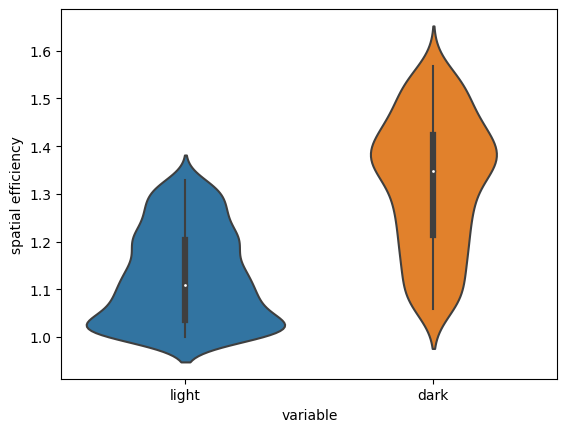

In [219]:
fig,ax = plt.subplots()
sns.violinplot(x="variable", y="value", data=tor_df.melt(),ax = ax)
ax.set_ylabel('spatial efficiency')

In [220]:
light = pd.DataFrame(long_df.linearity.reset_index(level=0,drop = True))
light = light.rename(columns = {'linearity':'light'})
light = reject_outliers(light['light'],m=1.5)
dark = pd.DataFrame(dark_long_df.linearity.reset_index(level=0,drop = True))
dark = dark.rename(columns = {'linearity':'dark'})
dark = reject_outliers(dark['dark'],m=1.5)
tor_df = pd.concat([light, dark], axis=1)

Text(0, 0.5, 'linearity')

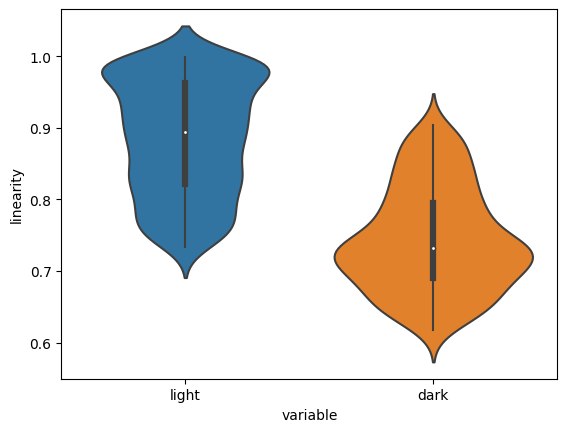

In [221]:
fig,ax = plt.subplots()
sns.violinplot(x="variable", y="value", data=tor_df.melt(),ax = ax)
ax.set_ylabel('linearity')

(573, 50) (573, 50)
nan
(325, 50) (325, 50)
(248, 50) (248, 50)


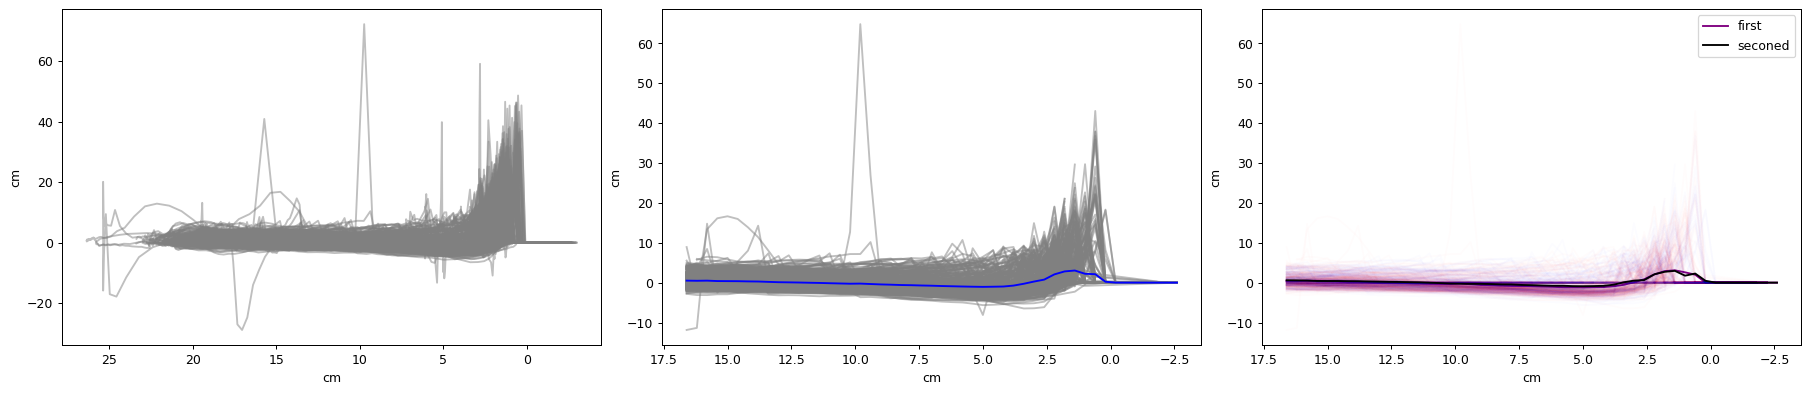

In [432]:
long_df = create_long_df(dark_df)


fig = plt.figure(constrained_layout=False, figsize=(20, 8),dpi=90)
spec2 = gridspec.GridSpec(ncols=3, nrows=1, figure=fig)
panel_1 = gridspec.GridSpecFromSubplotSpec(2,1,subplot_spec=spec2[0])
panel_2 = gridspec.GridSpecFromSubplotSpec(2,1,subplot_spec=spec2[1])
panel_3 = gridspec.GridSpecFromSubplotSpec(2,1,subplot_spec=spec2[2])

ax1 = fig.add_subplot(panel_1[0,0])
ax2 = fig.add_subplot(panel_2[0,0])
ax3 = fig.add_subplot(panel_3[0,0])

ax1.set_ylabel('cm')
ax1.set_xlabel('cm')
ax2.set_ylabel('cm')
ax2.set_xlabel('cm')
ax3.set_ylabel('cm')
ax3.set_xlabel('cm')

for ind,row in long_df.iterrows():
    #length = int(row['len_facing_corner'])
    length = np.argwhere(row['distance_from_edge']>-3).max()
    ax1.plot(row['distance_from_edge'][:length],row['turning_rate'][:length],c = 'grey',alpha = .5)
ax1.invert_xaxis()
rows = long_df.shape[0]
angle_array = np.empty([rows,50])
angle_array[:] =np.nan 
distance_array = np.empty([rows,50])
distance_array[:] =np.nan 

for i,row in enumerate(long_df.iterrows()):
    
    #length = int(row[1]['len_facing_corner'])
    length = np.argwhere(row[1]['distance_from_edge']>-3).max()
    interpolater = interp1d(row[1]['distance_from_edge'][:length],row[1]['turning_rate'][:length],fill_value=np.nan,bounds_error=False)
    xnew =  np.arange(-3, 17, .4)
    ynew = interpolater(xnew)
    distance_array[i] = xnew
    angle_array[i] = ynew
    ax2.plot(xnew,ynew,c = 'grey',alpha = .5)
ax2.invert_xaxis()
print(distance_array.shape,angle_array.shape)
ax2.plot(np.nanmean(distance_array,axis = 0),np.nanmean(angle_array,axis = 0),c = 'blue')
print(np.nanmean(angle_array,axis = 0).max())
by_consecutive = long_df.groupby(['consecutive'])
for con,con_df in by_consecutive:
    if con == 1:
        first_df = con_df
    if con ==2:
        sec_df = con_df
rows = first_df.shape[0]
angle_array = np.empty([rows,50])
angle_array[:] =np.nan 
distance_array = np.empty([rows,50])
distance_array[:] =np.nan 
for i,row in enumerate(first_df.iterrows()):
    
    #length = int(row[1]['len_facing_corner'])
    length = np.argwhere(row[1]['distance_from_edge']>-3).max()
    interpolater = interp1d(row[1]['distance_from_edge'][:length],row[1]['turning_rate'][:length],fill_value=np.nan,bounds_error=False)
    xnew =  np.arange(-3, 17, .4)
    ynew = interpolater(xnew)
    distance_array[i] = xnew
    angle_array[i] = ynew
    ax3.plot(xnew,ynew,c = 'red',alpha = .01)
ax3.plot(np.nanmean(distance_array,axis = 0),np.nanmean(angle_array,axis = 0),c = 'purple',label = 'first')
print(distance_array.shape,angle_array.shape)
rows = sec_df.shape[0]
angle_array_sec = np.empty([rows,50])
angle_array_sec[:] =np.nan 
distance_array_sec = np.empty([rows,50])
distance_array_sec[:] =np.nan 
for i,row in enumerate(sec_df.iterrows()):
    
    #length = int(row[1]['len_facing_corner'])
    length = np.argwhere(row[1]['distance_from_edge']>-3).max()
    interpolater = interp1d(row[1]['distance_from_edge'][:length],row[1]['turning_rate'][:length],fill_value=np.nan,bounds_error=False)
    xnew =  np.arange(-3, 17, .4)
    ynew = interpolater(xnew)
    distance_array_sec[i] = xnew
    angle_array_sec[i] = ynew
    ax3.plot(xnew,ynew,c = 'blue',alpha = .01)
ax3.plot(np.nanmean(distance_array_sec,axis = 0),np.nanmean(angle_array_sec,axis = 0),c = 'black',label = 'seconed')
print(distance_array_sec.shape,angle_array_sec.shape)
ax3.invert_xaxis()
ax3.legend()
#symmetrize_y_axis(ax1)
#symmetrize_y_axis(ax2)

In [448]:
row

(15,
 level_0                                                                 16
 index                                                                   17
 first_poke                                                    53254.613145
 second_poke                                                   53256.952128
 trial_timestamps         [53254.617344, 53254.63488, 53254.650662, 5325...
                                                ...                        
 ts_nose_x_cm_10          [37.93532744240241, 37.1979191085327, 36.52301...
 ts_nose_y_cm_10          [13.242824502174471, 12.940325058385657, 12.67...
 thresh_ind_through_10    [16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 2...
 angle_to_target_port     [36.227566124679896, 35.028942215355045, 34.37...
 turning_rate             [1.0576366822835581, 0.3703675904543289, -0.76...
 Name: 15, Length: 194, dtype: object)

In [450]:
row[1]['zero_out_angle_to_corner']

array([47.45742955930961, 46.39979287702605, 46.02942528657172,
       46.79941636648298, 46.622889754531656, 46.78893568706501,
       47.581037828501216, 48.96930553741149, 50.761691490656005,
       53.22664706970879, 55.60653742732644, 58.432616427785604,
       61.13644206999695, 64.16489021157741, 67.26625489430167,
       70.3845256919546, 73.64456051550333, 76.6613834626682,
       79.52055761255268, 82.17193305577199, 84.200865962576,
       85.87686070978847, 86.93556778131509, 87.66065008418529,
       87.7721186308142, 86.99720644761027, 85.77714383486983,
       84.07184571923302, 82.31692407294211, 80.4970515406258,
       78.51389559171513, 77.01694220657907, 75.67238937762389,
       74.49608972731168, 73.36166544463461, 72.24435010952425,
       71.38511763079013, 70.67598201818748, 68.95837666092534,
       67.6477312507188, 65.48922193159267, nan, nan, nan, nan,
       50.36047349794925, 46.419176825355045, 42.1964774005249,
       37.06466266739396, 31.2658280450590

In [443]:
row['zero_out_angle_to_corner'][:-1][row['zero_out_angle_to_corner'][:-1].nonzero()]

TypeError: tuple indices must be integers or slices, not str

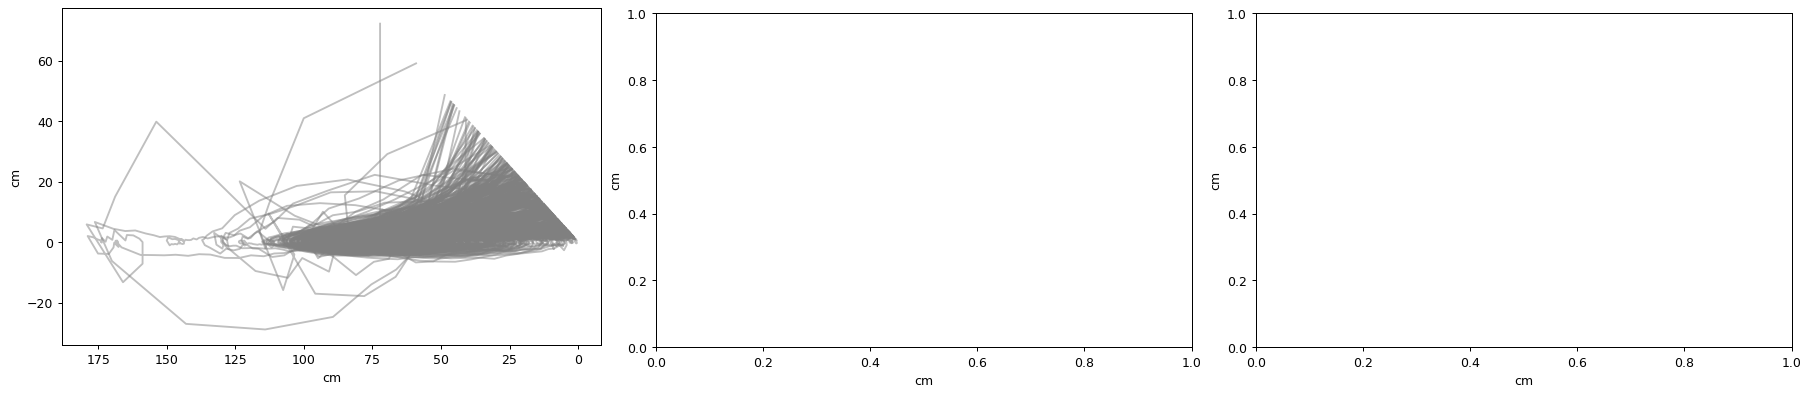

In [455]:
long_df = create_long_df(dark_df)


fig = plt.figure(constrained_layout=False, figsize=(20, 8),dpi=90)
spec2 = gridspec.GridSpec(ncols=3, nrows=1, figure=fig)
panel_1 = gridspec.GridSpecFromSubplotSpec(2,1,subplot_spec=spec2[0])
panel_2 = gridspec.GridSpecFromSubplotSpec(2,1,subplot_spec=spec2[1])
panel_3 = gridspec.GridSpecFromSubplotSpec(2,1,subplot_spec=spec2[2])

ax1 = fig.add_subplot(panel_1[0,0])
ax2 = fig.add_subplot(panel_2[0,0])
ax3 = fig.add_subplot(panel_3[0,0])

ax1.set_ylabel('cm')
ax1.set_xlabel('cm')
ax2.set_ylabel('cm')
ax2.set_xlabel('cm')
ax3.set_ylabel('cm')
ax3.set_xlabel('cm')

for ind,row in long_df.iterrows():
    #length = int(row['len_facing_corner'])
    try:
        length = np.argwhere(row['zero_out_angle_to_corner']>0).max()
        ax1.plot(row['zero_out_angle_to_corner'][:-1][row['zero_out_angle_to_corner'][:-1].nonzero()],row['turning_rate'][row['turning_rate'].nonzero()],c = 'grey',alpha = .5)
    except:
        continue
ax1.invert_xaxis()

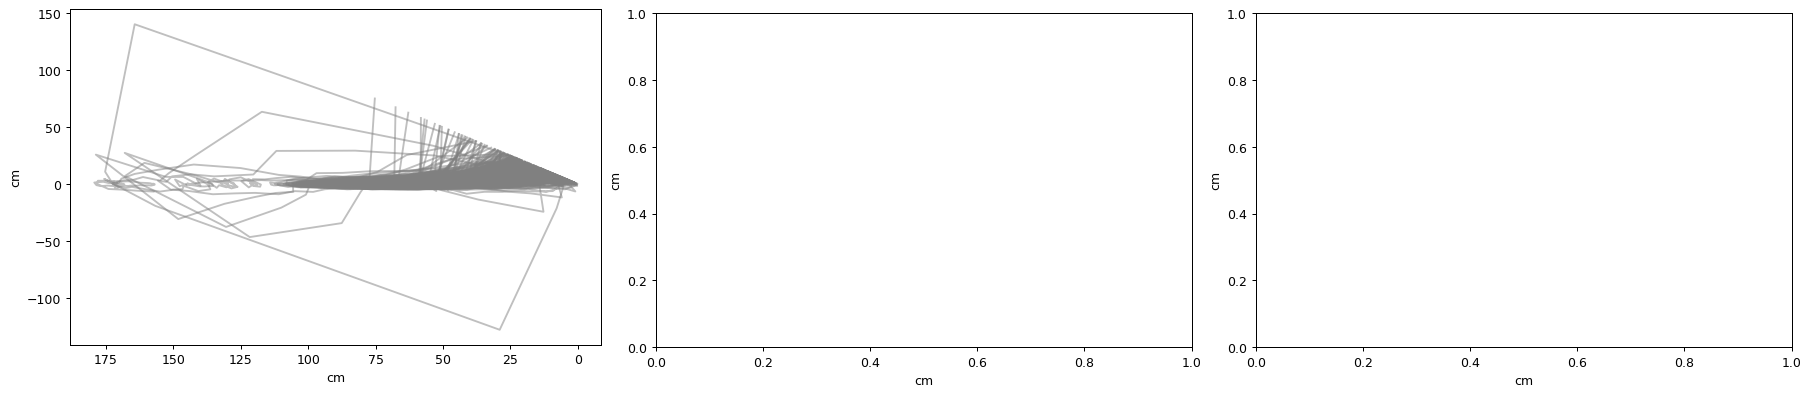

In [454]:
long_df = create_long_df(light_df)


fig = plt.figure(constrained_layout=False, figsize=(20, 8),dpi=90)
spec2 = gridspec.GridSpec(ncols=3, nrows=1, figure=fig)
panel_1 = gridspec.GridSpecFromSubplotSpec(2,1,subplot_spec=spec2[0])
panel_2 = gridspec.GridSpecFromSubplotSpec(2,1,subplot_spec=spec2[1])
panel_3 = gridspec.GridSpecFromSubplotSpec(2,1,subplot_spec=spec2[2])

ax1 = fig.add_subplot(panel_1[0,0])
ax2 = fig.add_subplot(panel_2[0,0])
ax3 = fig.add_subplot(panel_3[0,0])

ax1.set_ylabel('cm')
ax1.set_xlabel('cm')
ax2.set_ylabel('cm')
ax2.set_xlabel('cm')
ax3.set_ylabel('cm')
ax3.set_xlabel('cm')

for ind,row in long_df.iterrows():
    #length = int(row['len_facing_corner'])
    try:
        length = np.argwhere(row['zero_out_angle_to_corner']>0).max()
        ax1.plot(row['zero_out_angle_to_corner'][:-1][row['zero_out_angle_to_corner'][:-1].nonzero()],row['turning_rate'][row['turning_rate'].nonzero()],c = 'grey',alpha = .5)
    except:
        continue
ax1.invert_xaxis()

ValueError: could not broadcast input array from shape (43,) into shape (50,)

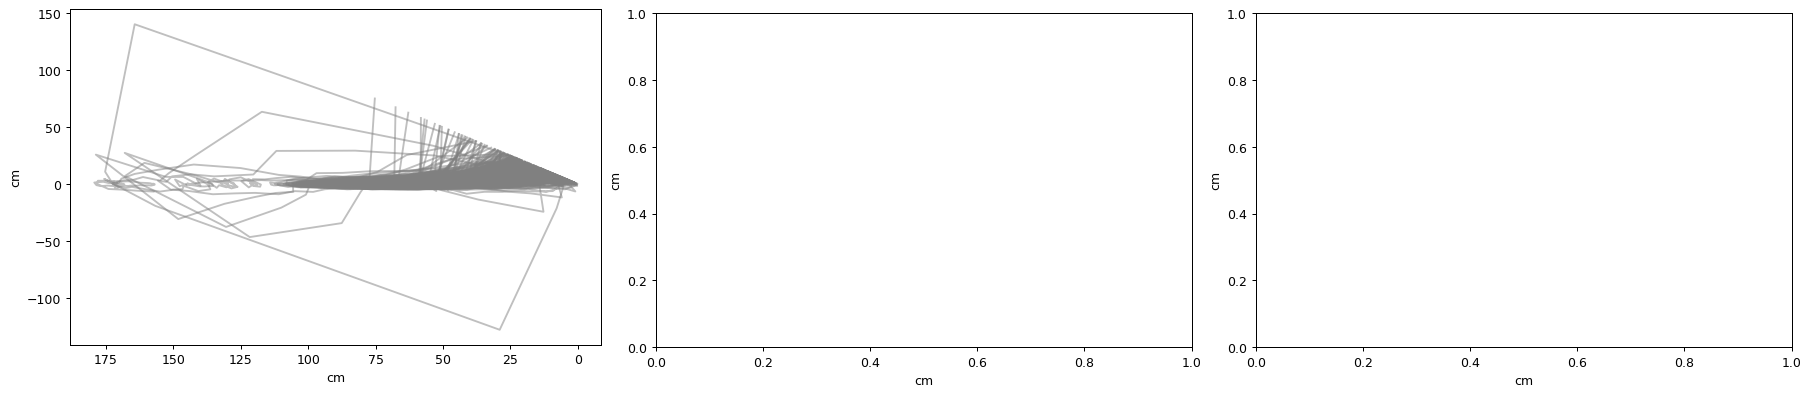

In [442]:
long_df = create_long_df(light_df)


fig = plt.figure(constrained_layout=False, figsize=(20, 8),dpi=90)
spec2 = gridspec.GridSpec(ncols=3, nrows=1, figure=fig)
panel_1 = gridspec.GridSpecFromSubplotSpec(2,1,subplot_spec=spec2[0])
panel_2 = gridspec.GridSpecFromSubplotSpec(2,1,subplot_spec=spec2[1])
panel_3 = gridspec.GridSpecFromSubplotSpec(2,1,subplot_spec=spec2[2])

ax1 = fig.add_subplot(panel_1[0,0])
ax2 = fig.add_subplot(panel_2[0,0])
ax3 = fig.add_subplot(panel_3[0,0])

ax1.set_ylabel('cm')
ax1.set_xlabel('cm')
ax2.set_ylabel('cm')
ax2.set_xlabel('cm')
ax3.set_ylabel('cm')
ax3.set_xlabel('cm')

for ind,row in long_df.iterrows():
    #length = int(row['len_facing_corner'])
    try:
        length = np.argwhere(row['zero_out_angle_to_corner']>0).max()
        ax1.plot(row['zero_out_angle_to_corner'][:-1][row['zero_out_angle_to_corner'][:-1].nonzero()],row['turning_rate'][row['turning_rate'].nonzero()],c = 'grey',alpha = .5)
    except:
        continue
ax1.invert_xaxis()
rows = long_df.shape[0]
angle_array = np.empty([rows,50])
angle_array[:] =np.nan 
distance_array = np.empty([rows,50])
distance_array[:] =np.nan 

for i,row in enumerate(long_df.iterrows()):
    
    #length = int(row[1]['len_facing_corner'])
    length = np.argwhere(row[1]['zero_out_angle_to_corner']>0).max()
    interpolater = interp1d(row[1]['zero_out_angle_to_corner'][:length],row[1]['turning_rate'][:length],fill_value=np.nan,bounds_error=False)
    xnew =  np.arange(0, 17, .4)
    ynew = interpolater(xnew)
    distance_array[i] = xnew
    angle_array[i] = ynew
    ax2.plot(xnew,ynew,c = 'grey',alpha = .5)
ax2.invert_xaxis()
print(distance_array.shape,angle_array.shape)
ax2.plot(np.nanmean(distance_array,axis = 0),np.nanmean(angle_array,axis = 0),c = 'blue')
print(np.nanmean(angle_array,axis = 0).max())
by_consecutive = long_df.groupby(['consecutive'])
for con,con_df in by_consecutive:
    if con == 1:
        first_df = con_df
    if con ==2:
        sec_df = con_df
rows = first_df.shape[0]
angle_array = np.empty([rows,50])
angle_array[:] =np.nan 
distance_array = np.empty([rows,50])
distance_array[:] =np.nan 
for i,row in enumerate(first_df.iterrows()):
    
    #length = int(row[1]['len_facing_corner'])
    length = np.argwhere(row[1]['zero_out_angle_to_corner']>0).max()
    interpolater = interp1d(row[1]['zero_out_angle_to_corner'][:length],row[1]['turning_rate'][:length],fill_value=np.nan,bounds_error=False)
    xnew =  np.arange(0, 17, .4)
    ynew = interpolater(xnew)
    distance_array[i] = xnew
    angle_array[i] = ynew
    ax3.plot(xnew,ynew,c = 'red',alpha = .01)
ax3.plot(np.nanmean(distance_array,axis = 0),np.nanmean(angle_array,axis = 0),c = 'purple',label = 'first')
print(distance_array.shape,angle_array.shape)
rows = sec_df.shape[0]
angle_array_sec = np.empty([rows,50])
angle_array_sec[:] =np.nan 
distance_array_sec = np.empty([rows,50])
distance_array_sec[:] =np.nan 
for i,row in enumerate(sec_df.iterrows()):
    
    #length = int(row[1]['len_facing_corner'])
    length = np.argwhere(row[1]['zero_out_angle_to_corner']>0).max()
    interpolater = interp1d(row[1]['zero_out_angle_to_corner'][:length],row[1]['turning_rate'][:length],fill_value=np.nan,bounds_error=False)
    xnew =  np.arange(0, 17, .4)
    ynew = interpolater(xnew)
    distance_array_sec[i] = xnew
    angle_array_sec[i] = ynew
    ax3.plot(xnew,ynew,c = 'blue',alpha = .01)
ax3.plot(np.nanmean(distance_array_sec,axis = 0),np.nanmean(angle_array_sec,axis = 0),c = 'black',label = 'seconed')
print(distance_array_sec.shape,angle_array_sec.shape)
ax3.invert_xaxis()
ax3.legend()


In [437]:
row

level_0                                                                 99
index                                                                  104
first_poke                                                    44110.941926
second_poke                                                   44114.911334
trial_timestamps         [44110.948096, 44110.965068, 44110.981798, 441...
                                               ...                        
ts_nose_x_cm_10          [22.780503443467495, 23.666857091090733, 24.59...
ts_nose_y_cm_10          [29.38193294047797, 29.384306429610376, 29.366...
thresh_ind_through_10    [142, 143, 144, 145, 146, 147, 148, 149, 150, ...
angle_to_target_port     [47.59913293930349, 48.11832430302885, 48.1395...
turning_rate             [-0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0....
Name: 1205, Length: 194, dtype: object

In [436]:
row['zero_out_angle_to_corner']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=object)

In [435]:
row['zero_out_angle_to_corner']>0

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [363]:
test = create_long_df(light_df).sample(1)
angle = test.angle_to_corner.item()
turning_rate = np.diff(angle)*-1

In [364]:
turning_rate

array([0.6506835961896513, 0.30052326628336345, -0.13711901518525593,
       -0.5577942447564936, -0.3212781021584945, -0.5762800751227104,
       -0.9038186049069026, -0.6511389732858959, -0.30486768650807505,
       0.22664607652301783, 0.0411300868723643, 0.4159107452843003,
       0.67917204384635, 0.9152261522647009, 0.9649840048389322,
       1.1070277025536228, 1.152862286480591, 1.3371495333001207,
       1.1119733800130476, 1.2727654171622476, 0.9460353510784003,
       1.1835047418763764, 1.560786740389986, 2.0501842772556884,
       1.9480021137573331, 2.0134374047470907, 1.8274007678112625,
       1.8644227643535949, 2.3211322643938743, 2.5554274445792693,
       3.136094373291936, 3.3960871657613154, 3.997115108910087,
       4.3624497003250795, 5.1487751238177974, -0.5802184075165355,
       -9.441246147637091, -13.484161035842716, -21.278905092473323,
       -34.244150948820995, -38.63617440625809, -26.075765164783462,
       -15.326440711384635, -9.8947891611366, -6.632

In [366]:
angle

array([48.10995691264069, 47.45927331645104, 47.158750050167676,
       47.29586906535293, 47.853663310109425, 48.17494141226792,
       48.75122148739063, 49.65504009229753, 50.30617906558343,
       50.611046752091504, 50.384400675568486, 50.34327058869612,
       49.92735984341182, 49.24818779956547, 48.33296164730077,
       47.36797764246184, 46.260949939908215, 45.108087653427624,
       43.770938120127504, 42.658964740114456, 41.38619932295221,
       40.44016397187381, 39.25665922999743, 37.695872489607446,
       35.64568821235176, 33.697686098594424, 31.684248693847334,
       29.85684792603607, 27.992425161682476, 25.671292897288602,
       23.115865452709333, 19.979771079417397, 16.58368391365608,
       12.586568804745994, 8.224119104420915, 3.075343980603117,
       3.6555623881196526, 13.096808535756745, 26.58096957159946,
       47.859874664072784, 82.10402561289378, 120.74020001915187,
       146.81596518393533, 162.14240589531997, 172.03719505645657,
       178.670014

In [418]:
test = create_long_df(light_df).sample(1)
angle = test.zero_out_angle_to_corner.item()
turning_rate = np.diff(angle) * -1.0

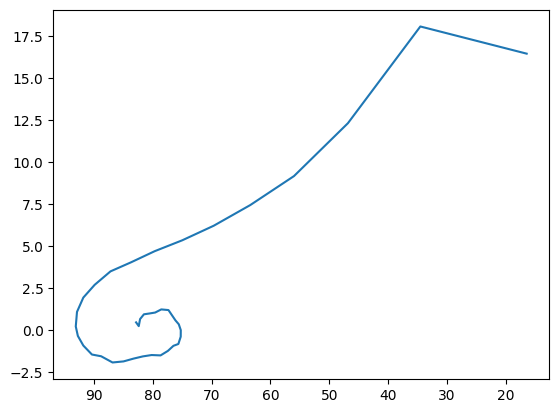

In [419]:
fig,ax = plt.subplots()
ax.plot(angle[:-1][angle[:-1].nonzero()],turning_rate[turning_rate.nonzero()])
ax.invert_xaxis() 

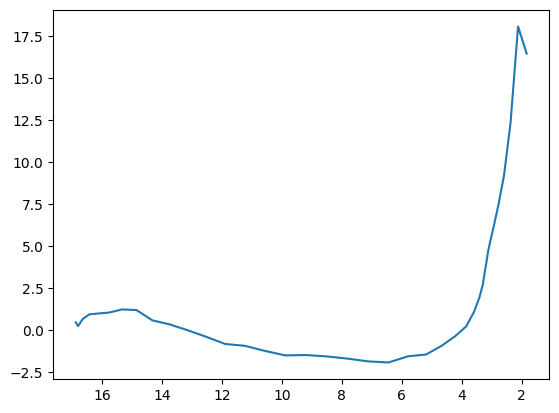

In [421]:
fig,ax = plt.subplots()
ax.plot(row['distance_from_edge'][:-1][angle[:-1].nonzero()],turning_rate[turning_rate.nonzero()])
ax.invert_xaxis() 

In [459]:
row.task

'oadark'

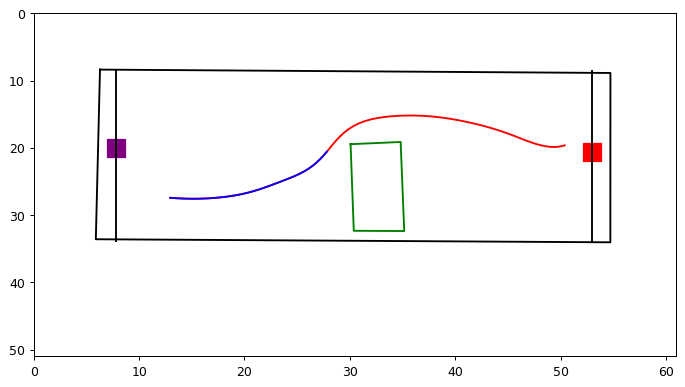

In [457]:
fig = plt.figure(constrained_layout=False, figsize=(15, 8),dpi=90)

spec2 = gridspec.GridSpec(ncols=2, nrows=1, figure=fig)
panel_1 = gridspec.GridSpecFromSubplotSpec(2,1,subplot_spec=spec2[0])
panel_2 = gridspec.GridSpecFromSubplotSpec(2,1,subplot_spec=spec2[1])

ax1 = fig.add_subplot(panel_1[0,0])
plot_arena(trial,ax1)
plt.plot([row['gt_obstacleTL_x_cm'], row['gt_obstacleTR_x_cm'], row['gt_obstacleBR_x_cm'], row['gt_obstacleBL_x_cm'],row['gt_obstacleTL_x_cm']],
                                [row['gt_obstacleTL_y_cm'], row['gt_obstacleTR_y_cm'], row['gt_obstacleBR_y_cm'], row['gt_obstacleBL_y_cm'],row['gt_obstacleTL_y_cm']],color='green')
    #plt.plot([np.nanmean(row['obstacleTL_x_cm']), np.nanmean(row['obstacleTR_x_cm']), np.nanmean(row['obstacleBR_x_cm']), np.nanmean(row['obstacleBL_x_cm']),np.nanmean(row['obstacleTL_x_cm'])],
                                #[np.nanmean(row['obstacleTL_y_cm']), np.nanmean(row['obstacleTR_y_cm']), np.nanmean(row['obstacleBR_y_cm']), np.nanmean(row['obstacleBL_y_cm']),np.nanmean(row['obstacleTL_y_cm'])],color='red')
    
    
    #length = int(row['len_facing_corner'])
    
plt.plot(row['ts_nose_x_cm'],row['ts_nose_y_cm'],color = 'red')
    
plt.plot(row['ts_nose_x_cm'][:length],row['ts_nose_y_cm'][:length],color = 'blue')
    
    

In [461]:
test.task

1122    oa
Name: task, dtype: object

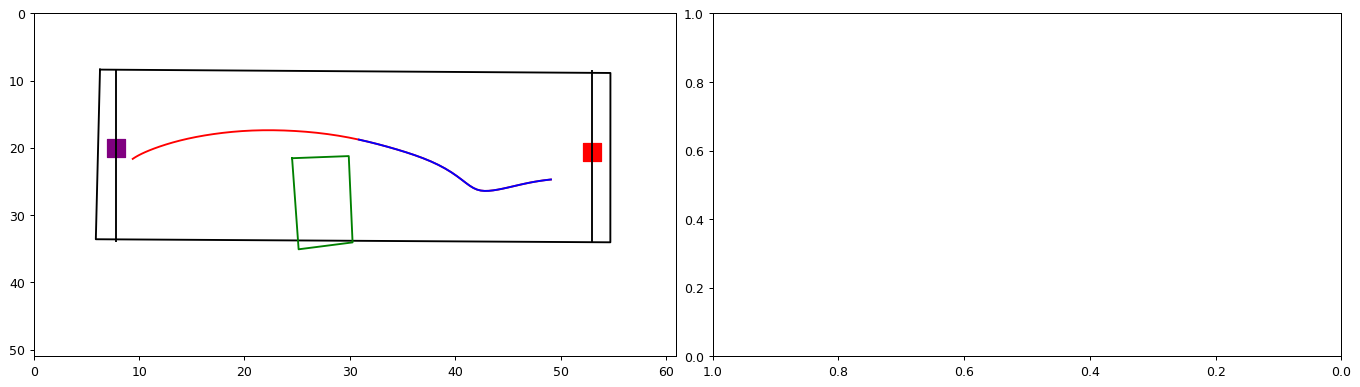

In [462]:
long_df = create_long_df(light_df)
test = long_df.sample(1)
trial = test


In [484]:
row['leftportT_x_cm']

7.815017507152675

In [485]:
np.nanmean([row['leftportT_x_cm'],np.nanmean(row['leftportB_x_cm'])])

8.91252007387574

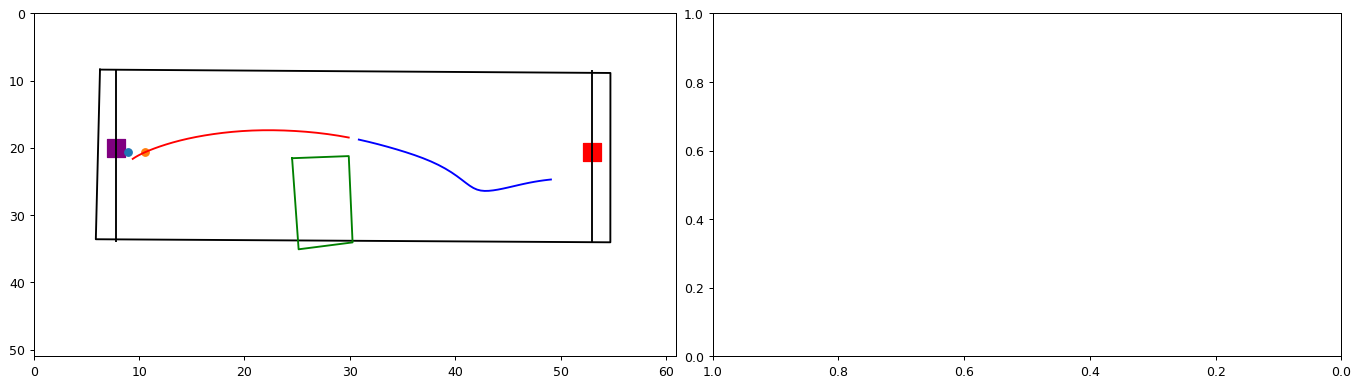

In [492]:
fig = plt.figure(constrained_layout=False, figsize=(15, 8),dpi=90)

spec2 = gridspec.GridSpec(ncols=2, nrows=1, figure=fig)
panel_1 = gridspec.GridSpecFromSubplotSpec(2,1,subplot_spec=spec2[0])
panel_2 = gridspec.GridSpecFromSubplotSpec(2,1,subplot_spec=spec2[1])

ax1 = fig.add_subplot(panel_1[0,0])
ax2 = fig.add_subplot(panel_2[0,0])
plot_arena(trial,ax1)
for ind,row in trial.iterrows():

    ax1.plot([row['gt_obstacleTL_x_cm'], row['gt_obstacleTR_x_cm'], row['gt_obstacleBR_x_cm'], row['gt_obstacleBL_x_cm'],row['gt_obstacleTL_x_cm']],
                                [row['gt_obstacleTL_y_cm'], row['gt_obstacleTR_y_cm'], row['gt_obstacleBR_y_cm'], row['gt_obstacleBL_y_cm'],row['gt_obstacleTL_y_cm']],color='green')
    #ax1.plot([np.nanmean(row['obstacleTL_x_cm']), np.nanmean(row['obstacleTR_x_cm']), np.nanmean(row['obstacleBR_x_cm']), np.nanmean(row['obstacleBL_x_cm']),np.nanmean(row['obstacleTL_x_cm'])],
                                #[np.nanmean(row['obstacleTL_y_cm']), np.nanmean(row['obstacleTR_y_cm']), np.nanmean(row['obstacleBR_y_cm']), np.nanmean(row['obstacleBL_y_cm']),np.nanmean(row['obstacleTL_y_cm'])],color='red')
    
    
    #length = int(row['len_facing_corner'])
    
    ax1.plot(row['ts_nose_x_cm'][np.argwhere(test.distance_from_edge.item()<0).tolist()],row['ts_nose_y_cm'][np.argwhere(test.distance_from_edge.item()<0).tolist()],color = 'red')
    
    ax1.plot(row['ts_nose_x_cm'][:length],row['ts_nose_y_cm'][:length],color = 'blue')
    ax1.scatter(np.nanmean([row['leftportT_x_cm'],np.nanmean(row['leftportB_x_cm'])]),np.nanmean([row['leftportT_y_cm'],np.nanmean(row['leftportB_y_cm'])]))
    ax1.scatter(row['ts_nose_x_cm'][58],row['ts_nose_y_cm'][58])
    
    
    
    
    

    
    #ax2.scatter(distance_centered_obstalce,row.distance_from_edge)
    ax2.invert_xaxis()

In [479]:
row['ts_nose_y_cm'][np.argwhere(test.distance_from_edge.item()<0).tolist()]

array([[18.46721680005127],
       [18.19406044186539],
       [17.9592288050854],
       [17.764522054277837],
       [17.61010682239669],
       [17.495305153561223],
       [17.41943615155099],
       [17.382377080248563],
       [17.384542657967085],
       [17.426267861646856],
       [17.506900974395627],
       [17.624200284145],
       [17.774572576393695],
       [17.95407649397578],
       [18.159543014936332],
       [18.389033720051145],
       [18.641178925106196],
       [18.91380564251554],
       [19.20272370926088],
       [19.50144713570518],
       [19.8020124534172],
       [20.09628833628946],
       [20.377068123508426],
       [20.638514195614214],
       [20.876087948691218],
       [21.08624896836046],
       [21.266191546611623],
       [21.413590380517796],
       [21.526418935130838],
       [21.60288144943729],
       [21.6415300222237]], dtype=object)

In [478]:
row['ts_nose_x_cm'][np.argwhere(test.distance_from_edge.item()<0).tolist()]

array([[29.893196965230256],
       [28.908106283019645],
       [27.90052616665023],
       [26.875187114413386],
       [25.83854288227062],
       [24.798043222333828],
       [23.761349045948272],
       [22.73558869170905],
       [21.726753155421303],
       [20.73935776277702],
       [19.776483418316573],
       [18.840163565376162],
       [17.93194271413325],
       [17.053407270476193],
       [16.20652526995254],
       [15.393754768091934],
       [14.618012834190996],
       [13.882677381447161],
       [13.19174955050925],
       [12.550046312618289],
       [11.963085347903931],
       [11.436439660986315],
       [10.974611830751574],
       [10.579816736920408],
       [10.251246629353444],
       [9.985195824915607],
       [9.775999039289857],
       [9.617370179633314],
       [9.503573856957045],
       [9.430151779698352],
       [9.394157327747322]], dtype=object)

In [469]:
test.columns.to_numpy()

array(['level_0', 'index', 'first_poke', 'second_poke',
       'trial_timestamps', 'trial_vidframes', 'nose_x', 'nose_y',
       'leftear_x', 'leftear_y', 'rightear_x', 'rightear_y', 'spine_x',
       'spine_y', 'midspine_x', 'midspine_y', 'tailbase_x', 'tailbase_y',
       'midtail_x', 'midtail_y', 'tailend_x', 'tailend_y', 'arenaTL_x',
       'arenaTL_y', 'arenaTR_x', 'arenaTR_y', 'arenaBL_x', 'arenaBL_y',
       'arenaBR_x', 'arenaBR_y', 'obstacleTL_x', 'obstacleTL_y',
       'obstacleTR_x', 'obstacleTR_y', 'obstacleBR_x', 'obstacleBR_y',
       'obstacleBL_x', 'obstacleBL_y', 'leftportT_x', 'leftportT_y',
       'leftportB_x', 'leftportB_y', 'rightportT_x', 'rightportT_y',
       'rightportB_x', 'rightportB_y', 'len', 'animal', 'date', 'task',
       'condition', 'nose_x_cm', 'nose_y_cm', 'leftear_x_cm',
       'leftear_y_cm', 'rightear_x_cm', 'rightear_y_cm', 'spine_x_cm',
       'spine_y_cm', 'midspine_x_cm', 'midspine_y_cm', 'tailbase_x_cm',
       'tailbase_y_cm', 'midtail_x_cm

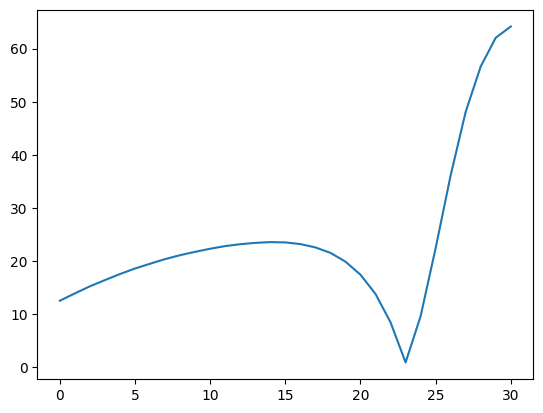

In [494]:
plt.plot(test.angle_to_target_port.item()[np.argwhere(test.distance_from_edge.item()<0).tolist()])

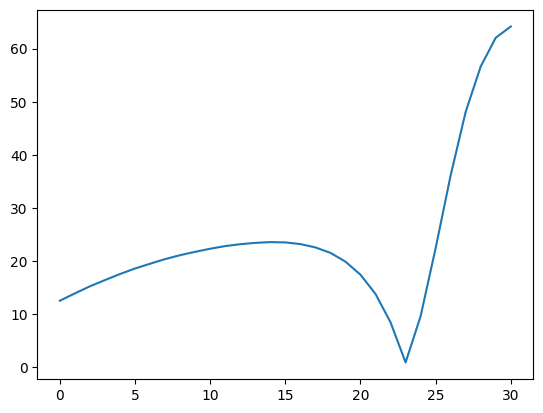

In [475]:
plt.plot(test.angle_to_target_port.item()[np.argwhere(test.distance_from_edge.item()<0).tolist()])

In [277]:
ts_postition_through_threshold(light_df,10)

In [1856]:
light_df = light_df.drop(columns = ['ts_distance'])
dark_df = dark_df.drop(columns = ['ts_distance'])

In [1857]:
def calculate_speed(df):
    for ind, row in df.iterrows():
        x_positions, y_positions, fps = row['ts_nose_x_cm'], row['ts_nose_y_cm'], 60
        # Calculate the change in positions between frames
        delta_x = np.diff(x_positions.astype(float))
        delta_y = np.diff(y_positions.astype(float))

        # Calculate the Euclidean distance between consecutive positions
        distance = np.sqrt(delta_x**2 + delta_y**2)

        # Calculate the time interval between frames
        time_interval = 1 / fps

        # Calculate the speed in cm/s
        speed = distance / time_interval
        speed = speed.astype(float)
        distance = distance.astype(float)

        df.at[ind, 'ts_speed'] = speed.astype(object)
        df.at[ind, 'ts_distance'] = sum(distance).astype(object)
        

In [11]:
def calculate_speed(df):
    for ind, row in df.iterrows():
        if row['odd'] == 'left': 
            nose_list = row['nose_x_cm'] 
            odd_ind = np.argmax(nose_list>(df.leftportT_x_cm.unique()+5))
            temp_time = np.diff(row['trial_timestamps'][odd_ind:])
        if row['odd'] == 'right':
            nose_list = row['nose_x_cm'] 
            even_ind = np.argmax(nose_list<(df.rightportT_x_cm.unique()-5))
            temp_time = np.diff(row['trial_timestamps'][even_ind:])
        x = np.diff(row['ts_nose_x_cm']); y = np.diff(row['ts_nose_y_cm'])
        if len(x) == len(temp_time):
            xspeed = list((x/temp_time)**2)
        elif len(x) > len(temp_time):
            xspeed = list((x[:len(temp_time)]/temp_time)**2)
        elif len(x) < len(temp_time):
            xspeed = list((x/temp_time[:len(x)])**2)
        if len(y) == len(temp_time):
            yspeed = list((y/temp_time)**2)
        elif len(y) > len(temp_time):
            yspeed = list((y[:len(temp_time)]/temp_time)**2)
        elif len(y) < len(temp_time):
            yspeed = list((y/temp_time[:len(y)])**2)
        df.at[ind, 'ts_speed']  = np.sqrt(xspeed + yspeed).astype(object)
        distance = np.sqrt((x.astype(float))**2) + np.sqrt((y.astype(float))**2)
        df.at[ind, 'ts_distance'] = distance.astype(object)
        df.at[ind, 'total_ts_distance'] = np.nansum(distance).astype(object)

In [41]:
calculate_speed(dark_df)
calculate_speed(light_df)

In [761]:
def len_at_facing_corner(df):
    for ind,row in  df.iterrows():
        min = np.argmin(row.angle_to_corner[np.where(row.angle_to_corner>0)])
        len_facing = len(row.angle_to_corner[:min])
        df.at[ind,'len_facing_corner'] = len_facing
        


In [91]:
def compute_tortuosity(x_coordinates, y_coordinates):
    if len(x_coordinates) != len(y_coordinates):
        raise ValueError("Input arrays must have the same length.")

    # Calculate the path length
    path_length = 0
    for i in range(1, len(x_coordinates)):
        dx = x_coordinates[i] - x_coordinates[i-1]
        dy = y_coordinates[i] - y_coordinates[i-1]
        path_length += np.sqrt(dx**2 + dy**2)

    # Calculate the Euclidean distance
    start_point = (x_coordinates[0], y_coordinates[0])
    end_point = (x_coordinates[-1], y_coordinates[-1])
    euclidean_distance = np.sqrt((end_point[0] - start_point[0])**2 + (end_point[1] - start_point[1])**2)

    # Compute tortuosity as the ratio of path length to Euclidean distance
    tortuosity = path_length / euclidean_distance
    linearity = 1/tortuosity 

    return tortuosity,linearity
def df_tortuosity(df):
    for ind,row in df.iterrows():
        try:
            target =  np.argwhere((-1< row['distance_from_edge']) ).max()
            tor,lin= compute_tortuosity(row['nose_x_cm'][:target+1],row['nose_y_cm'][:target+1])
            df.at[ind,'tortuosity']=tor
            df.at[ind,'linearity']=lin
        except ValueError:
            df.at[ind,'tortuosity']=np.nan
            df.at[ind,'linearity']=np.nan
          




In [92]:
df_tortuosity(light_df)
df_tortuosity(dark_df)

In [762]:
len_at_facing_corner(dark_df)
len_at_facing_corner(light_df)

In [222]:
def reject_outliers(data, m = 2.5):
    d = np.abs(data - np.median(data))
    mdev = np.median(d)
    s = d/mdev if mdev else np.zeros(len(d))
    return data[s<m]

In [ ]:
ts_postition_through_threshold(light_df,)

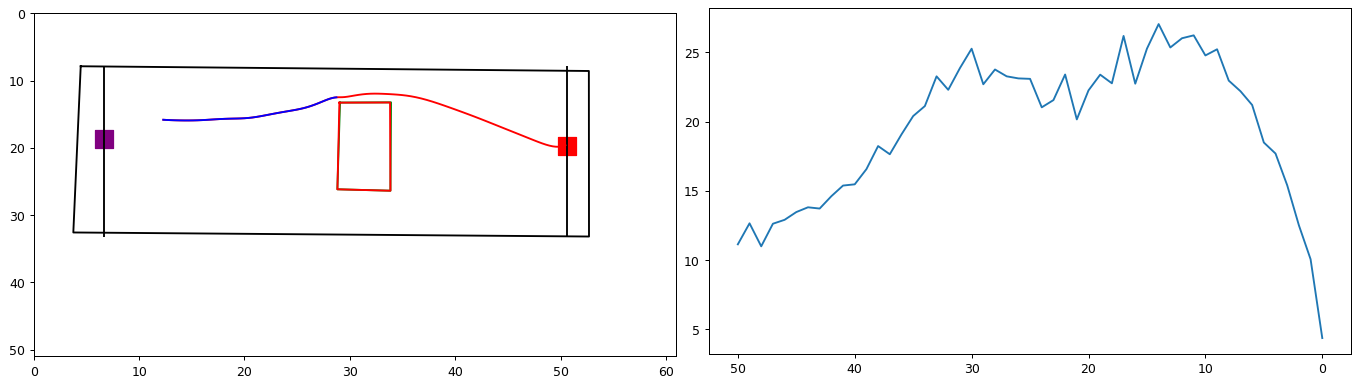

In [1960]:
df = dark_df[(dark_df['obstacle_cluster']==cluster)&(dark_df['start']==start)&(dark_df['len_facing_corner']<=cut_off)& (dark_df['odd']== direction)]
test = df.sample(1)
trial = test.iloc[0]
fig = plt.figure(constrained_layout=False, figsize=(15, 8),dpi=90)

spec2 = gridspec.GridSpec(ncols=2, nrows=1, figure=fig)
panel_1 = gridspec.GridSpecFromSubplotSpec(2,1,subplot_spec=spec2[0])
panel_2 = gridspec.GridSpecFromSubplotSpec(2,1,subplot_spec=spec2[1])

ax1 = fig.add_subplot(panel_1[0,0])
ax2 = fig.add_subplot(panel_2[0,0])
plot_arena(trial,ax1)
ax1.plot([trial['gt_obstacleTL_x_cm'], trial['gt_obstacleTR_x_cm'], trial['gt_obstacleBR_x_cm'], trial['gt_obstacleBL_x_cm'],trial['gt_obstacleTL_x_cm']],
                            [trial['gt_obstacleTL_y_cm'], trial['gt_obstacleTR_y_cm'], trial['gt_obstacleBR_y_cm'], trial['gt_obstacleBL_y_cm'],trial['gt_obstacleTL_y_cm']],color='green')
ax1.plot([np.nanmean(trial['obstacleTL_x_cm']), np.nanmean(trial['obstacleTR_x_cm']), np.nanmean(trial['obstacleBR_x_cm']), np.nanmean(trial['obstacleBL_x_cm']),np.nanmean(trial['obstacleTL_x_cm'])],
                            [np.nanmean(trial['obstacleTL_y_cm']), np.nanmean(trial['obstacleTR_y_cm']), np.nanmean(trial['obstacleBR_y_cm']), np.nanmean(trial['obstacleBL_y_cm']),np.nanmean(trial['obstacleTL_y_cm'])],color='red')

length = np.argwhere(trial['distance_from_edge']>0).max()
#length = int(trial['len_facing_corner'])

ax1.plot(trial['ts_nose_x_cm'],trial['ts_nose_y_cm'],color = 'red')

ax1.plot(trial['ts_nose_x_cm'][:length],trial['ts_nose_y_cm'][:length],color = 'blue')



obstalce_edge = np.mean([trial['gt_obstacleTR_x_cm'],trial['gt_obstacleBR_x_cm']])
trial_length = trial['ts_nose_x_cm'].size
ind_closest_to_edge = np.where(trial['ts_nose_x_cm'] == trial['ts_nose_x_cm'].flat[np.abs(trial['ts_nose_x_cm'] - obstalce_edge).argmin()])[0][0]
past_obstalce = trial['ts_nose_x_cm'][ind_closest_to_edge:] - trial['ts_nose_x_cm'][ind_closest_to_edge:][0]
before_obstalce = np.linspace(trial.distance_from_edge[0],0,num =ind_closest_to_edge)
distance_centered_obstalce = np.concatenate([before_obstalce,past_obstalce]).astype(float)
#distance_centered_obstalce = np.flip(distance_centered_obstalce)


    
ax2.plot(trial.ts_speed[:length])

#ax2.scatter(distance_centered_obstalce,trial.distance_from_edge)
ax2.invert_xaxis()

In [1214]:
by_animal = test.groupby(['animal'])
for animal,animal_frame in by_animal:
    by_date = animal_frame.groupby(['date'])
    for date,date_frame in by_date:
        by_cluster = date_frame.groupby(['obstacle_cluster'])
        for cluster,cluster_frame in by_cluster:
            by_direction = cluster_frame.groupby(['odd'])
            for direction, direction_frame in by_direction:
                by_start = direction_frame.groupby(['start'])
                for start,start_frame in by_start:
                    for num,row in enumerate(start_frame.iterrows()):
                        if num == 0:
                            test.at[row[0],'consecutive'] = 1 
                        else:
                            try:
                                if (row[1]['index']) - (test.at[row[0]-2,'index' ]) == 2:
                                    test.at[row[0],'consecutive'] = 2 
                                else:
                                    test.at[row[0],'consecutive'] = 1
                            except KeyError:
                                test.at[row[0],'consecutive'] = 1


                        


                            

In [17]:
def find_consective_trials(df):
    by_animal = df.groupby(['animal'])
    for animal,animal_frame in by_animal:
        by_date = animal_frame.groupby(['date'])
        for date,date_frame in by_date:
            by_cluster = date_frame.groupby(['obstacle_cluster'])
            for cluster,cluster_frame in by_cluster:
                by_direction = cluster_frame.groupby(['odd'])
                for direction, direction_frame in by_direction:
                    by_start = direction_frame.groupby(['start'])
                    for start,start_frame in by_start:
                        for num,row in enumerate(start_frame.iterrows()):
                            if num == 0:
                                df.at[row[0],'consecutive'] = int(1) 
                            else:
                                try:
                                    if (row[1]['index']) - (df.at[row[0]-2,'index' ]) == 2:
                                        df.at[row[0],'consecutive'] = int(2) 
                                    else:
                                        df.at[row[0],'consecutive'] = int(1)
                                except KeyError:
                                    df.at[row[0],'consecutive'] = int(1)

        


In [498]:
len(con_df)/3

681.0

In [600]:
con_df_light = create_consective_df(light_df)
con_df_dark = create_consective_df(dark_df)
#con_df_light = create_long_df(con_df_light)
#con_df_dark = create_long_df(con_df_dark)

In [592]:
cluster_0 = con_df_light[(con_df_light['obstacle_cluster']==0)]
cluster_1 = con_df_light[(con_df_light['obstacle_cluster']==1)]
cluster_4 = con_df_light[(con_df_light['obstacle_cluster']==4)]
cluster_5 = con_df_light[(con_df_light['obstacle_cluster']==5)]
long_con_df_light = pd.concat([cluster_0,cluster_1,cluster_4,cluster_5])

In [593]:
cluster_0 = con_df_dark[(con_df_dark['obstacle_cluster']==0)]
cluster_1 = con_df_dark[(con_df_dark['obstacle_cluster']==1)]
cluster_4 = con_df_dark[(con_df_dark['obstacle_cluster']==4)]
cluster_5 = con_df_dark[(con_df_dark['obstacle_cluster']==5)]
long_con_df_dark = pd.concat([cluster_0,cluster_1,cluster_4,cluster_5])

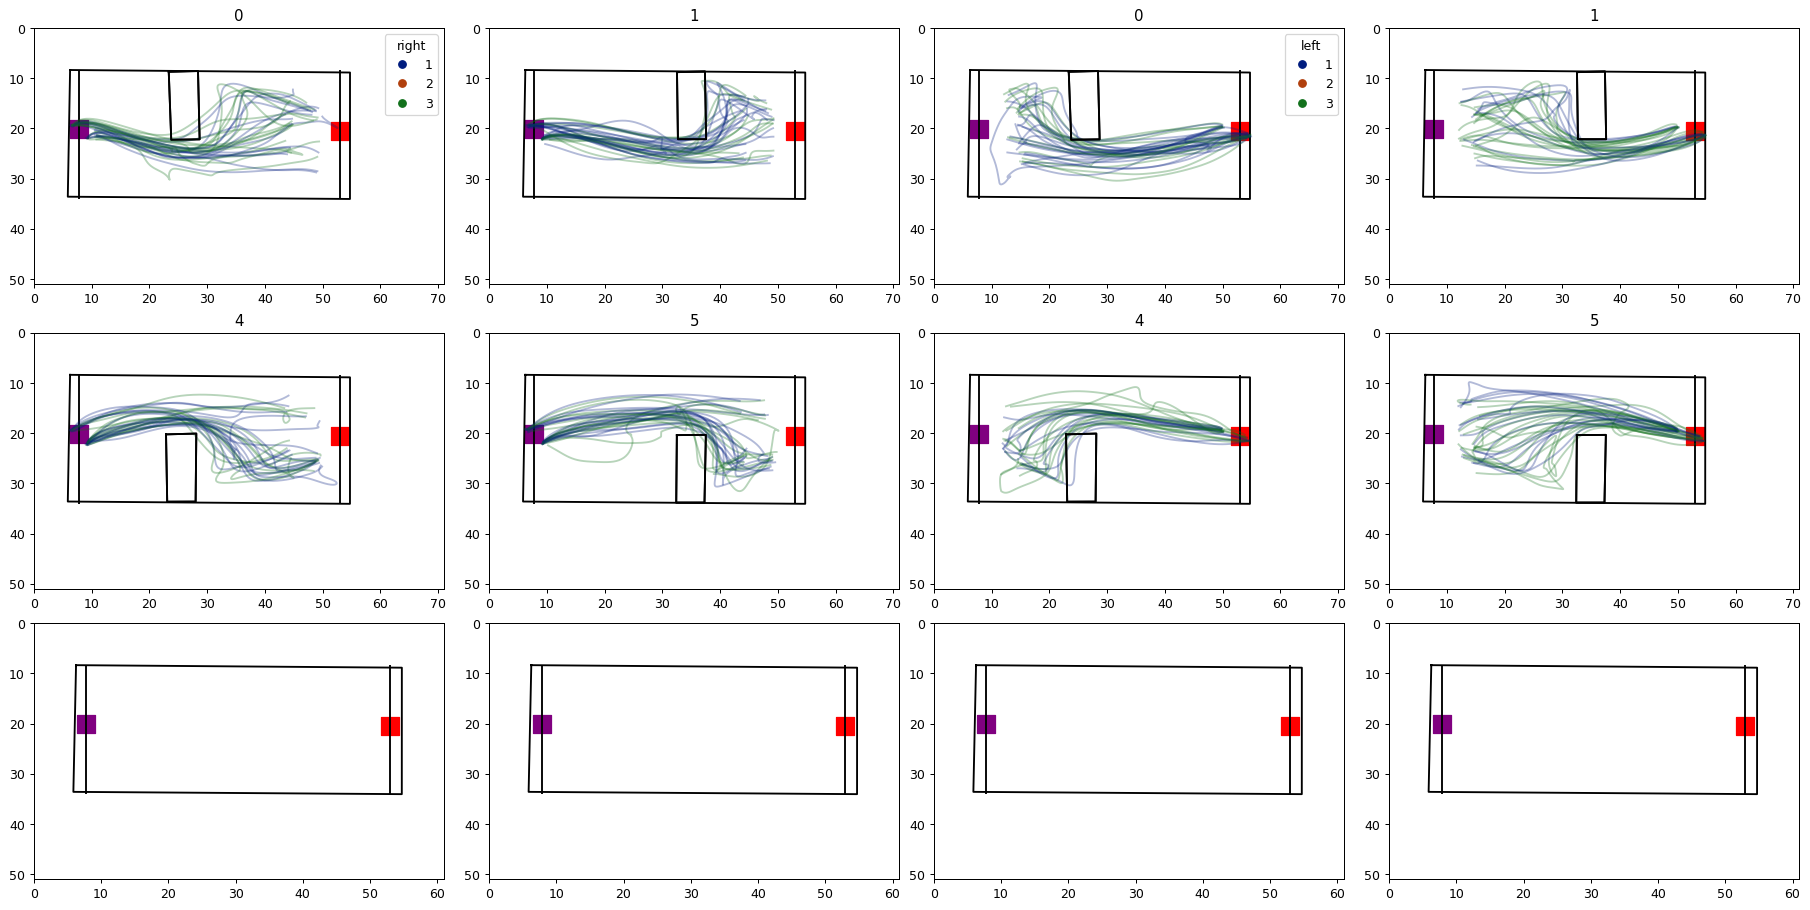

In [580]:
obstacle_by_variable(long_con_df_light,'order','dark',50)

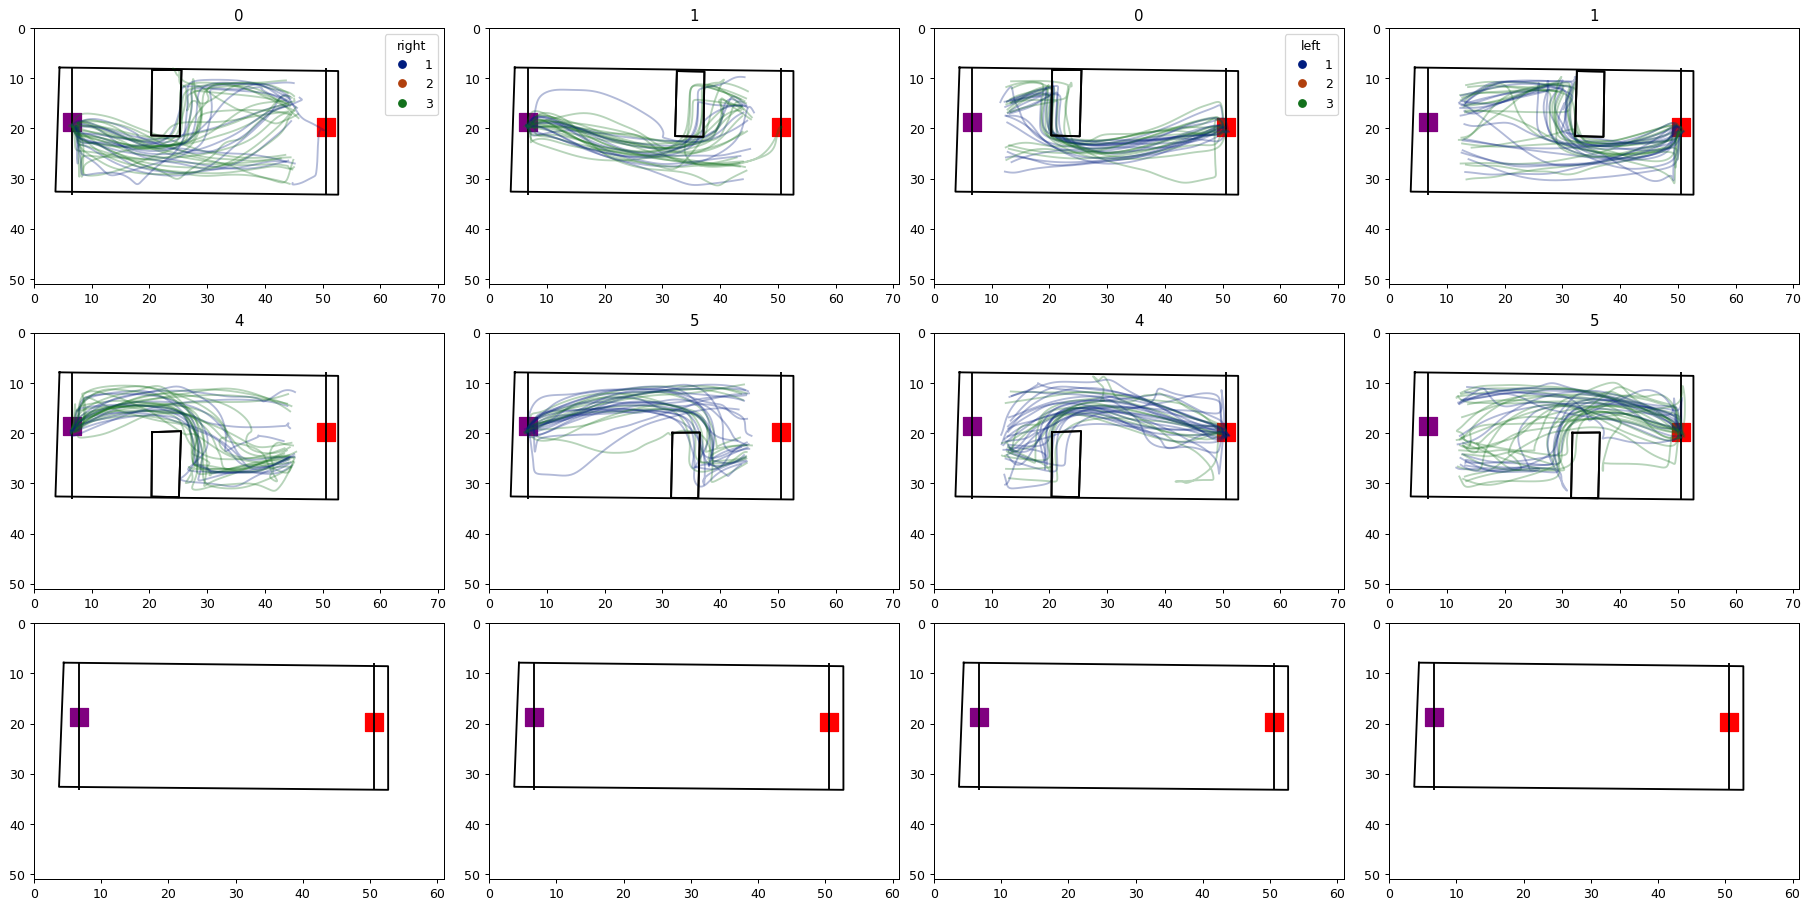

In [581]:
obstacle_by_variable(long_con_df_dark,'order','dark',50)

In [548]:
def obstacle_by_variable(df,key,color_pallete,num_sample):
    """Direction by key obstalce trials"""
    x_basis = np.linspace(10,50,50)
    #savepath = "D:/obstacle_avoidance/recordings"
    #savepath_session = os.path.join(*[savepath,'figures'])
    key=key
    color_pallete = color_pallete
    color_map = create_color_dict(df,key,color_pallete)
    #pdf = PdfPages(os.path.join((savepath_session), 'by ' + str(key)+ ' '+ 'and ' +' obstalce.pdf'))
    fig = plt.figure(constrained_layout=False, figsize=(20, 10),dpi=90)

    
    #fig.suptitle(df['exp'].to_numpy()[0] + '_by ' + key + ' '+ 'and ' +'obstalce ')
    spec2 = gridspec.GridSpec(ncols=2, nrows=1, figure=fig)
    """Right"""
    panel_1 = gridspec.GridSpecFromSubplotSpec(3,2,subplot_spec=spec2[0])
    ax1 = fig.add_subplot(panel_1[0,0])
    plot_arena(df,ax1)
    ax2 = fig.add_subplot(panel_1[0,1])
    plot_arena(df,ax2)
    ax2.set_title('right')
    ax3 = fig.add_subplot(panel_1[1,0])
    plot_arena(df,ax3)
    ax4 = fig.add_subplot(panel_1[1,1])
    plot_arena(df,ax4)
    ax5 = fig.add_subplot(panel_1[2,0])
    plot_arena(df,ax5)
    ax6 = fig.add_subplot(panel_1[2,1])
    plot_arena(df,ax6)
    right_axs = [ax1,ax2,ax3,ax4,ax5,ax6]
    markers = [plt.Line2D([0,0],[0,0],color=color, marker='o', linestyle='') for color in color_map.values()]
    ax1.legend(markers, color_map.keys(), numpoints=1,title = 'right')
    """Left """
    panel_2 = gridspec.GridSpecFromSubplotSpec(3,2,subplot_spec=spec2[1])
    ax7 = fig.add_subplot(panel_2[0,0])
    plot_arena(df,ax7)
    ax8 = fig.add_subplot(panel_2[0,1])
    plot_arena(df,ax8)
    ax8.set_title('left')
    ax9 = fig.add_subplot(panel_2[1,0])
    plot_arena(df,ax9)
    ax10 = fig.add_subplot(panel_2[1,1])
    plot_arena(df,ax10)
    ax11= fig.add_subplot(panel_2[2,0])
    plot_arena(df,ax11)
    ax12 = fig.add_subplot(panel_2[2,1])
    plot_arena(df,ax12)
    left_axs = [ax7,ax8,ax9,ax10,ax11,ax12]
    markers = [plt.Line2D([0,0],[0,0],color=color, marker='o', linestyle='') for color in color_map.values()]
    ax7.legend(markers, color_map.keys(), numpoints=1,title = 'left')
    """ plot trials"""
    right_obstacle_dict = dict(zip(pd.unique(df['obstacle_cluster'].sort_values().to_list()),right_axs))
    left_obstacle_dict = dict(zip(pd.unique(df['obstacle_cluster'].sort_values().to_list()),left_axs))
    for direction, direction_frame in df.groupby(['odd']):
        for cluster, cluster_frame in direction_frame.groupby(['obstacle_cluster']):
            cluster_frame = cluster_frame.sample(num_sample)
            right_obstacle_axis = right_obstacle_dict.get(cluster)
            left_obstalce_axis = left_obstacle_dict.get(cluster)
            #plot_obstacle(cluster_frame,right_obstacle_axis,cluster)
            #plot_obstacle(cluster_frame,left_obstalce_axis,cluster)
            right_obstacle_axis.set_title(str(cluster))
            left_obstalce_axis.set_title(str(cluster))
            for ind,row in cluster_frame.iterrows():
                if row[key]==2:
                    continue
                else:
                    color = color_map.get(str(row[key]))
                    if direction == 'right':
                        which_axis = right_obstacle_dict.get(cluster)
                        which_axis.plot(row['ts_nose_x_cm'],row['ts_nose_y_cm'],c = color,alpha = .3)
                    if direction == 'left':
                        which_axis = left_obstacle_dict.get(cluster)
                        which_axis.plot(row['ts_nose_x_cm'],row['ts_nose_y_cm'],c = color,alpha = .3)

            plot_obstacle(cluster_frame,right_obstacle_axis,cluster)
            plot_obstacle(cluster_frame,left_obstalce_axis,cluster)
        
            

<AxesSubplot: xlabel='order', ylabel='tortuosity'>

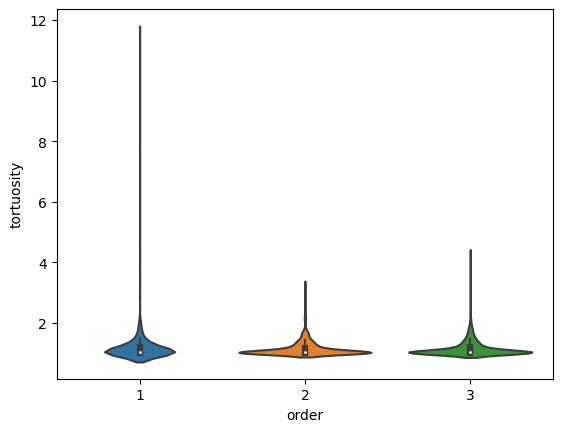

In [601]:
fig,ax = plt.subplots()
sns.violinplot(x="order", y="tortuosity", data=con_df_light,ax = ax,density_norm='area')

<AxesSubplot: xlabel='order', ylabel='tortuosity'>

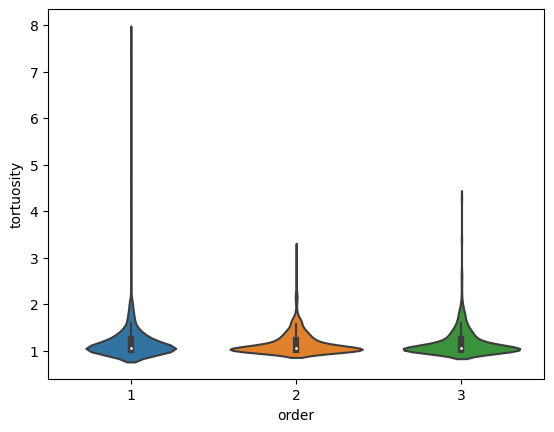

In [603]:
fig,ax = plt.subplots()
sns.violinplot(x="order", y="tortuosity", data=long_con_df_light,ax = ax,density_norm='area')

<AxesSubplot: xlabel='order', ylabel='tortuosity'>

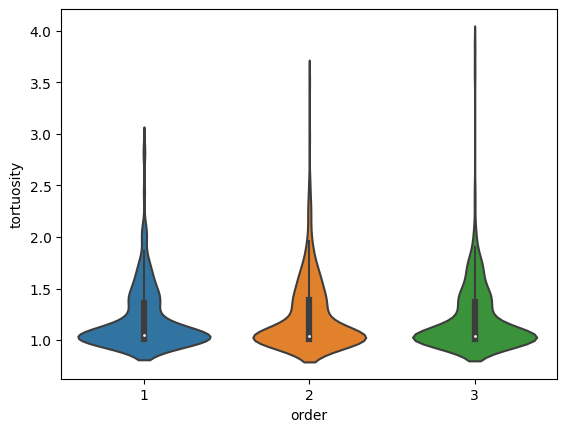

In [604]:
fig,ax = plt.subplots()
sns.violinplot(x="order", y="tortuosity", data=con_df_dark,ax = ax,density_norm = 'count')

<AxesSubplot: xlabel='order', ylabel='tortuosity'>

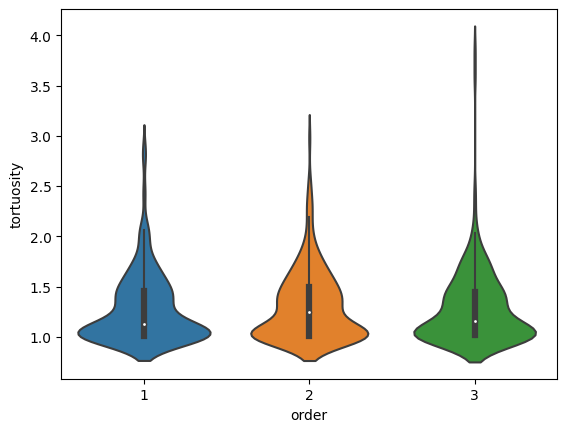

In [605]:
fig,ax = plt.subplots()
sns.violinplot(x="order", y="tortuosity", data=long_con_df_dark,ax = ax)

In [572]:
con_df_dark

level_0  index    first_poke   second_poke  \
379         4      7  66146.924454  66149.947545   
434        65     73  66313.178534  66315.509414   
500       139    157  66535.921267  66538.665881   
501       140    159  66548.304537  66550.623116   
1324       24     27  46355.675212  46358.521945   
...       ...    ...           ...           ...   
1703       58     70  55580.159257  55583.186585   
1722       79     92  55645.270732  55647.876044   
2674       48     50  56668.709632  56671.146880   
2701       78     86  56821.806323  56826.791654   
2703       80     88  56830.654489  56833.968345   

                                       trial_timestamps  \
379   [66146.93239, 66146.948979, 66146.965619, 6614...   
434   [66313.189478, 66313.206464, 66313.223884, 663...   
500   [66535.933734, 66535.950016, 66535.966643, 665...   
501   [66548.320857, 66548.338342, 66548.354419, 665...   
1324  [46355.676992, 46355.692774, 46355.709388, 463...   
...                                                 ...   
1703  [55580.166809, 55580.18382, 55580.200371, 5558...   
1722  [55645.274009, 55645.28942, 55645.306137, 5564...   
2674  [56668.710156, 56668.728076, 56668.743948, 566...   
2701  [56821.813273, 56821.830118, 56821.846758, 568...   
2703  [56830.667033, 56830.683059, 56830.70007, 5683...   

                                        trial_vidframes  \
379   [[2020, 2021, 2022, 2023, 2024, 2025, 2026, 20...   
434   [[11992, 11993, 11994, 11995, 11996, 11997, 11...   
500   [[25352, 25353, 25354, 25355, 25356, 25357, 25...   
501   [[26095, 26096, 26097, 26098, 26099, 26100, 26...   
1324  [[4198, 4199, 4200, 4201, 4202, 4203, 4204, 42...   
...                                                 ...   
1703  [18130, 18131, 18132, 18133, 18134, 18135, 181...   
1722  [22035, 22036, 22037, 22038, 22039, 22040, 220...   
2674  [9089, 9090, 9091, 9092, 9093, 9094, 9095, 909...   
2701  [18272, 18273, 18274, 18275, 18276, 18277, 182...   
2703  [18803, 18804, 18805, 18806, 18807, 18808, 188...   

                                                 nose_x  \
379   [680.1354370117188, 680.0645141601562, 680.796...   
434   [680.1268920898438, 680.0867919921875, 679.803...   
500   [680.91845703125, 680.9100952148438, 681.58007...   
501   [681.258544921875, 682.049560546875, 682.58770...   
1324  [685.6495361328125, 686.54638671875, 687.00140...   
...                                                 ...   
1703  [83.5605697631836, 82.9894027709961, 83.279083...   
1722  [85.38843536376953, 85.63068389892578, 85.4057...   
2674  [88.25646209716797, 87.59366607666016, 87.6738...   
2701  [87.8474349975586, 88.03868103027344, 87.27976...   
2703  [86.87492370605469, 86.01437377929688, 85.5067...   

                                                 nose_y  \
379   [271.7699279785156, 271.71929931640625, 273.10...   
434   [272.00421142578125, 271.8930969238281, 271.69...   
500   [273.8277282714844, 273.1893615722656, 273.762...   
501   [274.936767578125, 274.8714294433594, 274.0292...   
1324  [274.70489501953125, 274.4930114746094, 274.98...   
...                                                 ...   
1703  [265.0249328613281, 264.602294921875, 264.4320...   
1722  [264.84893798828125, 265.2931213378906, 265.11...   
2674  [264.4518737792969, 264.75555419921875, 264.43...   
2701  [262.7031555175781, 262.7727355957031, 263.161...   
2703  [262.6824951171875, 264.2300720214844, 264.571...   

                                              leftear_x  \
379   [667.6268310546875, 668.3958129882812, 669.163...   
434   [666.0840454101562, 666.3616943359375, 666.432...   
500   [666.51806640625, 667.8213500976562, 669.16839...   
501   [668.8057250976562, 670.2510986328125, 670.224...   
1324  [672.4266967773438, 672.8399047851562, 673.721...   
...                                                 ...   
1703  [102.14311218261719, 101.70919036865234, 101.5...   
1722  [98.89053344726562, 97.87057495117188, 97.7144...   
2674  [100.611

In [516]:
long_con_df_light

level_0  index    first_poke   second_poke  \
328        14     16  54515.823974  54517.569062   
329        15     17  54517.569062  54519.842393   
330        16     18  54519.842393  54521.611955   
359        51     56  54607.180697  54609.064972   
360        52     57  54609.064972  54611.432716   
...       ...    ...           ...           ...   
3192      148    169  55811.452582  55813.324582   
3193      149    170  55813.324582  55816.396800   
3204      160    183  55857.163763  55859.121868   
3205      161    184  55859.121868  55861.505740   
3206      162    185  55861.505740  55863.586854   

                                       trial_timestamps  \
328   [54515.838182, 54515.854873, 54515.871539, 545...   
329   [54517.572352, 54517.59008, 54517.605452, 5451...   
330   [54519.856268, 54519.873344, 54519.889587, 545...   
359   [54607.186995, 54607.203545, 54607.220172, 546...   
360   [54609.070476, 54609.088064, 54609.104064, 546...   
...                                                 ...   
3192  [55811.460377, 55811.478067, 55811.494028, 558...   
3193  [55813.328576, 55813.344678, 55813.361241, 558...   
3204  [55857.176358, 55857.19319, 55857.210291, 5585...   
3205  [55859.127091, 55859.143795, 55859.160524, 558...   
3206  [55861.51136, 55861.528128, 55861.544729, 5586...   

                                        trial_vidframes  \
328   [2581, 2582, 2583, 2584, 2585, 2586, 2587, 258...   
329   [[2685, 2686, 2687, 2688, 2689, 2690, 2691, 26...   
330   [2822, 2823, 2824, 2825, 2826, 2827, 2828, 282...   
359   [8060, 8061, 8062, 8063, 8064, 8065, 8066, 806...   
360   [[8173, 8174, 8175, 8176, 8177, 8178, 8179, 81...   
...                                                 ...   
3192  [30028, 30029, 30030, 30031, 30032, 30033, 300...   
3193  [[30140, 30141, 30142, 30143, 30144, 30145, 30...   
3204  [32770, 32771, 32772, 32773, 32774, 32775, 327...   
3205  [[32887, 32888, 32889, 32890, 32891, 32892, 32...   
3206  [33030, 33031, 33032, 33033, 33034, 33035, 330...   

                                                 nose_x  \
328   [114.07935333251953, nan, nan, nan, nan, nan, ...   
329   [nan, nan, nan, nan, nan, nan, nan, nan, nan, ...   
330   [nan, 114.31452178955078, 113.8272476196289, n...   
359   [nan, nan, nan, nan, nan, nan, nan, nan, nan, ...   
360   [nan, nan, nan, nan, nan, nan, nan, nan, nan, ...   
...                                                 ...   
3192  [91.3077392578125, 90.93209838867188, 90.58789...   
3193  [674.1445922851562, 674.9492797851562, 675.327...   
3204  [94.90563201904297, 94.2178955078125, 94.49604...   
3205  [673.5966186523438, 674.5474853515625, 674.634...   
3206  [89.52436828613281, 88.8603515625, 88.90586090...   

                                                 nose_y  \
328   [278.66558837890625, nan, nan, nan, nan, nan, ...   
329   [nan, nan, nan, nan, nan, nan, nan, nan, nan, ...   
330   [nan, 275.4782409667969, 275.37982177734375, n...   
359   [nan, nan, nan, nan, nan, nan, nan, nan, nan, ...   
360   [nan, nan, nan, nan, nan, nan, nan, nan, nan, ...   
...                                                 ...   
3192  [260.02777099609375, 260.3174133300781, 261.33...   
3193  [266.40887451171875, 266.07464599609375, 266.1...   
3204  [261.02777099609375, 260.5050048828125, 260.86...   
3205  [267.1167907714844, 265.5072937011719, 265.034...   
3206  [259.8397521972656, 260.00335693359375, 259.46...   

                                              leftear_x  \
328   [126.15926361083984, 124.433349609375, 123.839...   
329   [683.340576171875, 684.61865234375, 685.467224...   
330   [124.39299774169922, 124.75747680664062, 124.3...   
359   [121.58358764648438, 121.58058166503906, 121.6...   
360   [681.3040771484375, 681.7811279296875, 682.896...   
...                                                 ...   
3192  [106.04312896728516, 105.17707824707031, 105.3...   
3193  [664.4138793945312, 665.5099487304688, 666.206...   
3204  [101.355

In [18]:
find_consective_trials(light_df)
find_consective_trials(dark_df)

In [504]:
def generate_sequence_list(sequence, n):
    result = []
    for _ in range(n):
        result.extend(sequence)
    return result

def create_consective_df(df):
    con_df = pd.DataFrame()
    for animal,animal_frame in df.groupby('animal'):
        for date, date_frame in animal_frame.groupby('date'):
            repeats_list = find_consecutive_repeats(date_frame['obstacle_cluster'])
            for i in range(len(repeats_list)):
                con_df = con_df.append(date_frame.loc[repeats_list[i][0]:repeats_list[i][1]])
    order_list = generate_sequence_list([1,2,3],int(len(con_df)/3))
    con_df['order'] = order_list     
    return con_df
        

In [1427]:
light_df.at[ind,'angle_to_corner'].shape

(90,)

In [1602]:
import cv2 as cv
import numpy as np

def extract_frames_from_video(video_path, frame_numbers):
    # Initialize an empty list to store the extracted frames
    frames = []

    # Open the video file
    cap = cv2.VideoCapture(video_path)

    # Check if the video file was opened successfully
    if not cap.isOpened():
        print("Error: Could not open the video file.")
        return frames

    try:
        frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

        # Loop through the frame_numbers list and extract frames
        for frame_number in frame_numbers:
            # Ensure the frame number is within the valid range
            if frame_number < 0 or frame_number >= frame_count:
                print(f"Invalid frame number: {frame_number}")
                continue

            # Set the video capture position to the desired frame
            cap.set(cv2.CAP_PROP_POS_FRAMES, frame_number)

            # Read the frame from the video
            ret, frame = cap.read()

            if ret:
                frames.append(frame)
            else:
                print(f"Error reading frame {frame_number}")

    except Exception as e:
        print(f"An error occurred: {str(e)}")

    # Release the video capture object
    cap.release()

    return frames

# Example usage:
video_path = r"D:\obstacle_avoidance\recordings\061323\G8CK1LN\oa\061323_G8CK1LN_control_Rig2_oa_top1.avi"
frame_numbers = [20350,20380,20400 ,20420]  # List of frame numbers to extract
extracted_frames = extract_frames_from_video(video_path, frame_numbers)

# You can now work with the extracted frames as a list of NumPy arrays.


In [1601]:

import os

def extract_and_save_frames(video_path, frame_numbers, output_directory):
    # Create the output directory if it doesn't exist
    if not os.path.exists(output_directory):
        os.makedirs(output_directory)

    # Open the video file
    cap = cv2.VideoCapture(video_path)

    # Check if the video file was opened successfully
    if not cap.isOpened():
        print("Error: Could not open the video file.")
        return

    try:
        frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

        # Loop through the frame_numbers list and extract frames
        for frame_number in frame_numbers:
            # Ensure the frame number is within the valid range
            if frame_number < 0 or frame_number >= frame_count:
                print(f"Invalid frame number: {frame_number}")
                continue

            # Set the video capture position to the desired frame
            cap.set(cv2.CAP_PROP_POS_FRAMES, frame_number)

            # Read the frame from the video
            ret, frame = cap.read()

            if ret:
                # Define the filename for the saved image
                filename = os.path.join(output_directory, f"frame_{frame_number}.jpg")
                cv2.imwrite(filename, frame)
                print(f"Saved frame {frame_number} as {filename}")
            else:
                print(f"Error reading frame {frame_number}")

    except Exception as e:
        print(f"An error occurred: {str(e)}")

    # Release the video capture object
    cap.release()

# Example usage:
video_path = r"D:\obstacle_avoidance\recordings\061323\G8CK1LN\oa\061323_G8CK1LN_control_Rig2_oa_top1.avi"
frame_numbers = [20350,20380,20400 ,20420]  # List of frame numbers to extract
output_directory = r"D:\obstacle_avoidance\recordings\061323\G8CK1LN\oa"
extract_and_save_frames(video_path, frame_numbers, output_directory)

Saved frame 20350 as D:\obstacle_avoidance\recordings\061323\G8CK1LN\oa\frame_20350.jpg
Saved frame 20380 as D:\obstacle_avoidance\recordings\061323\G8CK1LN\oa\frame_20380.jpg
Saved frame 20400 as D:\obstacle_avoidance\recordings\061323\G8CK1LN\oa\frame_20400.jpg
Saved frame 20420 as D:\obstacle_avoidance\recordings\061323\G8CK1LN\oa\frame_20420.jpg


In [1603]:
img = cv.imread(r"D:\obstacle_avoidance\recordings\061323\G8CK1LN\oa\merged.png")

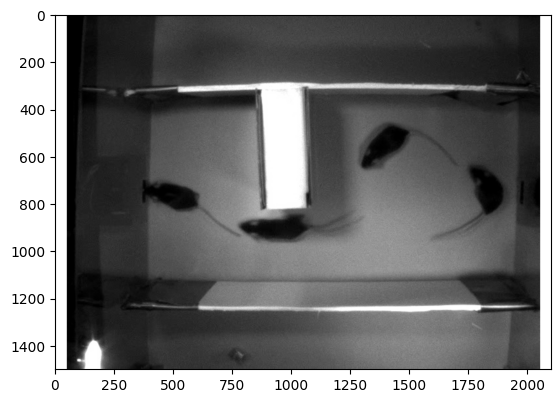

In [1604]:

plt.imshow(img)


In [1745]:
frames = trial.trial_vidframes
animal = trial.animal
date = trial.date
print(frames,animal,date)

[[20309 20310 20311 20312 20313 20314 20315 20316 20317 20318 20319 20320
  20321 20322 20323 20324 20325 20326 20327 20328 20329 20330 20331 20332
  20333 20334 20335 20336 20337 20338 20339 20340 20341 20342 20343 20344
  20345 20346 20347 20348 20349 20350 20351 20352 20353 20354 20355 20356
  20357 20358 20359 20360 20361 20362 20363 20364 20365 20366 20367 20368
  20369 20370 20371 20372 20373 20374 20375 20376 20377 20378 20379 20380
  20381 20382 20383 20384 20385 20386 20387 20388 20389 20390 20391 20392
  20393 20394 20395 20396 20397 20398 20399 20400 20401 20402 20403 20404
  20405 20406 20407 20408 20409 20410 20411 20412 20413 20414 20415 20416
  20417 20418 20419 20420 20421 20422 20423 20424 20425 20426 20427 20428
  20429 20430 20431 20432 20433 20434 20435 20436 20437 20438 20439 20440
  20441 20442]] G8CK1LN 061323


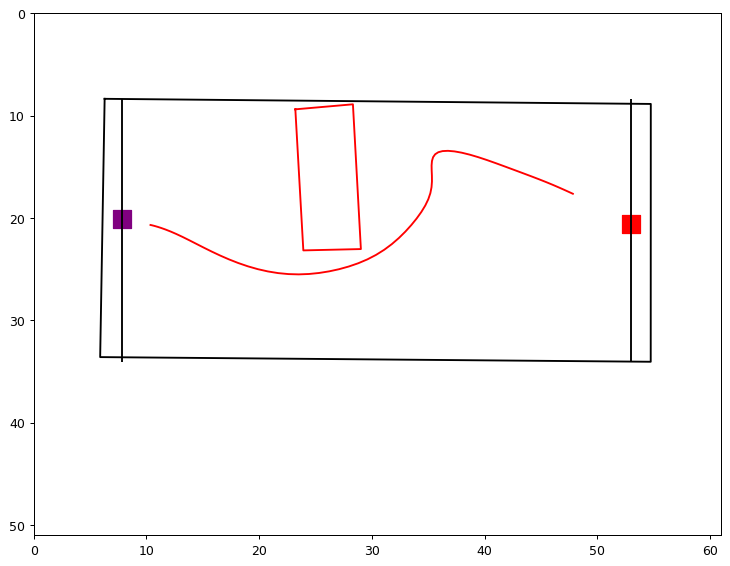

In [1799]:
cut_off =  reject_outliers(light_df['time'][(light_df['obstacle_cluster']==0)  & (light_df['odd']== 'right') & (light_df['start']== 'top')],m=1).max()
df = light_df[(light_df['obstacle_cluster']==0)&(light_df['start']=='top')&(light_df['time']<=cut_off)& (light_df['odd']== 'right')]
trial = df.iloc[16]
fig = plt.figure(constrained_layout=False, figsize=(8, 12),dpi=90)

spec2 = gridspec.GridSpec(ncols=1, nrows=1, figure=fig)
panel_1 = gridspec.GridSpecFromSubplotSpec(2,1,subplot_spec=spec2[0])


ax1 = fig.add_subplot(panel_1[0,0])

plot_arena(trial,ax1)

ax1.plot([np.nanmean(trial['obstacleTL_x_cm']), np.nanmean(trial['obstacleTR_x_cm']), np.nanmean(trial['obstacleBR_x_cm']), np.nanmean(trial['obstacleBL_x_cm']),np.nanmean(trial['obstacleTL_x_cm'])],
                            [np.nanmean(trial['obstacleTL_y_cm']), np.nanmean(trial['obstacleTR_y_cm']), np.nanmean(trial['obstacleBR_y_cm']), np.nanmean(trial['obstacleBL_y_cm']),np.nanmean(trial['obstacleTL_y_cm'])],color='red')



ax1.plot(trial['ts_nose_x_cm'],trial['ts_nose_y_cm'],color = 'red')
fig.savefig(r'D:\obstacle_avoidance\recordings\061323\G8CK1LN\oa\example_trial.pdf')


In [426]:
import copy
def zero_out_angle(df):
    for ind, row in df.iterrows():
        angle_array = copy.deepcopy(row['angle_to_corner'])
        zero = angle_array[np.abs(angle_array - 0).argmin()]
        zero_ind = np.where(angle_array == zero)[0][0]
        angle_array[zero_ind:] = 0 
        df.at[ind,'zero_out_angle_to_corner'] = angle_array.astype(object)
        df.at [ind,'turning_rate'] = (np.diff(angle_array) * -1.0)

In [427]:
zero_out_angle(light_df)
zero_out_angle(dark_df)

In [237]:
def compute_tortuosity(x_coordinates, y_coordinates):
    if len(x_coordinates) != len(y_coordinates):
        raise ValueError("Input arrays must have the same length.")

    # Calculate the path length
    path_length = 0
    for i in range(1, len(x_coordinates)):
        dx = x_coordinates[i] - x_coordinates[i-1]
        dy = y_coordinates[i] - y_coordinates[i-1]
        path_length += np.sqrt(dx**2 + dy**2)

    # Calculate the Euclidean distance
    start_point = (x_coordinates[0], y_coordinates[0])
    end_point = (x_coordinates[-1], y_coordinates[-1])
    euclidean_distance = np.sqrt((end_point[0] - start_point[0])**2 + (end_point[1] - start_point[1])**2)

    # Compute tortuosity as the ratio of path length to Euclidean distance
    tortuosity = path_length / euclidean_distance
    linearity = 1/tortuosity 

    return tortuosity,linearity

In [226]:
tor = compute_tortuosity(row['ts_nose_x_cm'][:target+1],row['ts_nose_y_cm'][:target+1])

In [268]:
for ind,row in dark_long_df.iterrows():
    target =  np.argwhere((-1< row['distance_from_edge']) ).max()
    tor,lin= compute_tortuosity(row['ts_nose_x_cm'][:target+1],row['ts_nose_y_cm'][:target+1])
    dark_long_df.at[ind,'tortuosity']=tor
    dark_long_df.at[ind,'linearity']=lin

In [415]:
for ind,row in long_df.iterrows():
    target =  np.argwhere((-1< row['distance_from_edge']) ).max()
    tor,lin= compute_tortuosity(row['ts_nose_x_cm'][:target+1],row['ts_nose_y_cm'][:target+1])
    long_df.at[ind,'tortuosity']=tor
    long_df.at[ind,'linearity']=lin
    

In [273]:
dark_long_df.tortuosity.mean()

1.3104881499747316

In [275]:
long_df.tortuosity.mean()

1.2076560438626767

(array([0.03746675, 0.06762292, 0.02619627, 0.00289377, 0.00060922,
        0.0001523 , 0.0001523 , 0.        , 0.00030461, 0.00030461]),
 array([21.47097629, 28.84002385, 36.20907141, 43.57811897, 50.94716653,
        58.31621409, 65.68526165, 73.05430921, 80.42335677, 87.79240433,
        95.16145189]),
 <BarContainer object of 10 artists>)

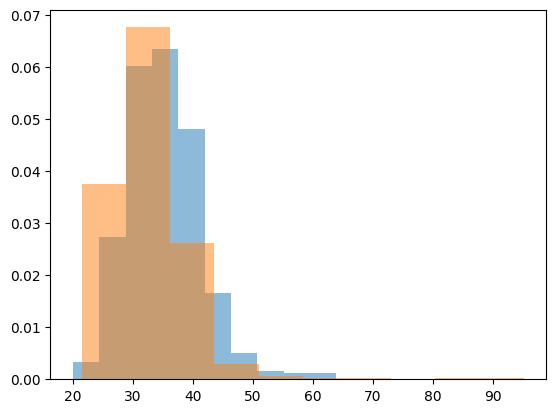

In [74]:
plt.hist(dark_long_df['distance_traveled'],alpha = .5,density=True)
plt.hist(long_df['distance_traveled'],alpha = .5,density=True)

In [77]:
long_df['speed1'].mean()

28.918527358711838

(array([0.00332819, 0.00947255, 0.01792105, 0.04096239, 0.04557066,
        0.05171502, 0.03661014, 0.01254473, 0.00742443, 0.00256015]),
 array([ 7.64572415, 12.02958718, 16.4134502 , 20.79731323, 25.18117626,
        29.56503928, 33.94890231, 38.33276534, 42.71662837, 47.10049139,
        51.48435442]),
 <BarContainer object of 10 artists>)

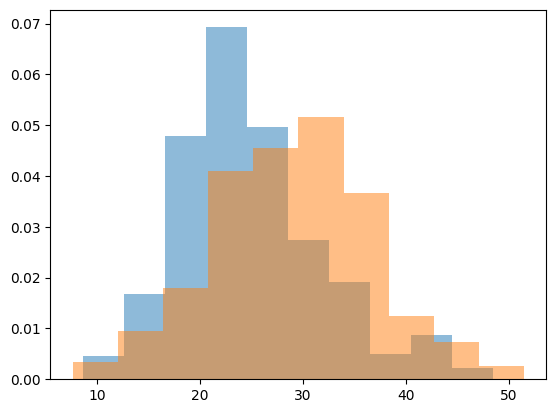

In [73]:
plt.hist(dark_long_df['speed1'],alpha = .5,density=True)
plt.hist(long_df['speed1'],alpha = .5,density=True)